<a href="https://colab.research.google.com/github/itsdivgithub/Kidney_Stone_Predictor/blob/main/Kidney_Stone_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Important Libraries & Kidney Stone Data.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

**Reading in our CSV files and putting them into a Dataframe Object.**

In [ ]:
df= pd.read_csv('/content/Kidney_Stone.csv')

In [ ]:
df.head()

id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1

In [ ]:
df.tail()

id  gravity    ph  osmo  cond  urea  calc  target
409  409    1.011  5.21   527  21.4    75  1.53       0
410  410    1.024  5.53   577  19.7   224  0.77       0
411  411    1.018  6.28   455  22.2   270  7.68       1
412  412    1.008  7.12   325  12.6    75  1.03       1
413  413    1.011  6.13   364   9.9   159  0.27       0

In [ ]:
df.shape

(414, 8)

In [ ]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

**Checking for Duplicate Values**

In [ ]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool>

**Checking Data Type and Unique Values In a Dataset**

In [ ]:
df.nunique()

id         414
gravity     28
ph          71
osmo        80
cond        65
urea        73
calc        85
target       2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


**Observing If there are any Null Values**

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id  gravity     ph   osmo   cond   urea   calc  target
0    False    False  False  False  False  False  False   False
1    False    False  False  False  False  False  False   False
2    False    False  False  False  False  False  False   False
3    False    False  False  False  False  False  False   False
4    False    False  False  False  False  False  False   False
..     ...      ...    ...    ...    ...    ...    ...     ...
409  False    False  False  False  False  False  False   False
410  False    False  False  False  False  False  False   False
411  False    False  False  False  False  False  False   False
412  False    False  False  False  False  False  False   False
413  False    False  False  False  False  False  False   False

[414 rows x 8 columns]>

**Getting Some Insights(Min, Max Values)**

In [ ]:
df.describe()

id     gravity          ph         osmo        cond  \
count  414.000000  414.000000  414.000000   414.000000  414.000000   
mean   206.500000    1.017894    5.955459   651.545894   21.437923   
std    119.655756    0.006675    0.642260   234.676567    7.514750   
min      0.000000    1.005000    4.760000   187.000000    5.100000   
25%    103.250000    1.012000    5.530000   455.250000   15.500000   
50%    206.500000    1.018000    5.740000   679.500000   22.200000   
75%    309.750000    1.022000    6.280000   840.000000   27.600000   
max    413.000000    1.040000    7.940000  1236.000000   38.000000   

             urea        calc      target  
count  414.000000  414.000000  414.000000  
mean   278.657005    4.114638    0.444444  
std    136.442249    3.217641    0.497505  
min     10.000000    0.170000    0.000000  
25%    170.000000    1.450000    0.000000  
50%    277.000000    3.130000    0.000000  
75%    385.000000    6.630000    1.000000  
max    620.000000   14.340000    1.000000

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Data Cleaning for 'id' column**

In [ ]:
df= df.drop('id', axis=1)
df

gravity    ph  osmo  cond  urea  calc  target
0      1.013  6.19   443  14.8   124  1.45       0
1      1.025  5.40   703  23.6   394  4.18       0
2      1.009  6.13   371  24.5   159  9.04       0
3      1.021  4.91   442  20.8   398  6.63       1
4      1.021  5.53   874  17.8   385  2.21       1
..       ...   ...   ...   ...   ...   ...     ...
409    1.011  5.21   527  21.4    75  1.53       0
410    1.024  5.53   577  19.7   224  0.77       0
411    1.018  6.28   455  22.2   270  7.68       1
412    1.008  7.12   325  12.6    75  1.03       1
413    1.011  6.13   364   9.9   159  0.27       0

[414 rows x 7 columns]

# **Exploratory Data Analysis (EDA)**






In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df['target'].value_counts()

0    230
1    184
Name: target, dtype: int64

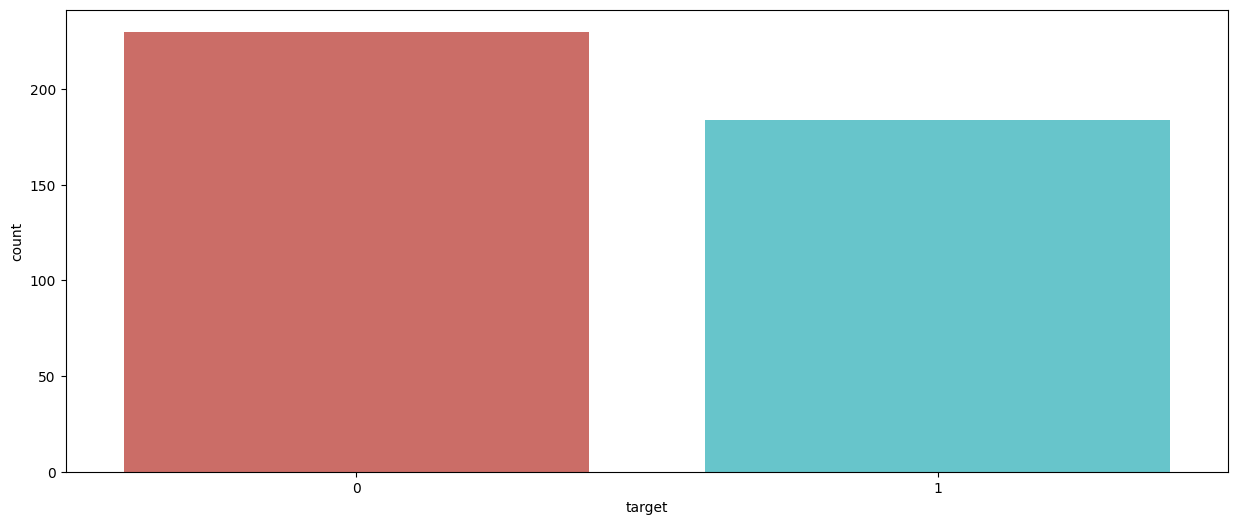

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='target', data=df , palette='hls')
plt.show()

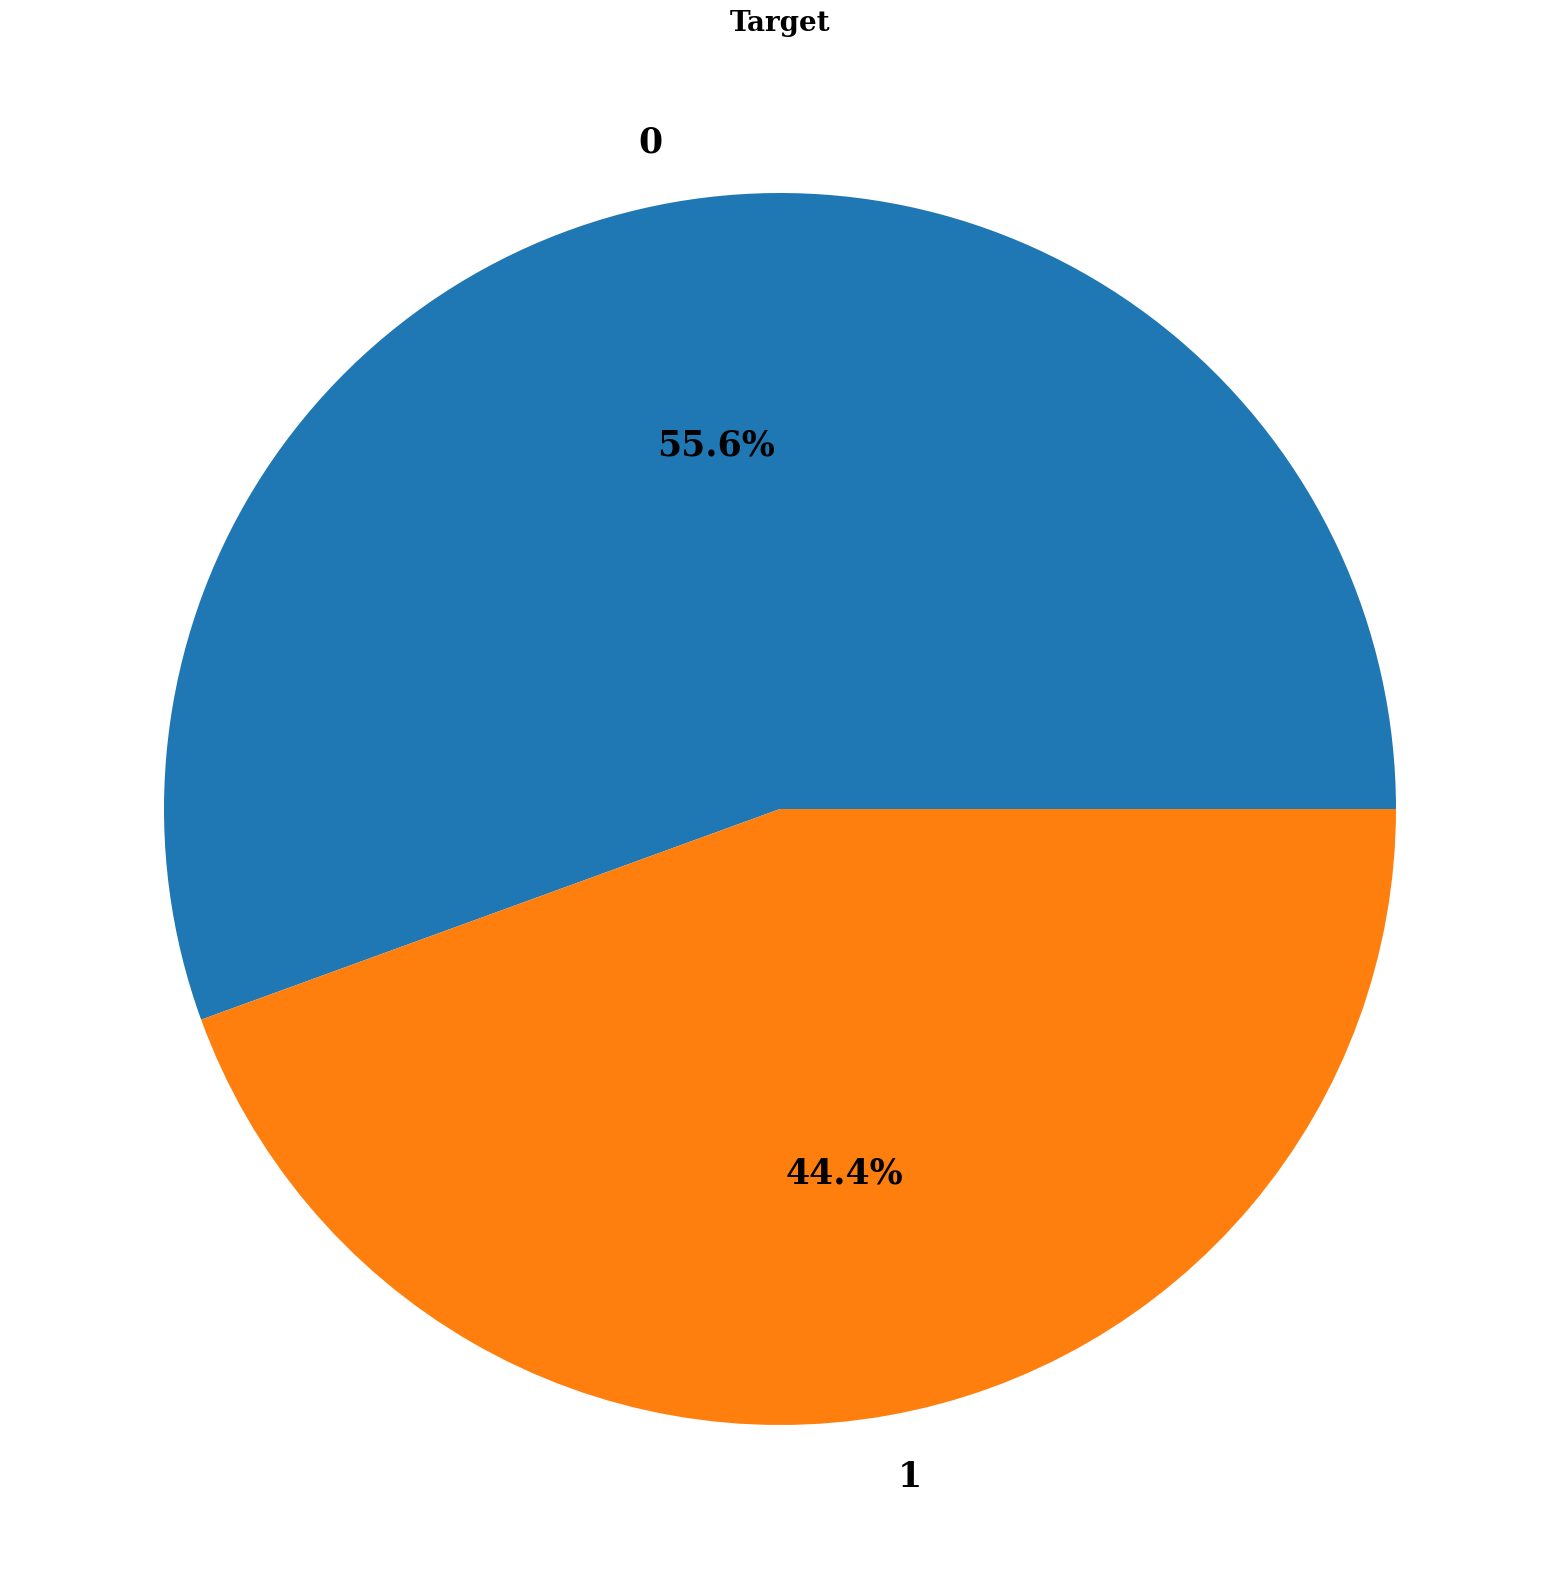

In [ ]:
plt.figure(figsize=(30,20))
plt.pie(df['target'].value_counts(), labels=df['target'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize' : 25,'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Target', size=20, **hfont)
plt.show()
plt.show()

In [ ]:
fig= px.bar(df, x="target", y=df.index)
fig.show()

In [ ]:
value_counts = df['target'].value_counts()
fig = px.pie(names=value_counts.index, values=value_counts.values)
fig.update_layout(
    title='Taget\'s Pie Chart',
    title_x=0.5
)
fig.show()

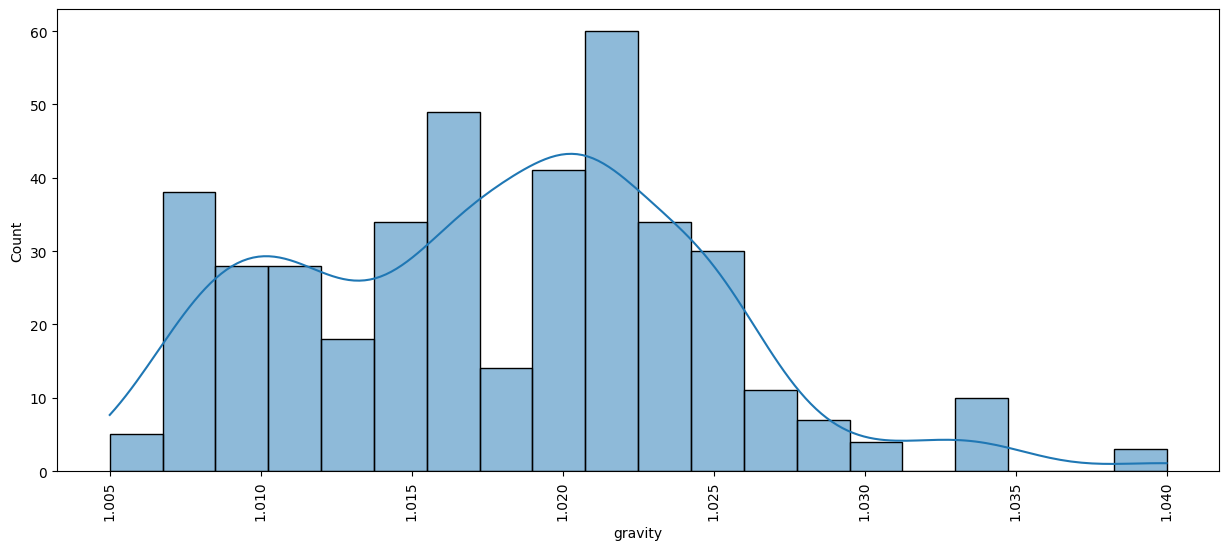

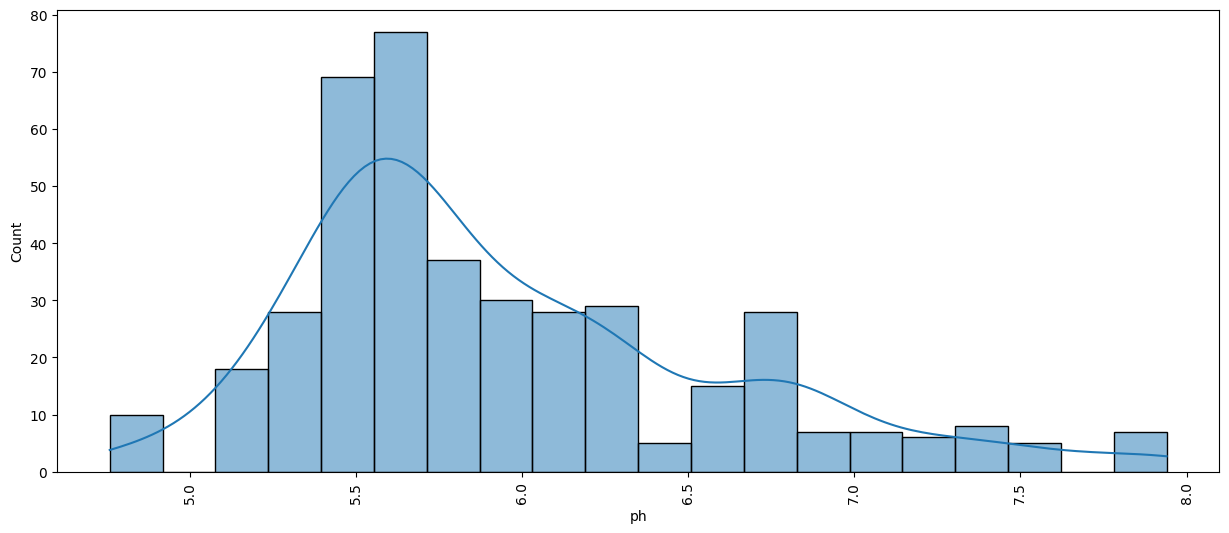

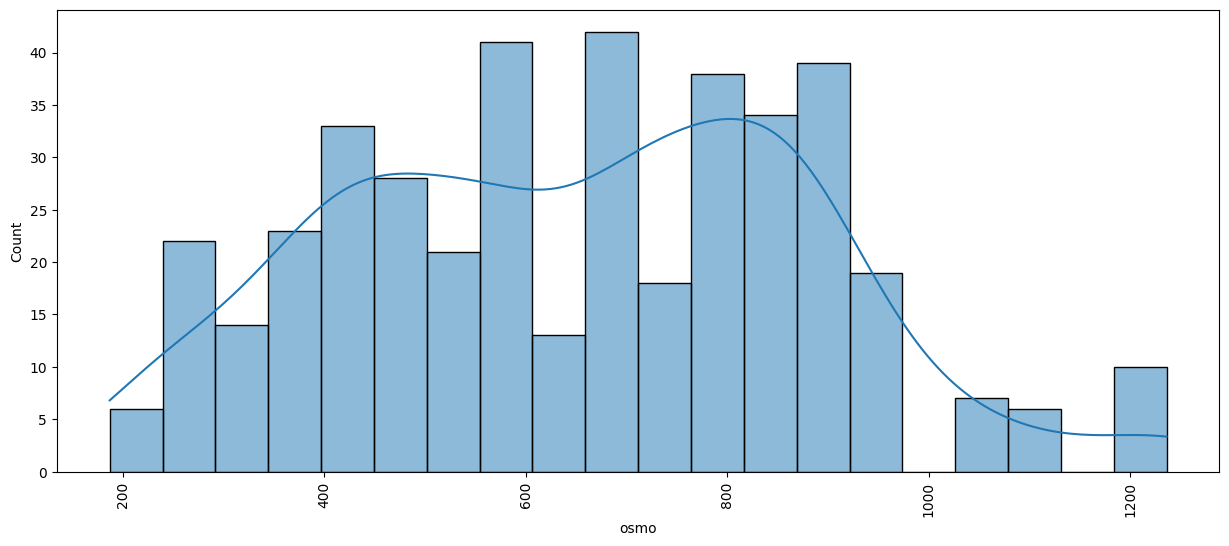

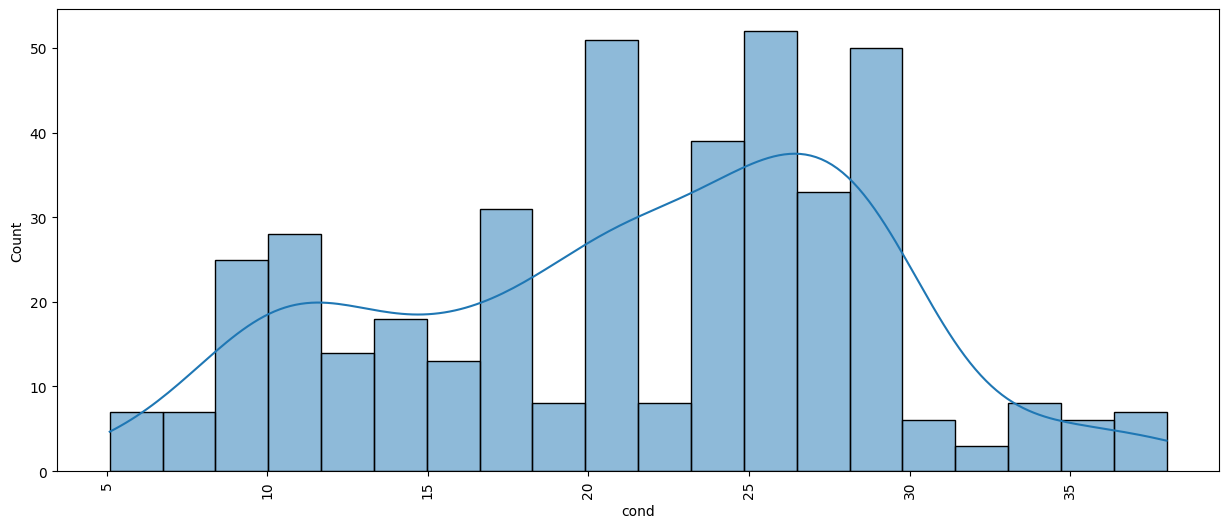

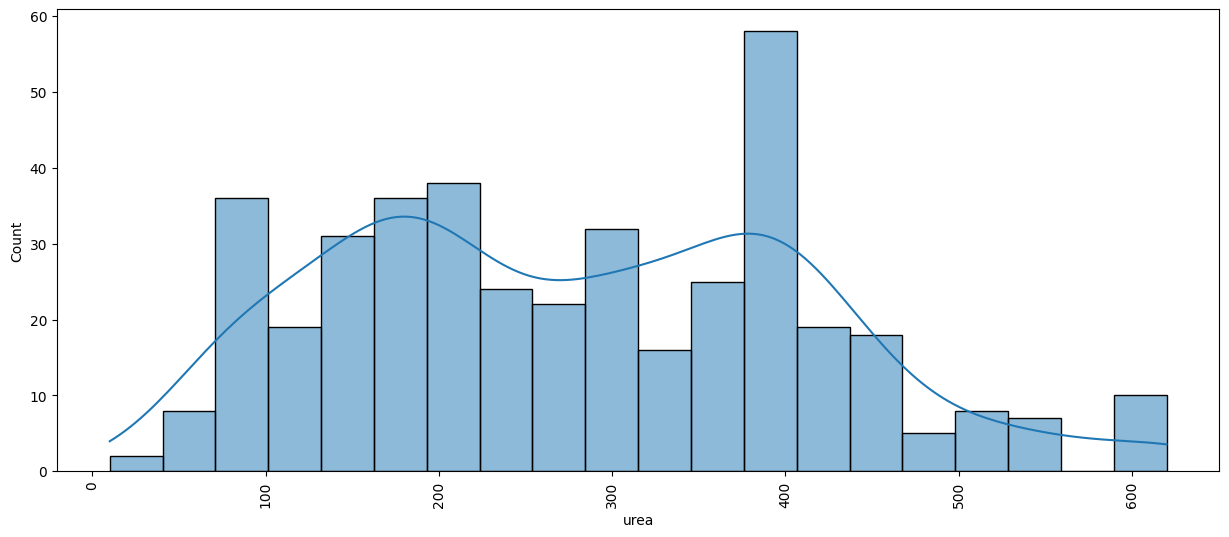

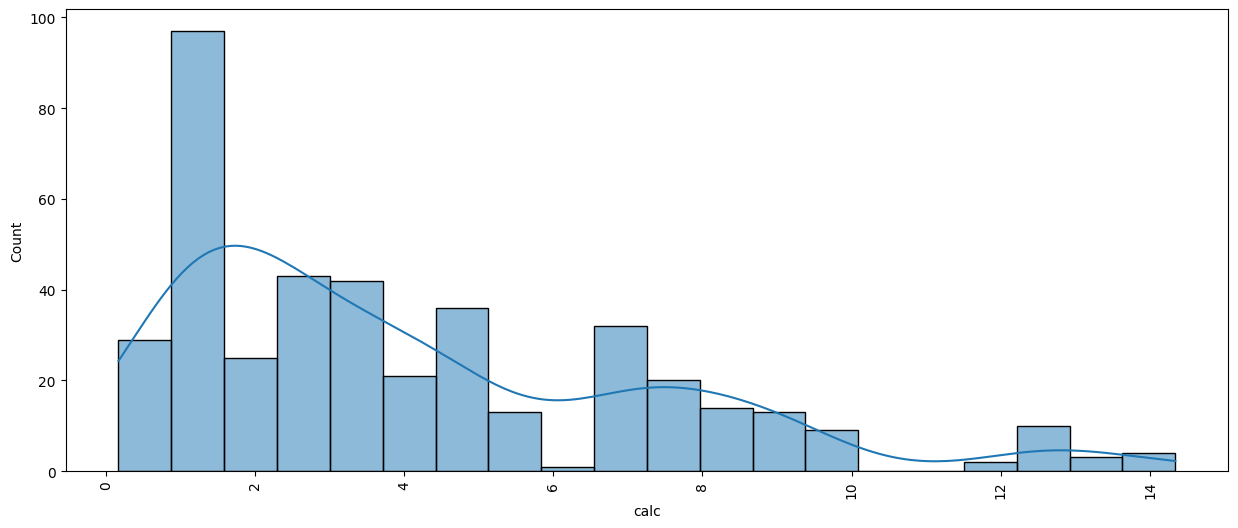

In [ ]:
for i in df.columns:
  if i!= 'target':
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins=20, palette='hls', kde=True)
    plt.xticks(rotation=90)
    plt.show()


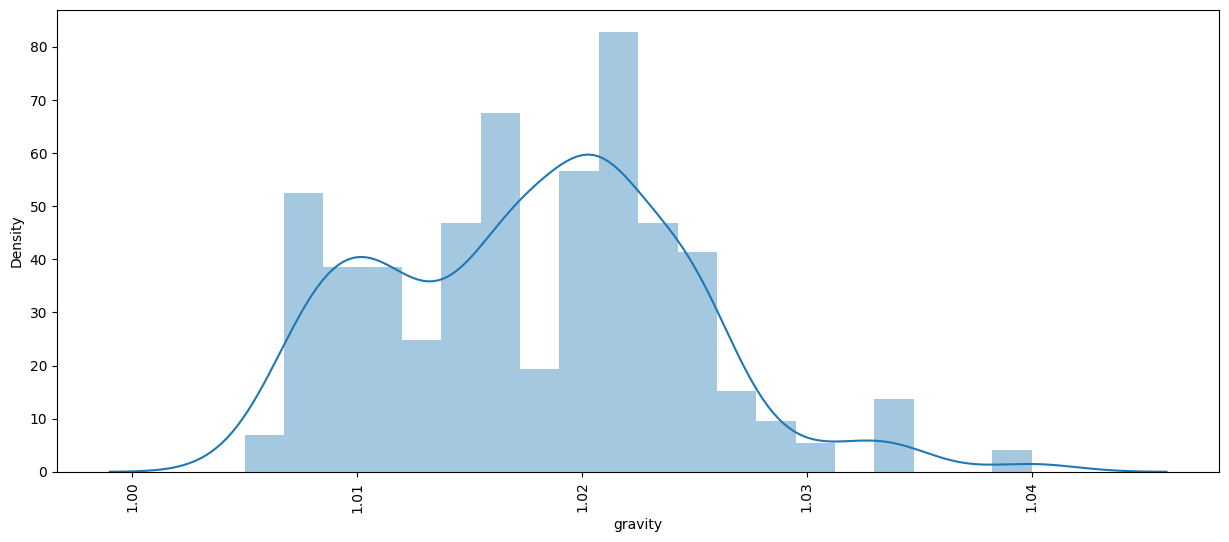

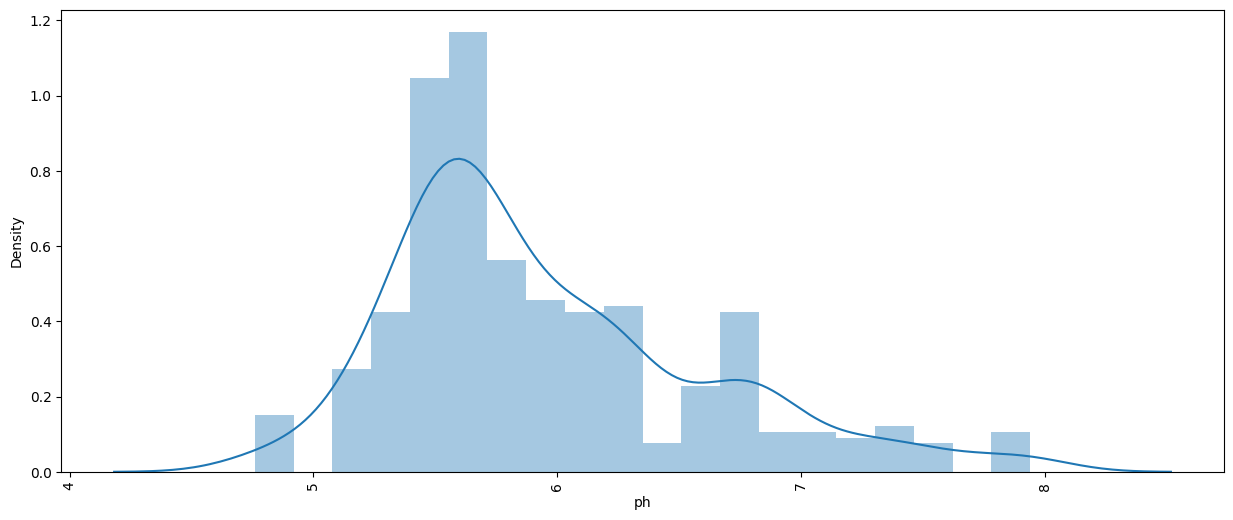

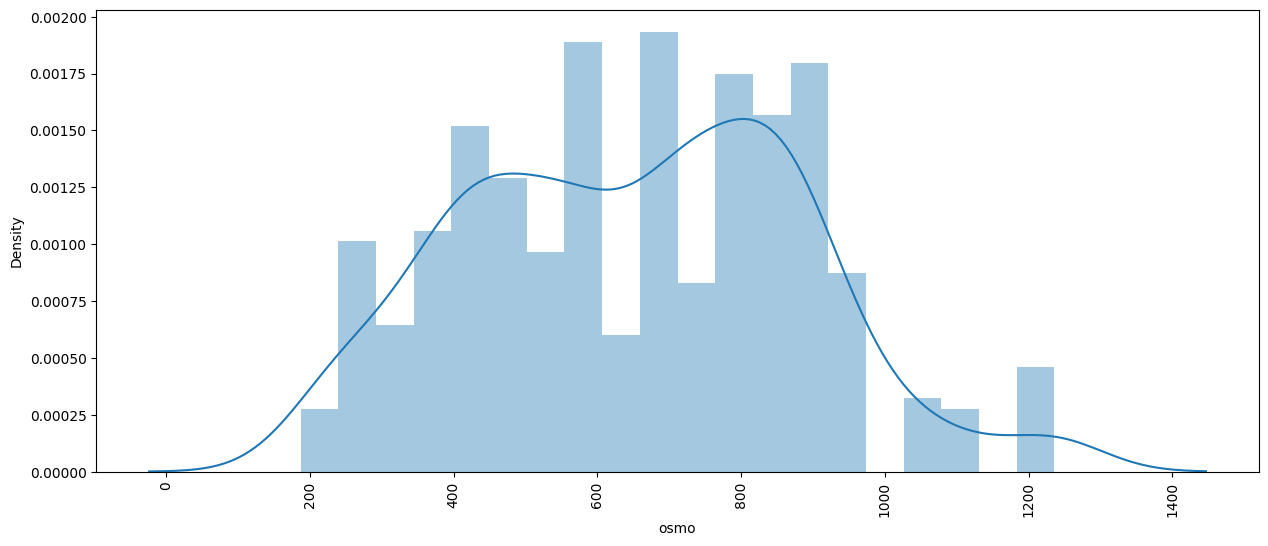

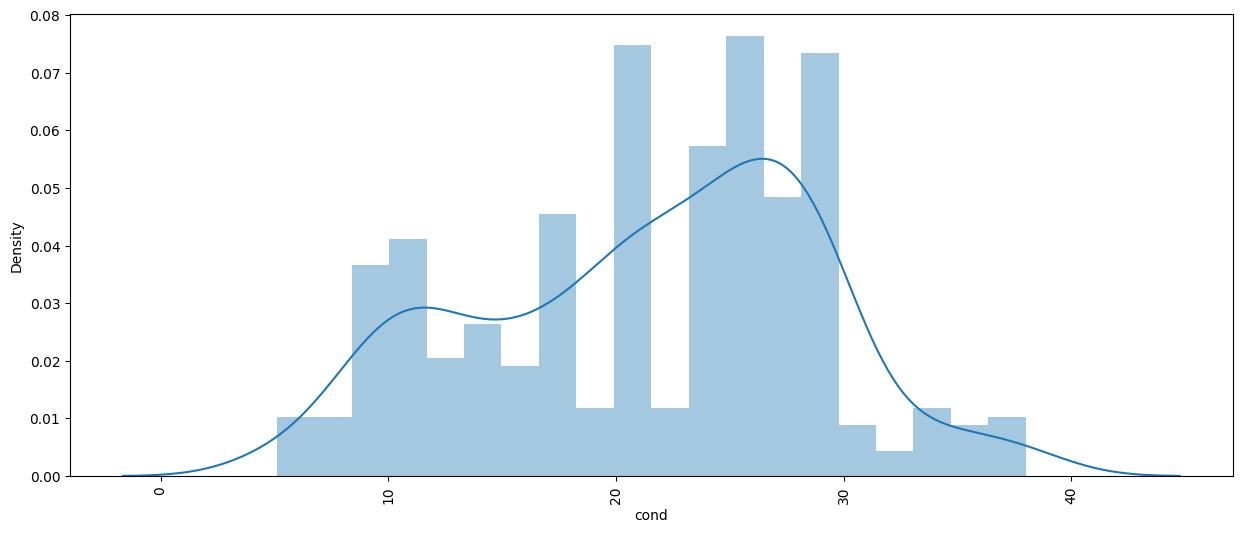

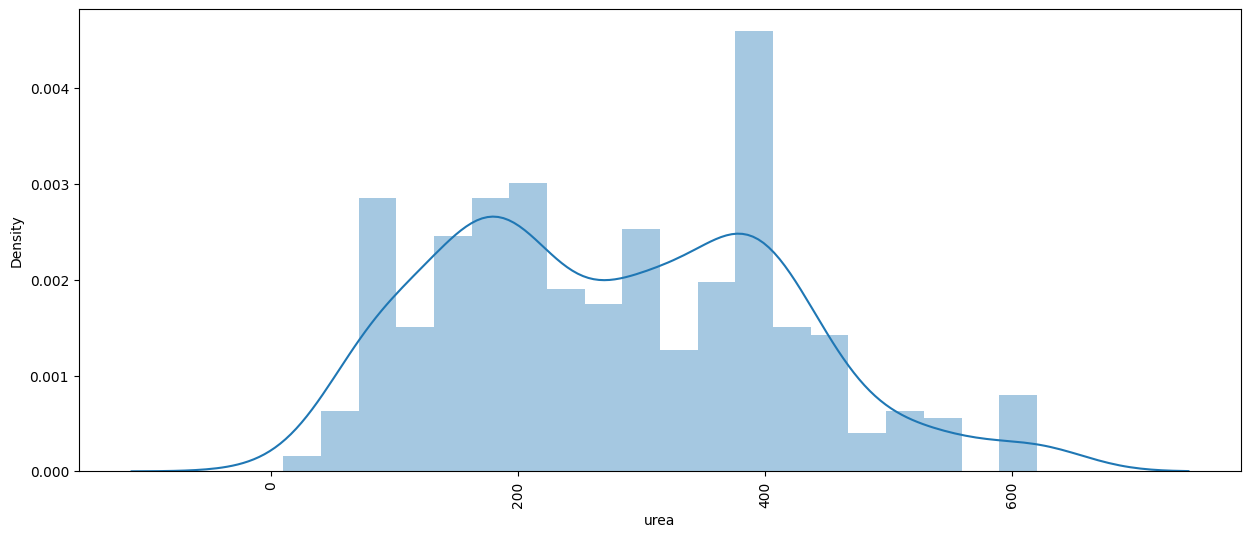

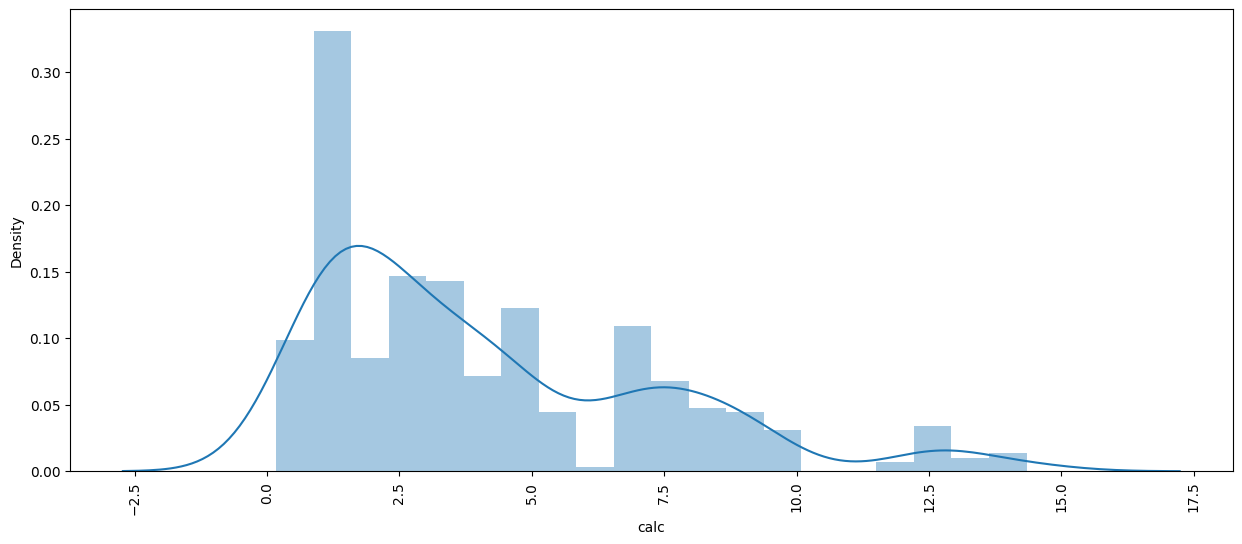

In [ ]:
for i in df.columns:
  if i!= 'target':
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins=20, kde=True)
    plt.xticks(rotation=90)
    plt.show()

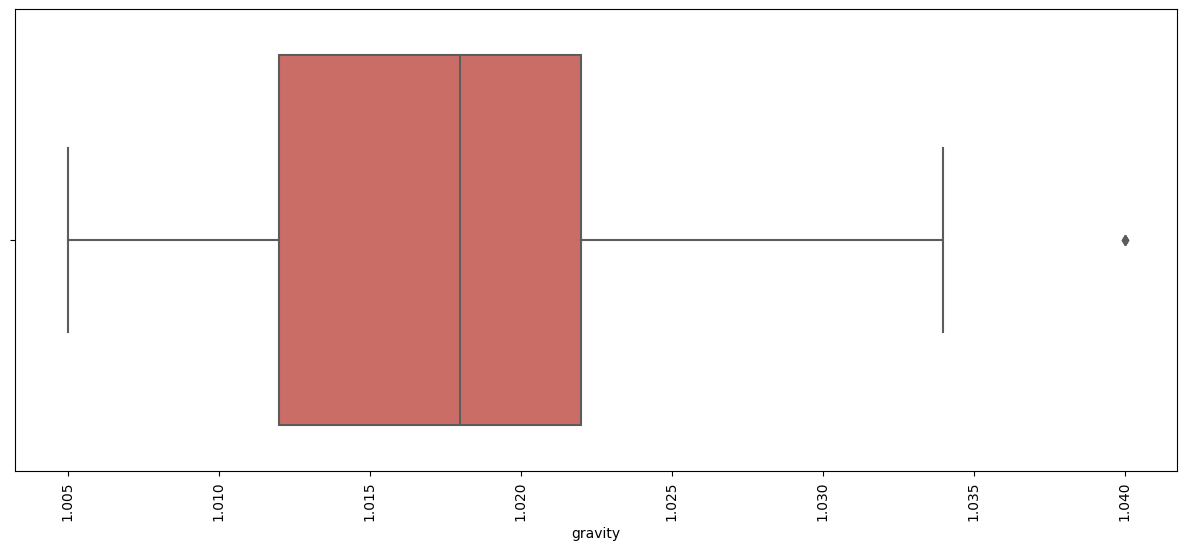

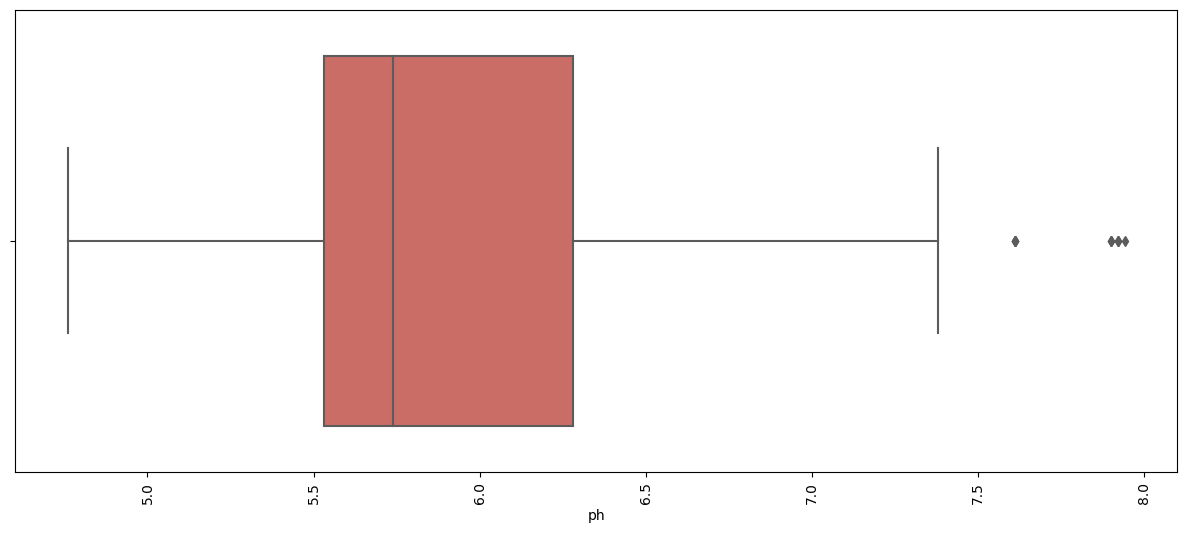

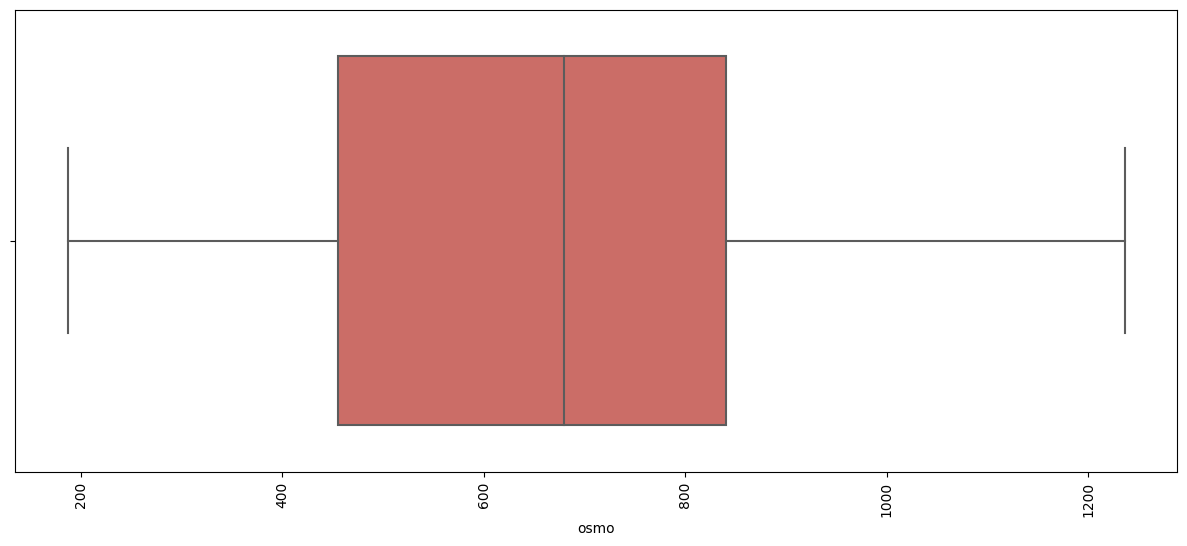

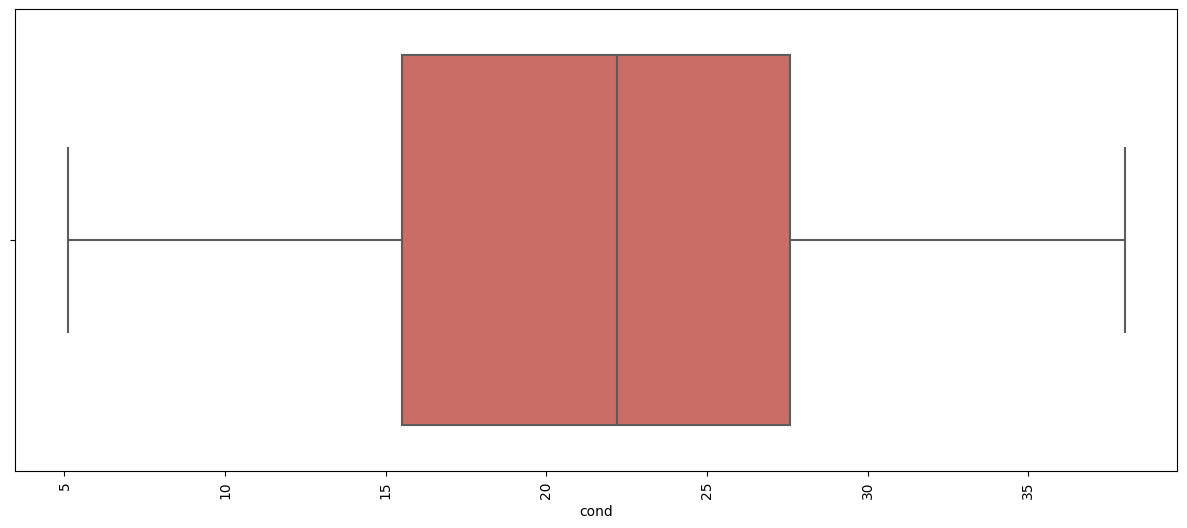

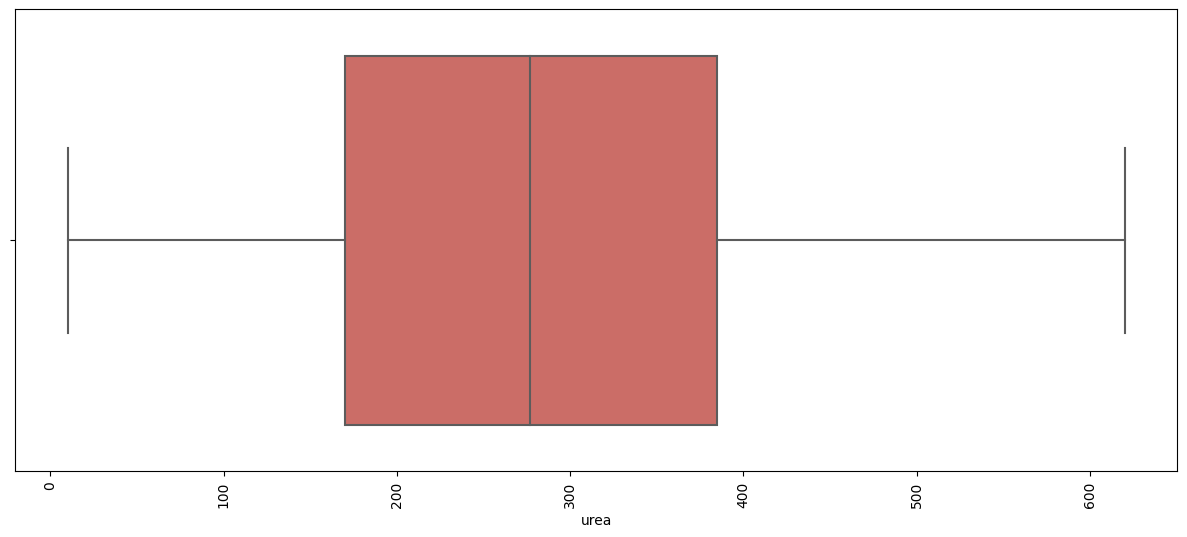

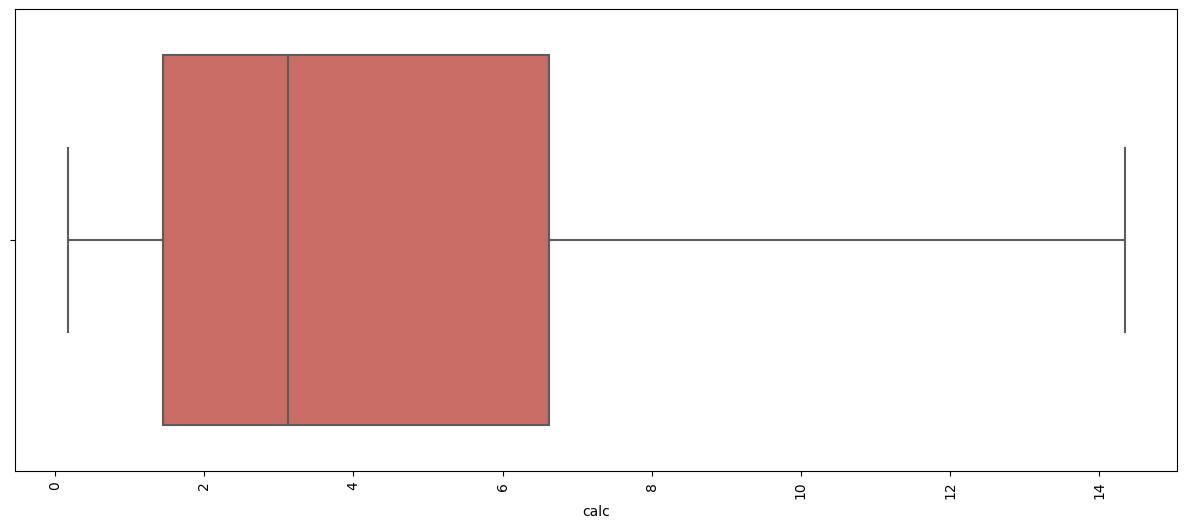

In [ ]:
for i in df.columns:
  if i!='target':
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i , data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()


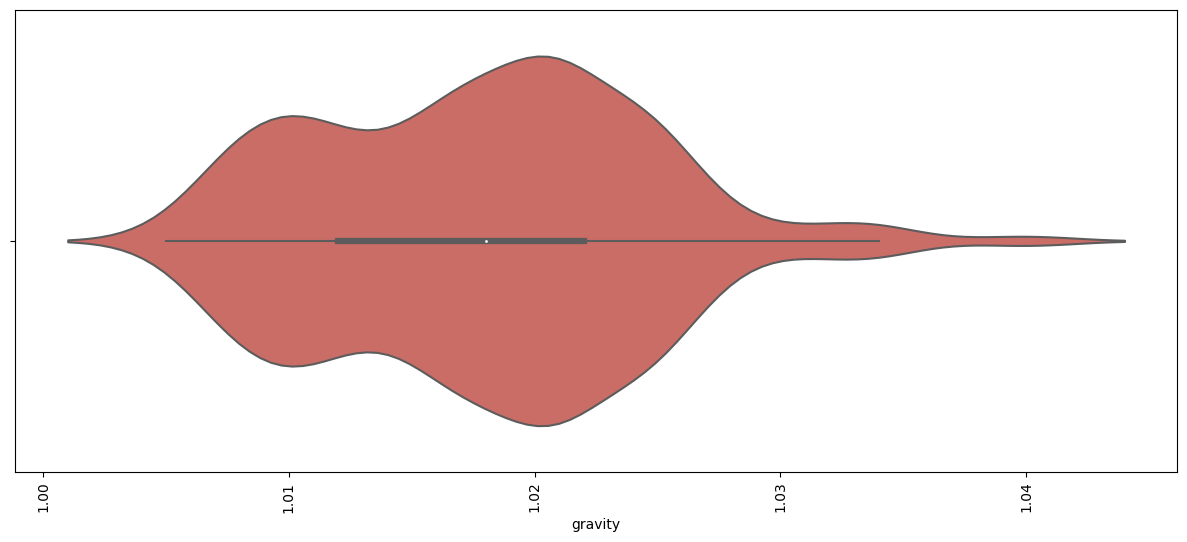

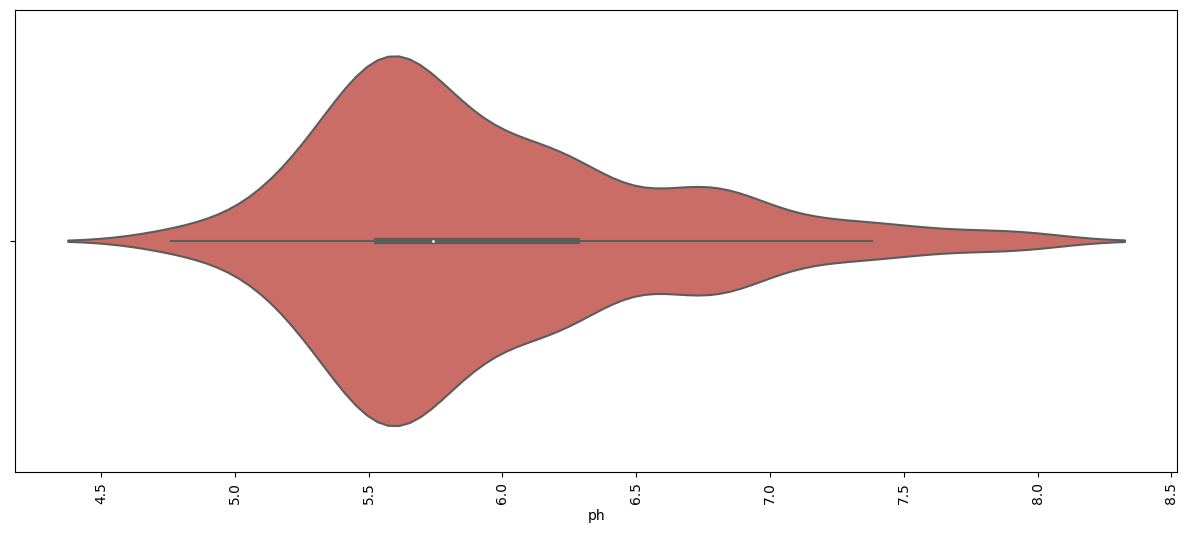

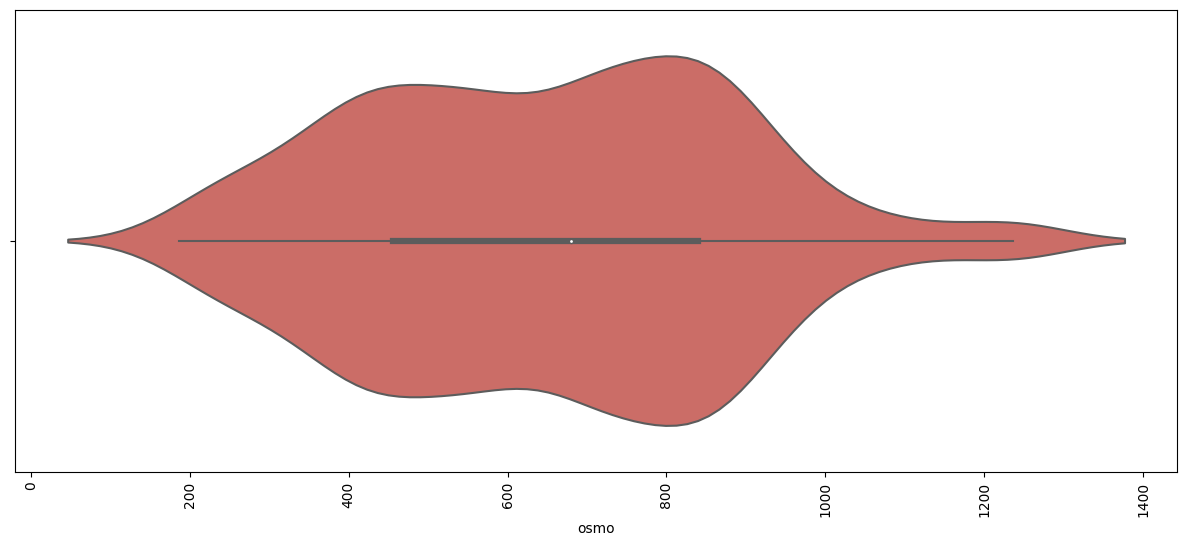

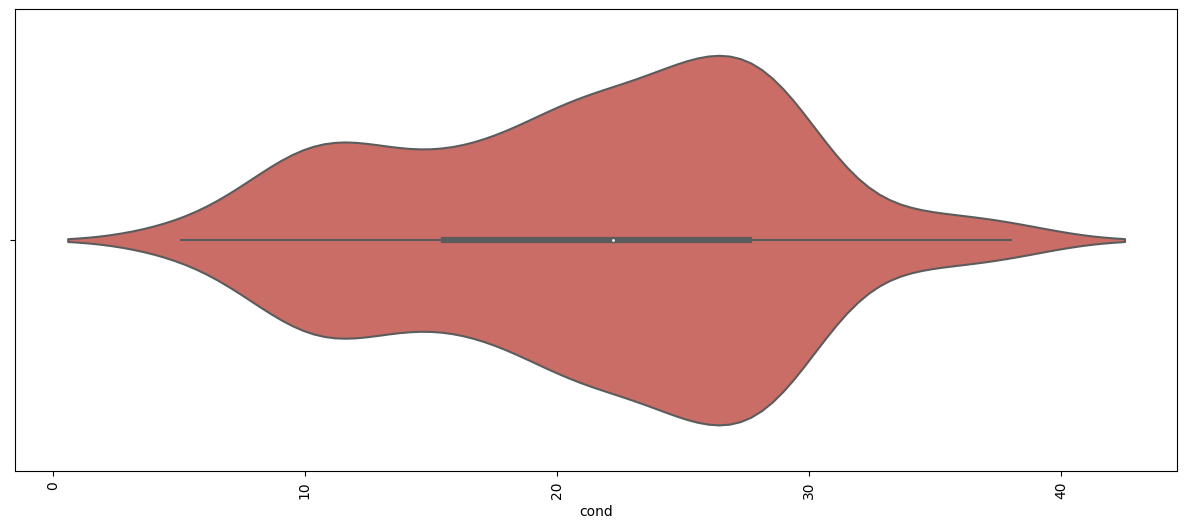

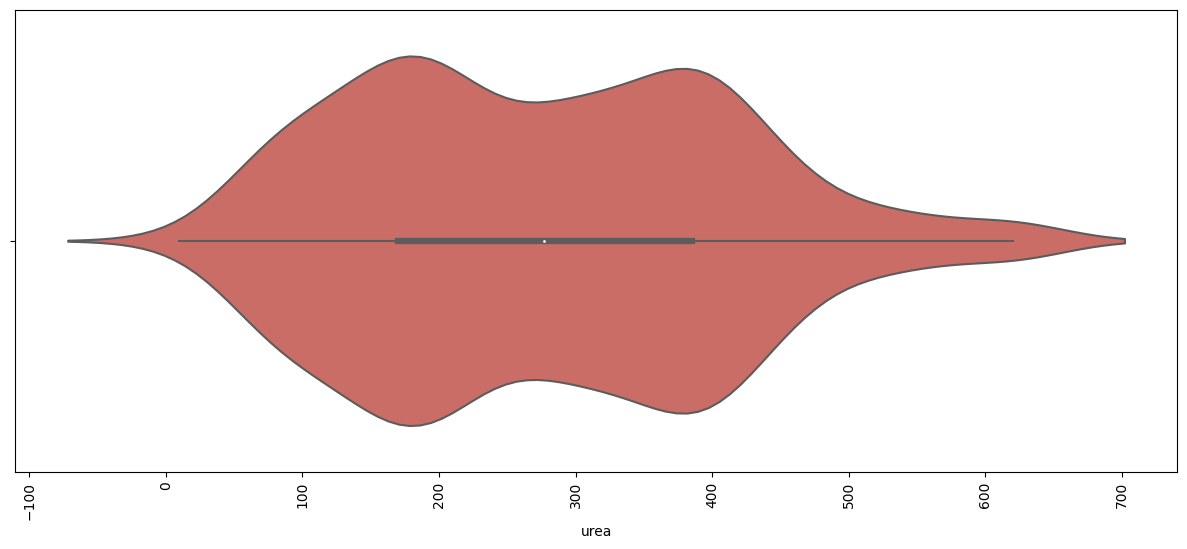

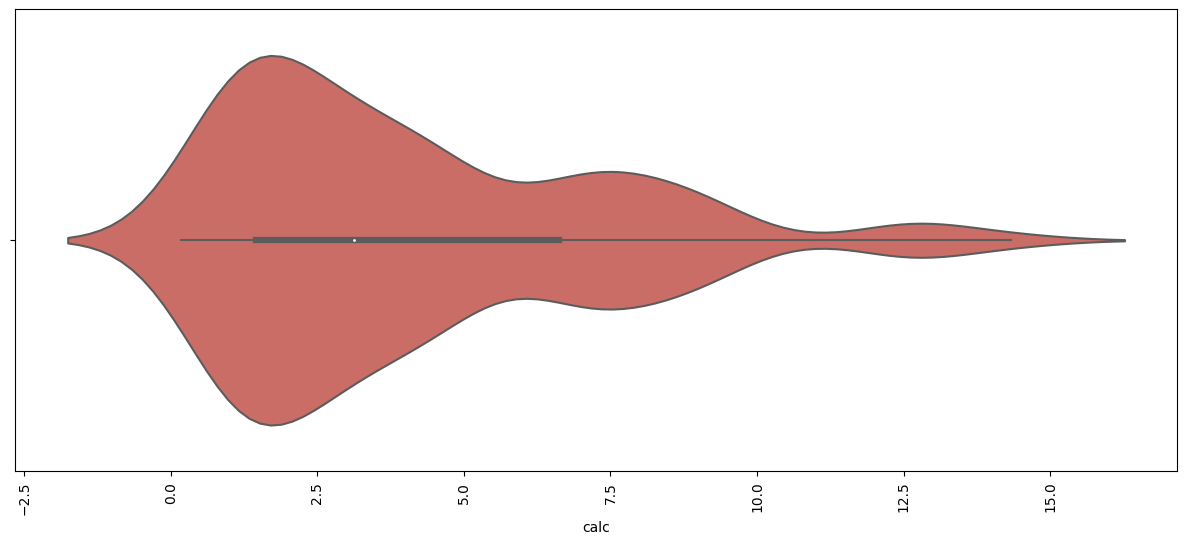

In [ ]:
for i in df.columns:
    if i != 'target':
        plt.figure(figsize=(15,6))
        sns.violinplot(x=i , data = df, palette = 'hls')
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
for i in df.columns:
  if i!='target':
    fig=px.histogram(df[i], nbins=20,color_discrete_sequence=['#636EFA'],
                            marginal='box', opacity=0.7)
    fig.update_layout(
        title=f'Histogram of {i}', xaxis_title=i, yaxis_title='Count', showlegend=False

    )
    fig.show()

In [ ]:
for i in df.columns:
  if i!='target':
    fig = px.histogram(df, x=i, color_discrete_sequence=['#636EFA'], nbins=20, opacity=0.7,
                    title=f'Histogram of {i}', labels={'x': i, 'count': 'Frequency'},
                    template='plotly_white', width=800, height=400,
                    marginal='rug', barmode='overlay',
                    hover_data=[df['target']])
    fig.update_layout(xaxis=dict(type='category', title=i, tickangle=-90, tickfont=dict(size=10)),
                          yaxis_title='Frequency', showlegend=False)
    fig.show()

In [ ]:
for i in df.columns:
  if i!='target':
    fig=px.box(df, x=i ,color_discrete_sequence=['#636EFA'])
    fig.update_layout(
        title=f'BoxPlot of {i}',
        xaxis_title= i,
        yaxis_title='Value'
    )
    fig.show()

In [ ]:
for i in df.columns:
  if i!='target':
    fig= px.violin(df, y=i, x='target', box=True, points='all', hover_data=df.columns )
    fig.update_layout(title=i, xaxis_title="Target", yaxis_title=i)
    fig.show()

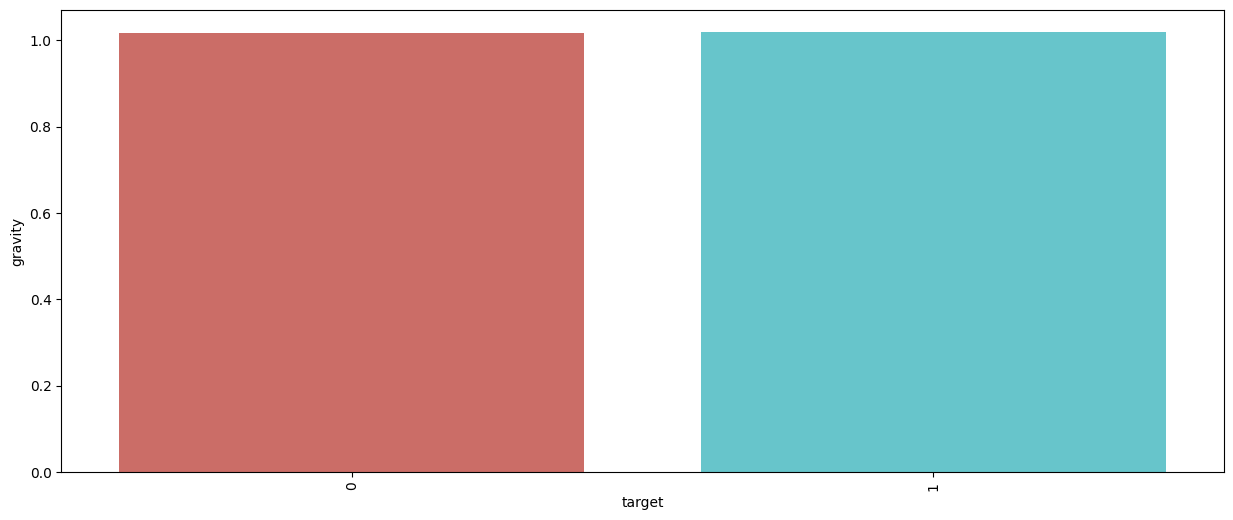

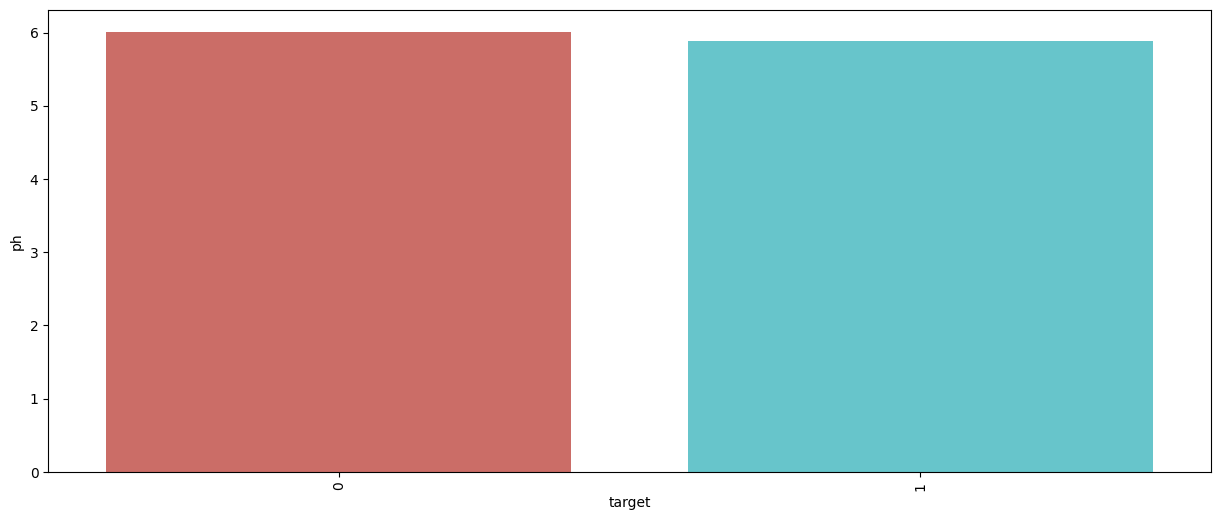

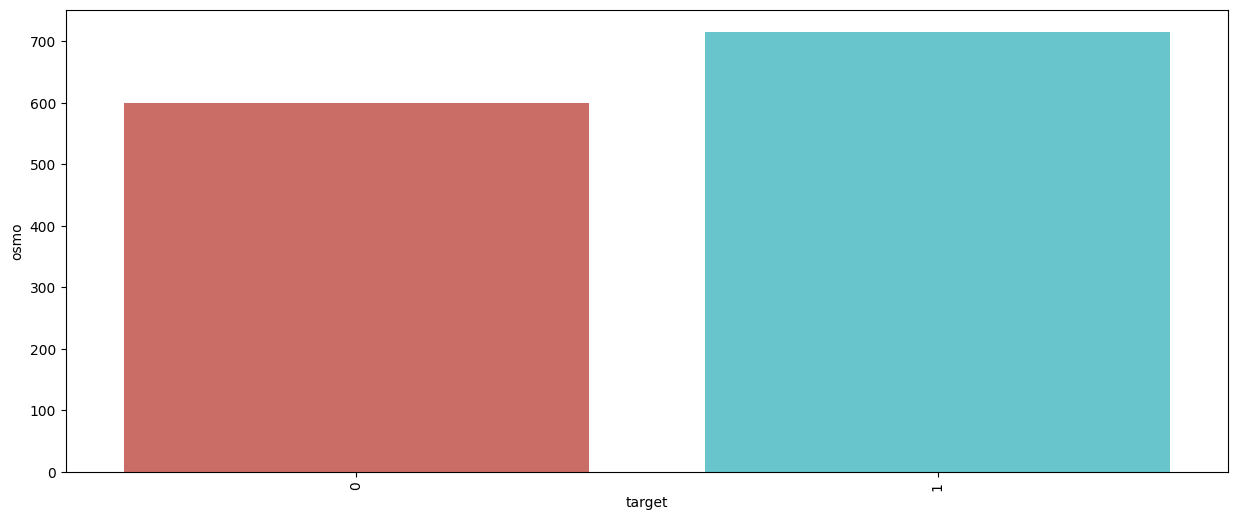

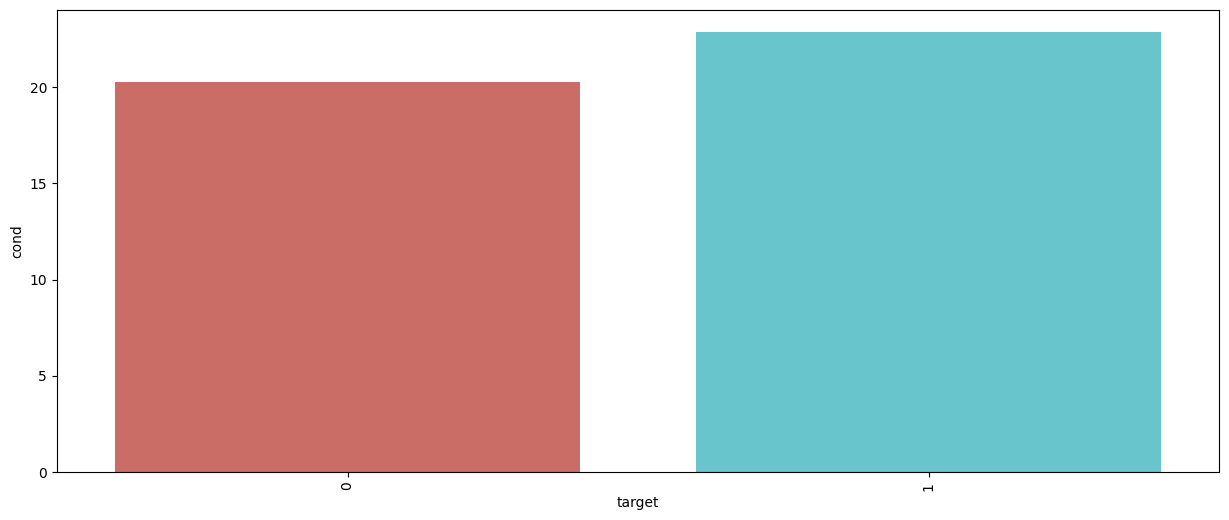

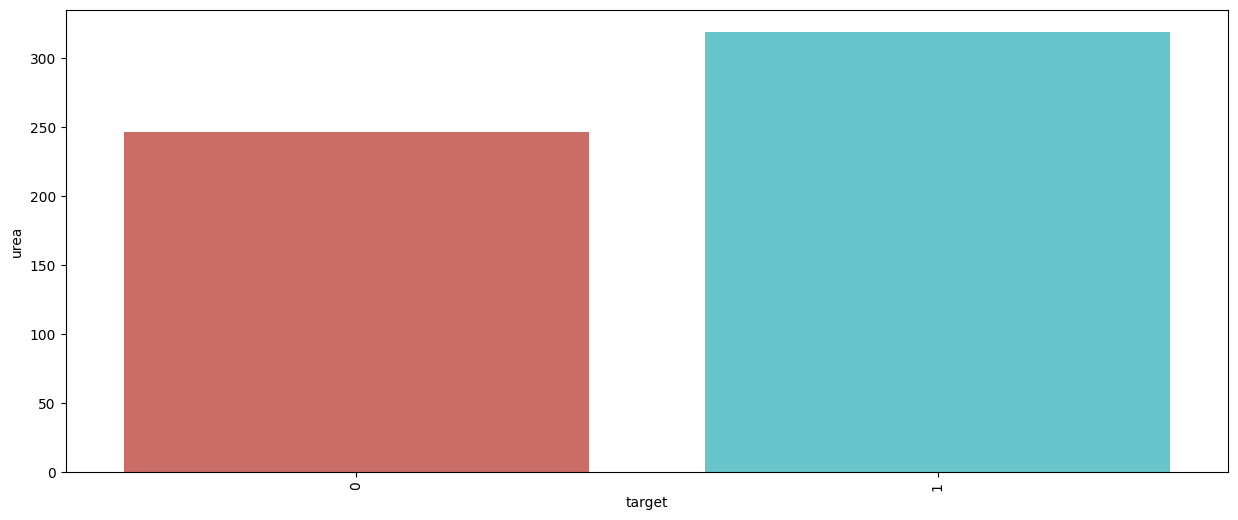

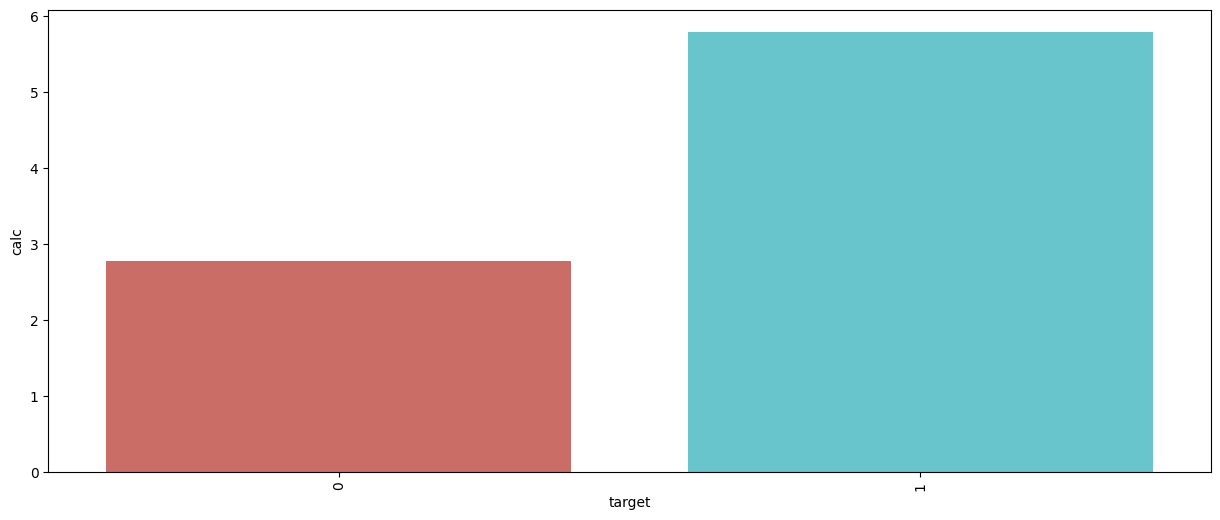

In [ ]:
for i in df.columns:
    if i != 'target':
        plt.figure(figsize=(15,6))
        sns.barplot(x = df['target'], y = df[i], data = df, ci = None, palette = 'hls')
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
for i in df.columns:
    if i != 'target':
        fig = px.bar(df, x="target", y=i, color="target", barmode="group")
        fig.update_layout(
            title=f"{i} by Target",
            xaxis_title="Target",
            yaxis_title=i,
            legend_title="Target"
        )
        fig.show()

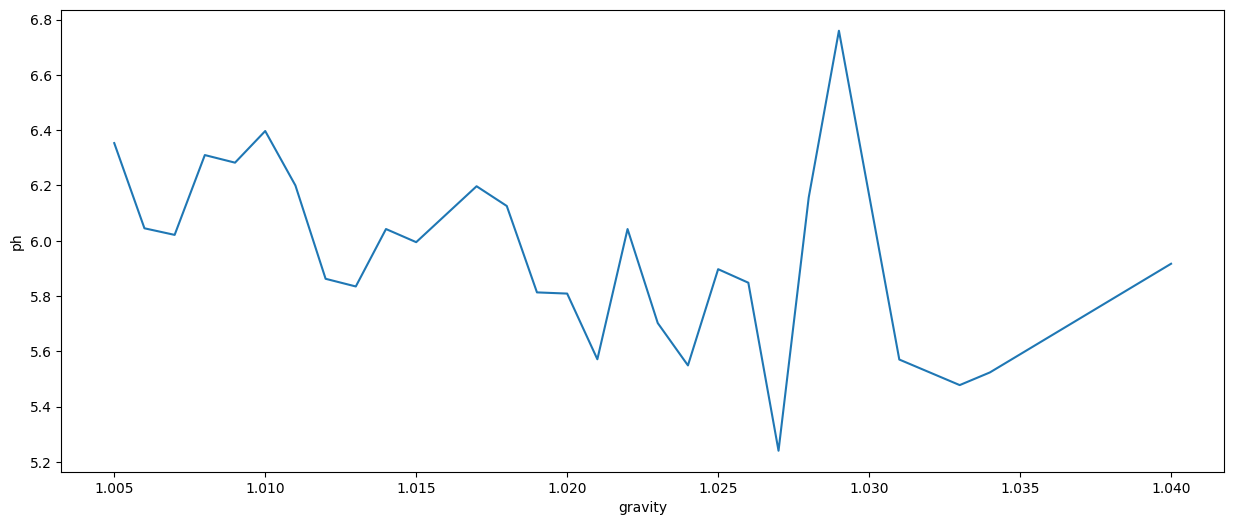

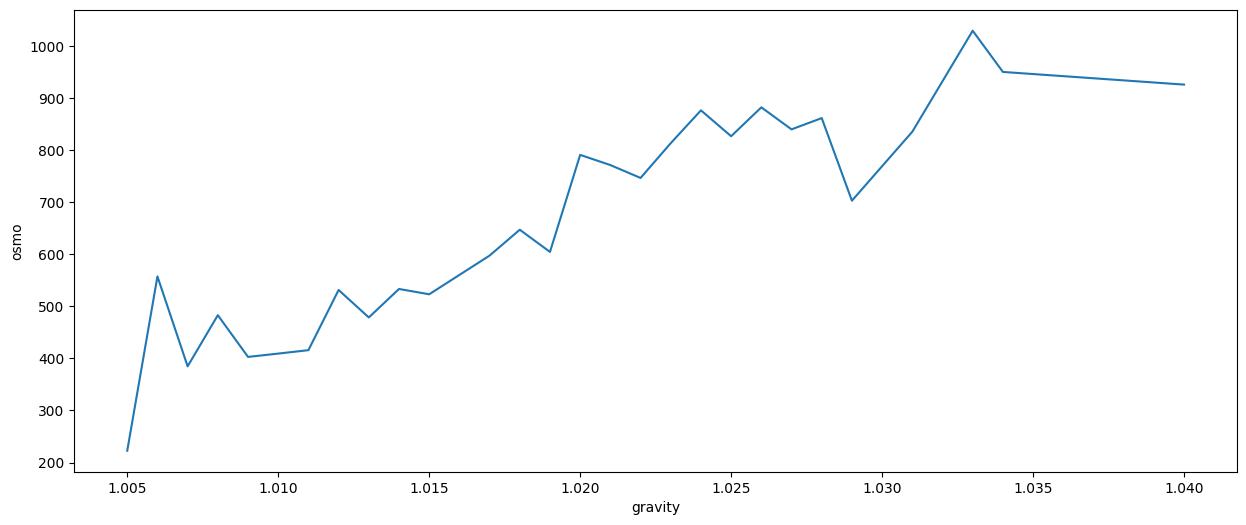

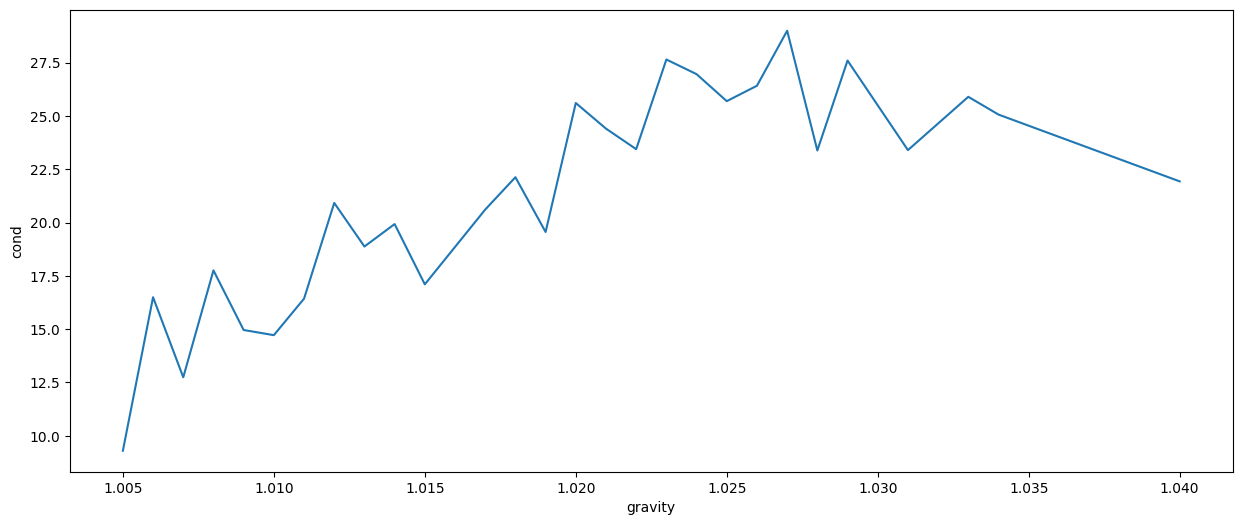

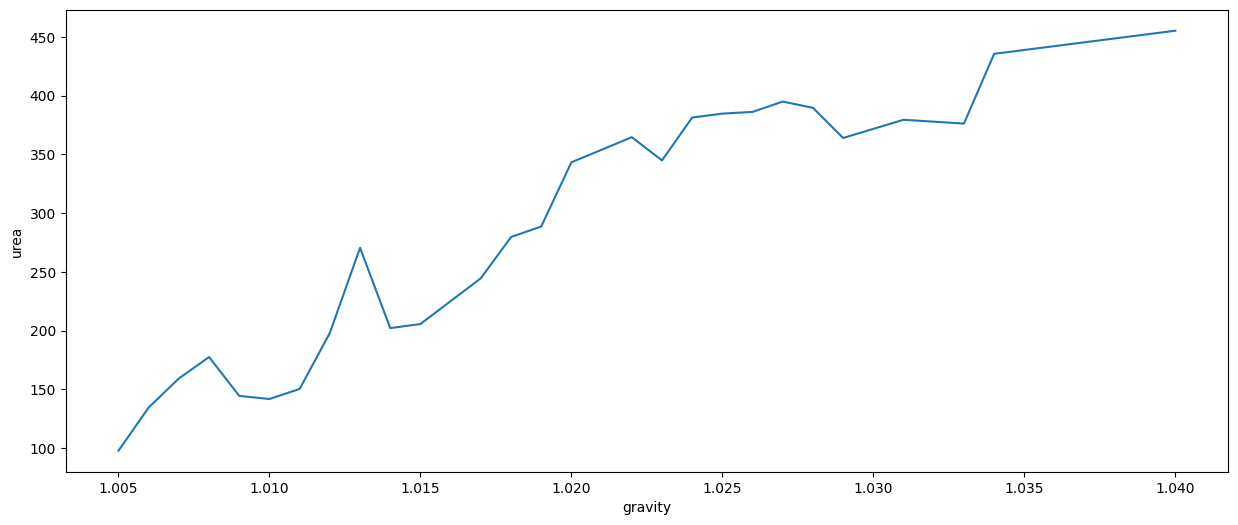

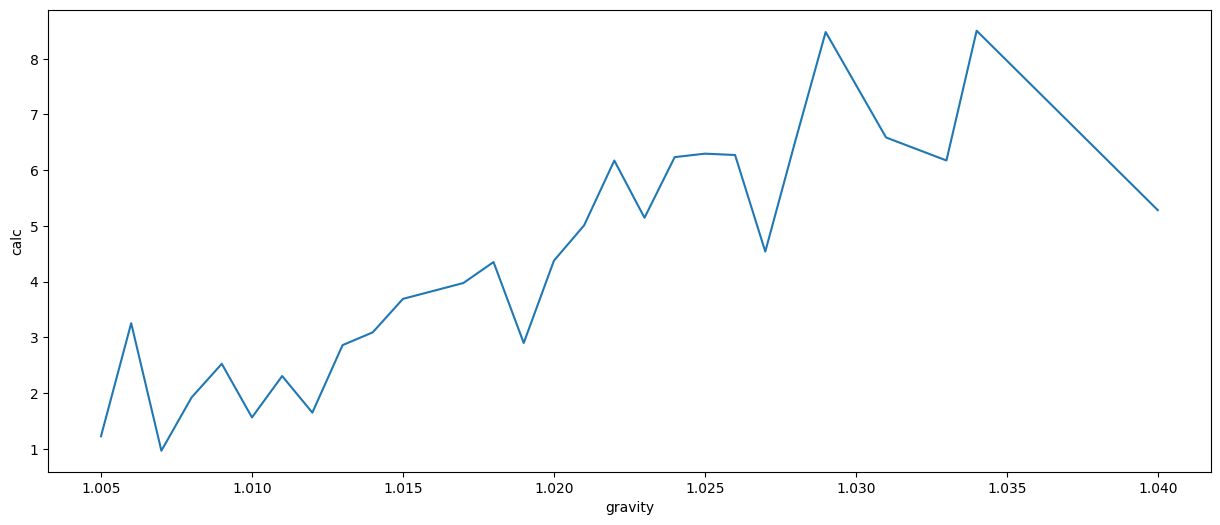

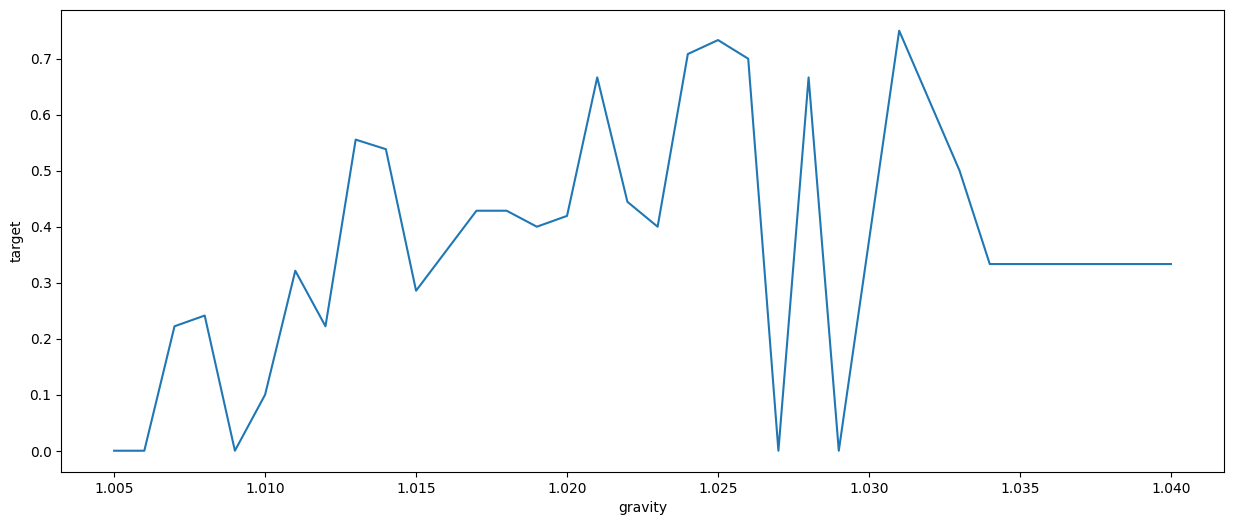

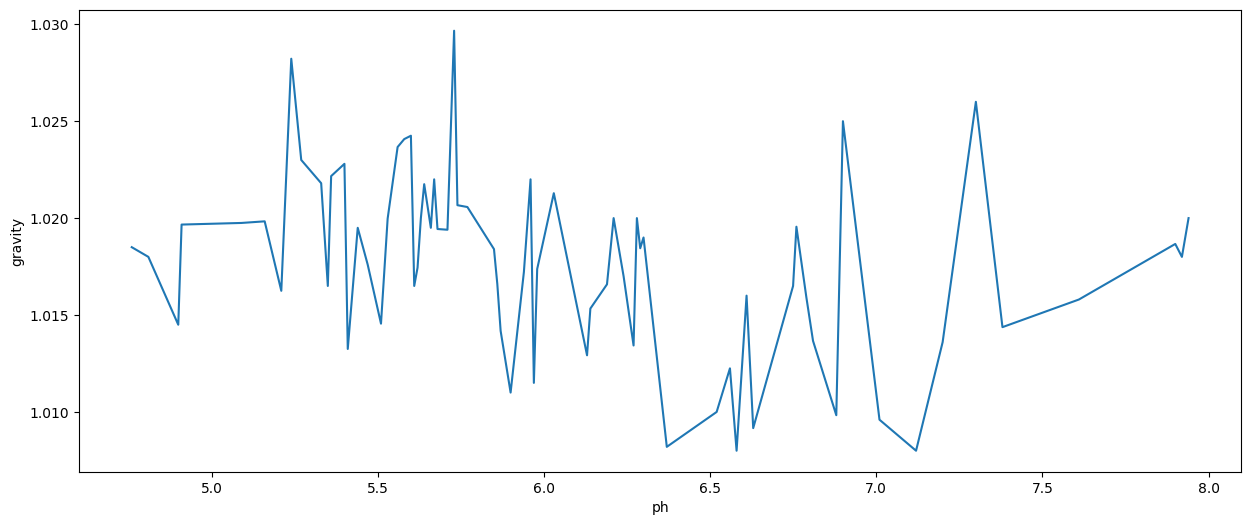

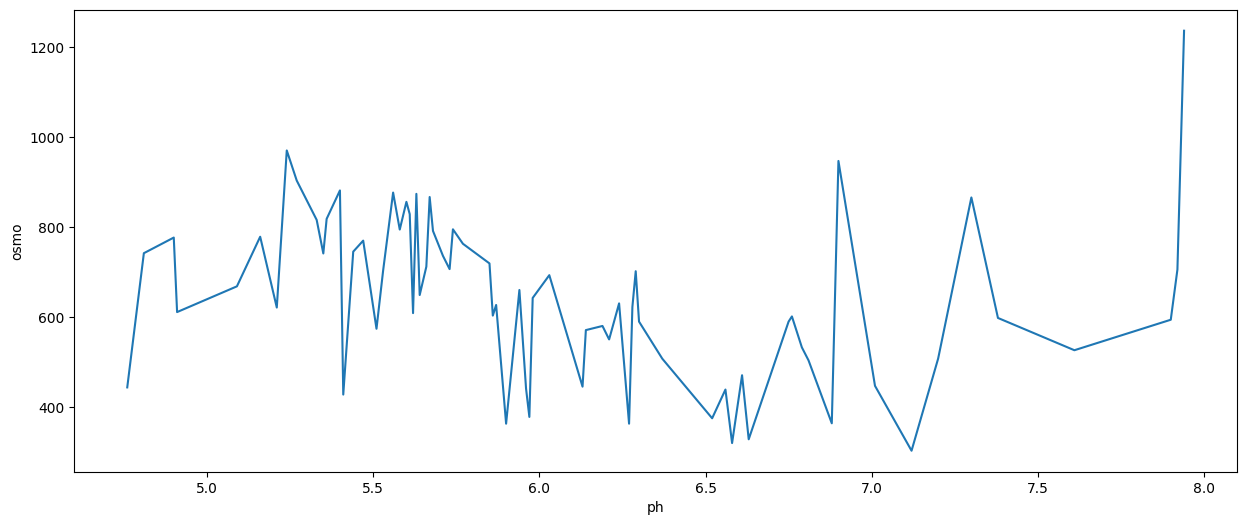

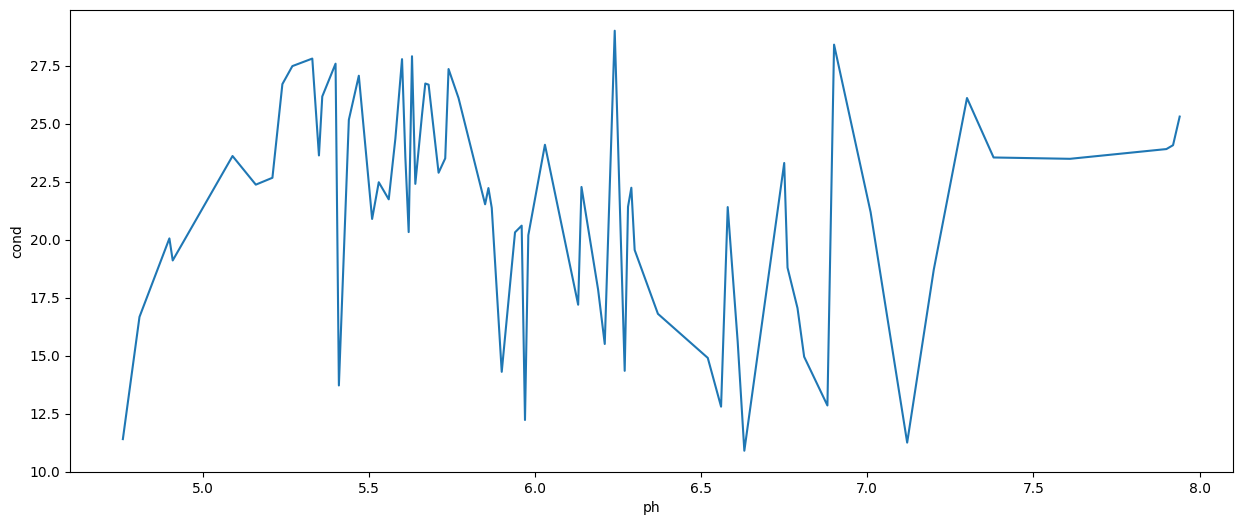

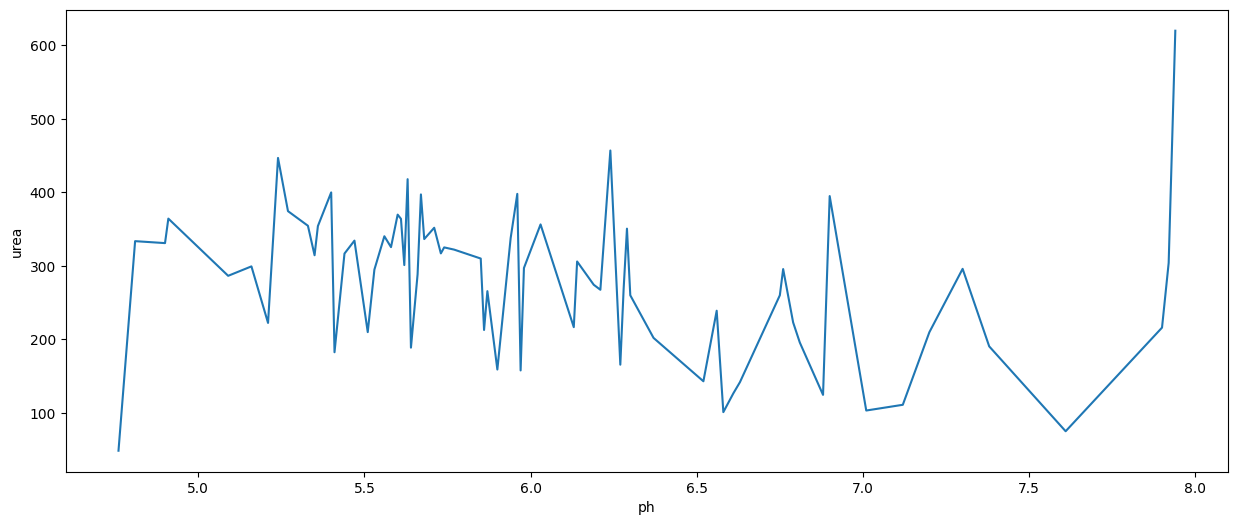

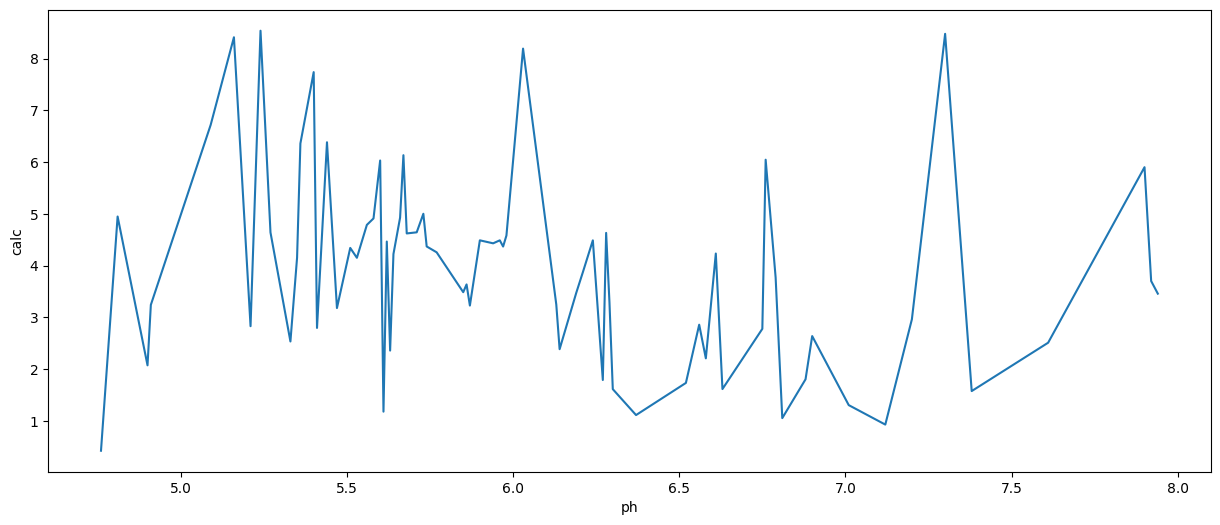

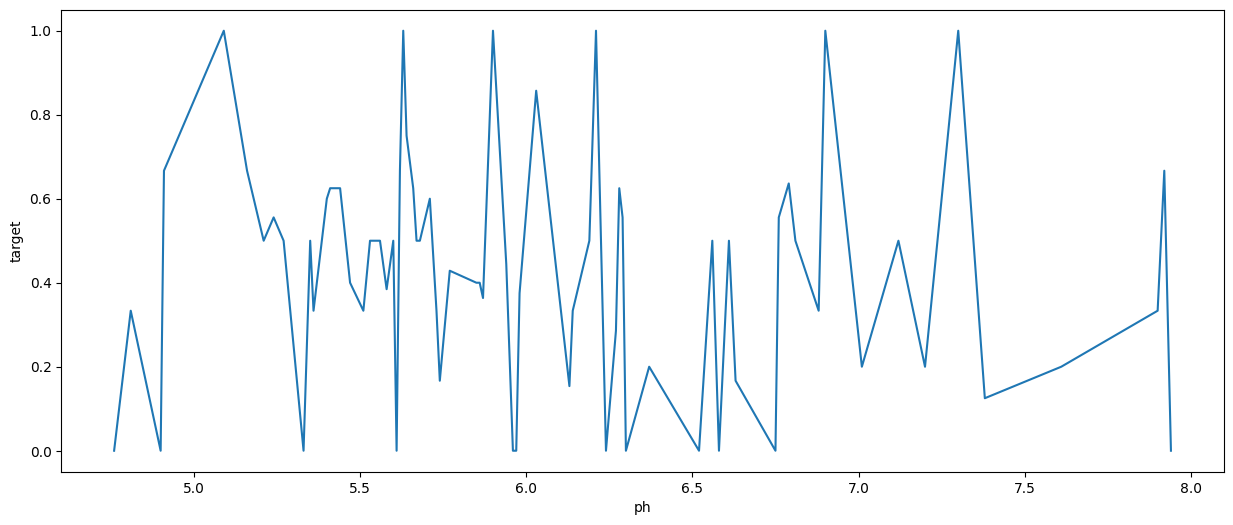

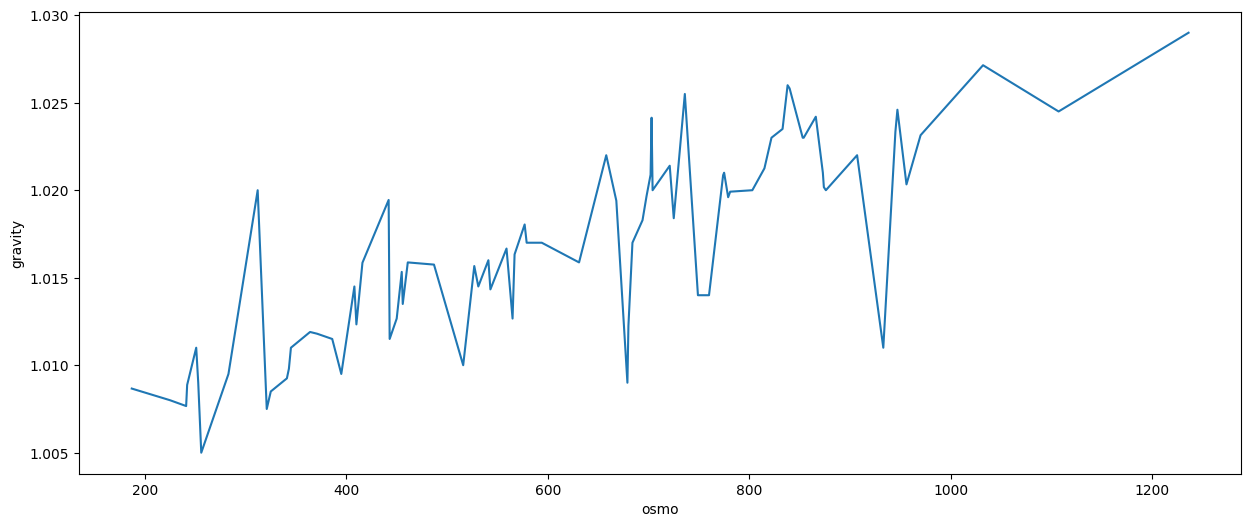

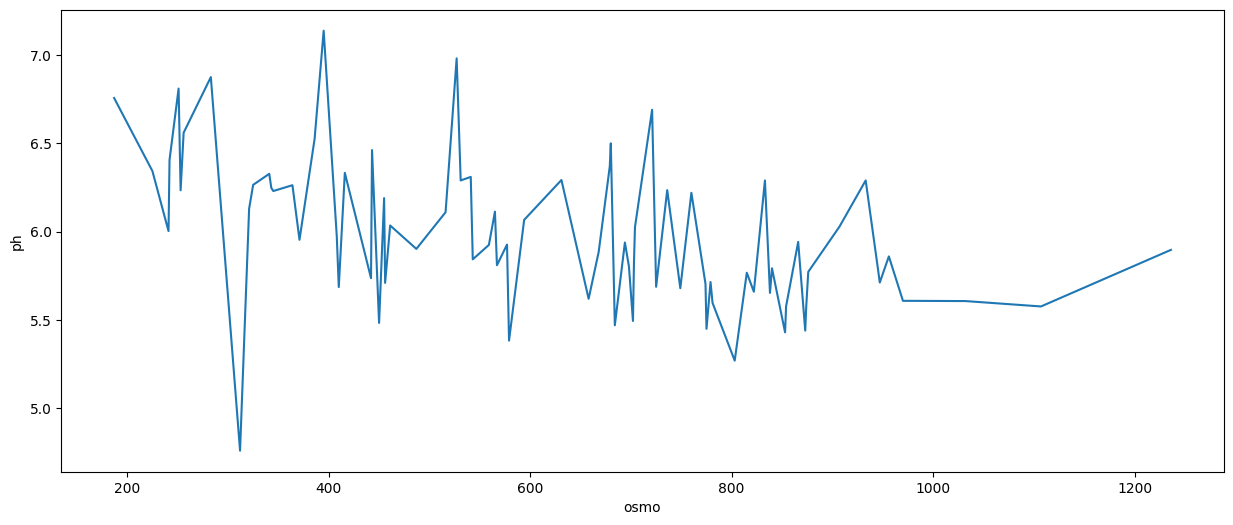

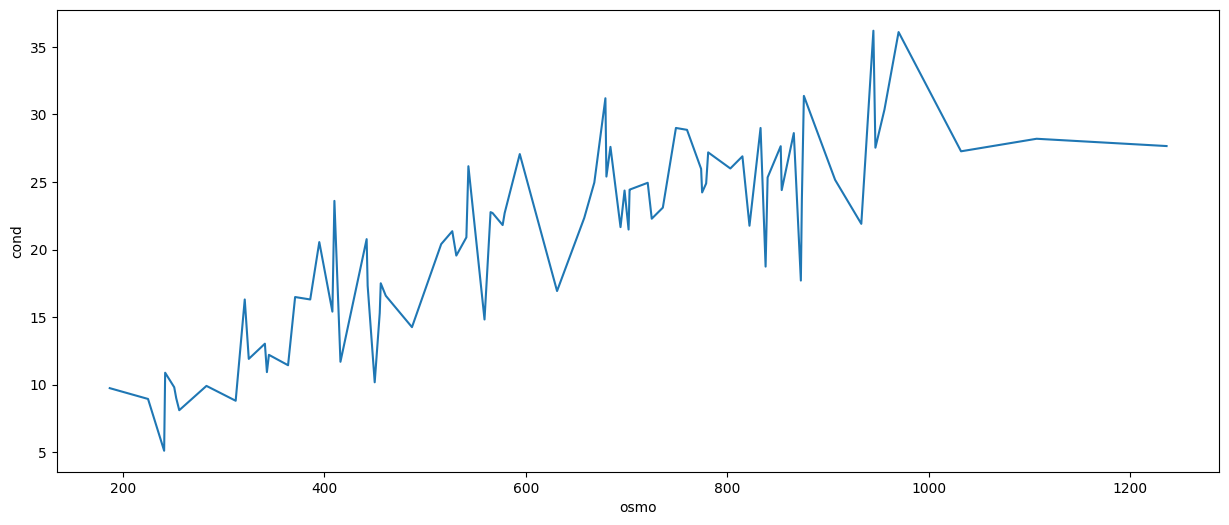

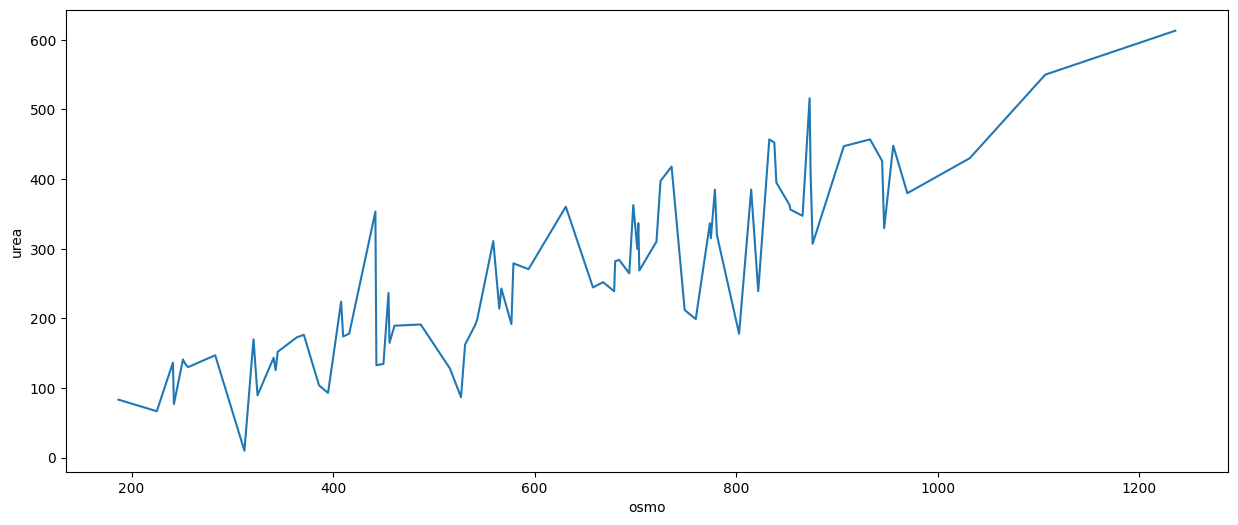

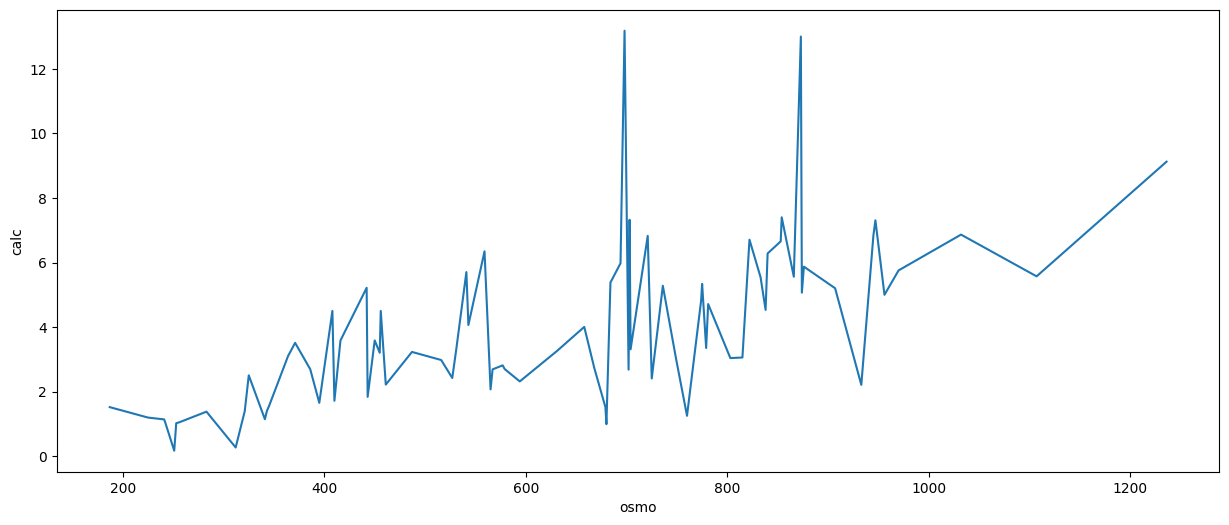

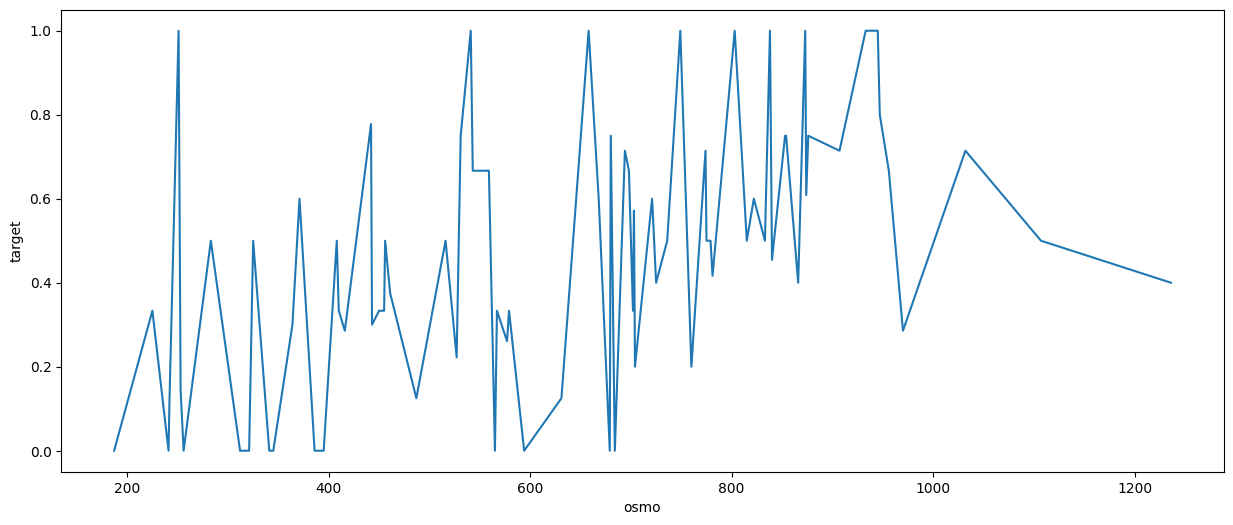

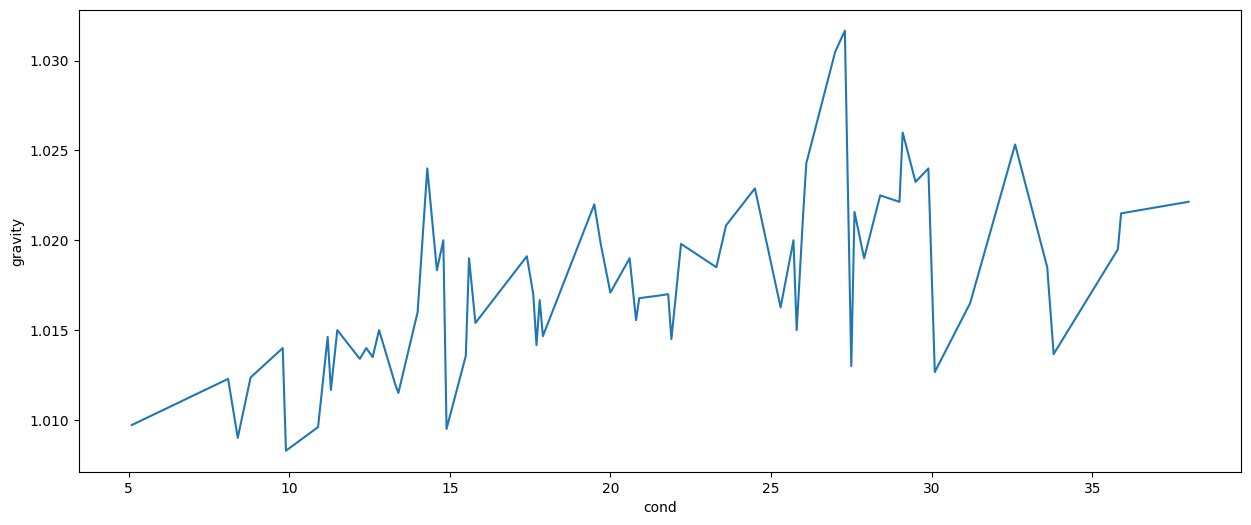

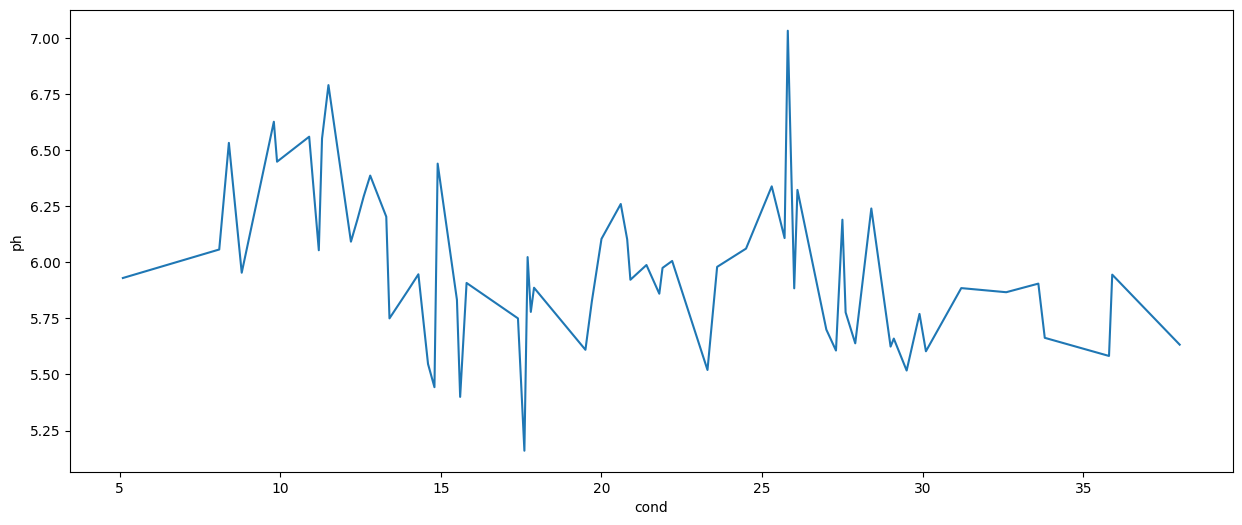

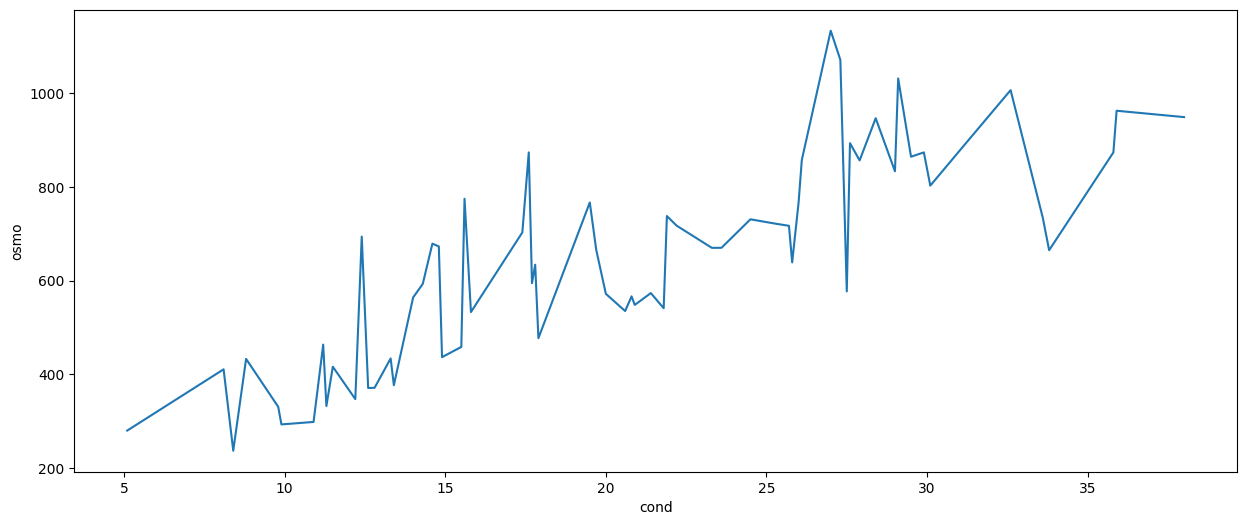

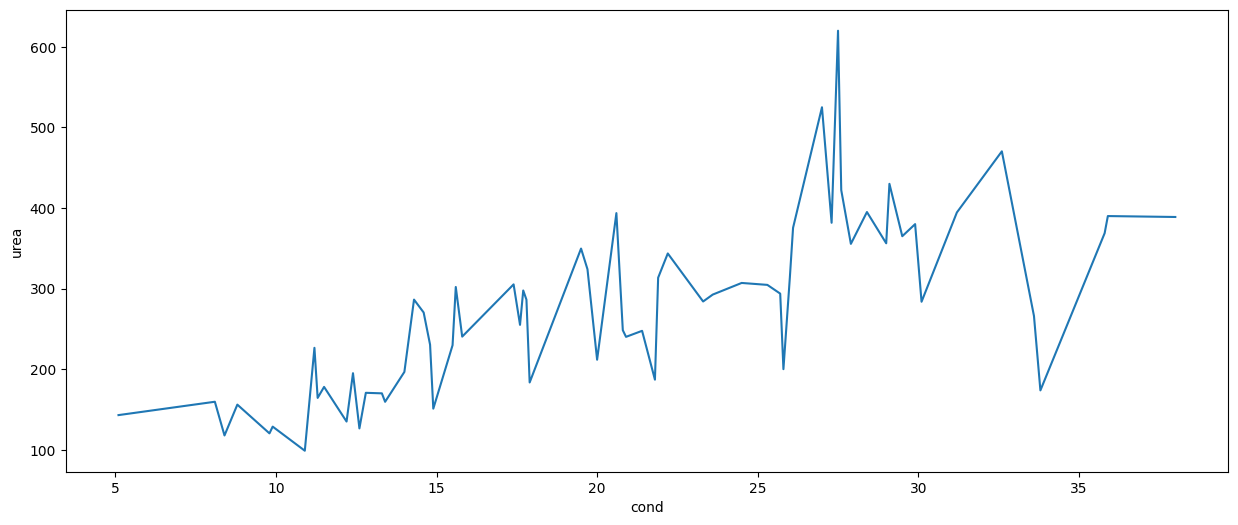

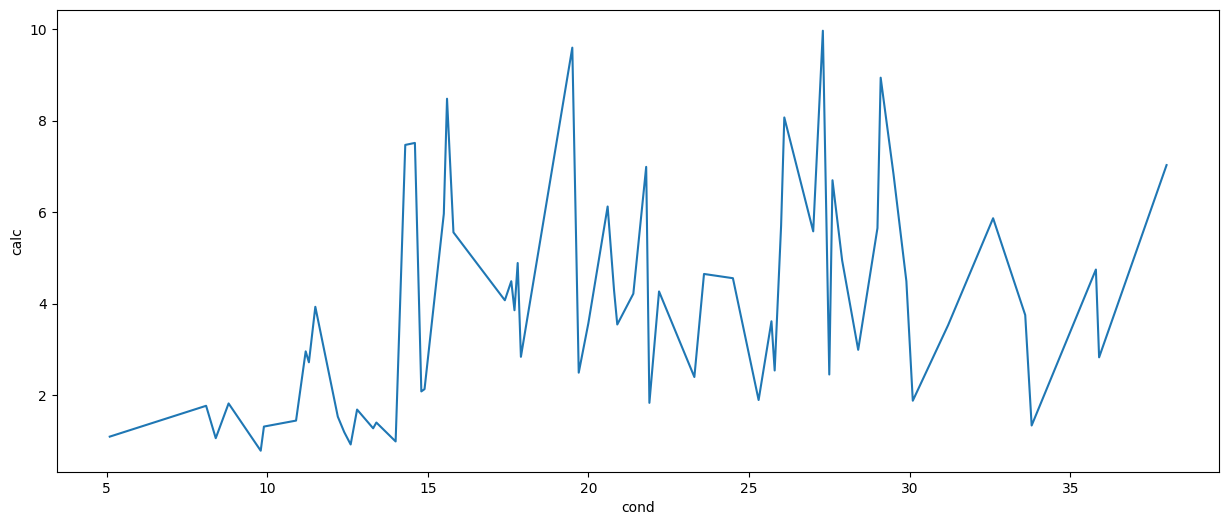

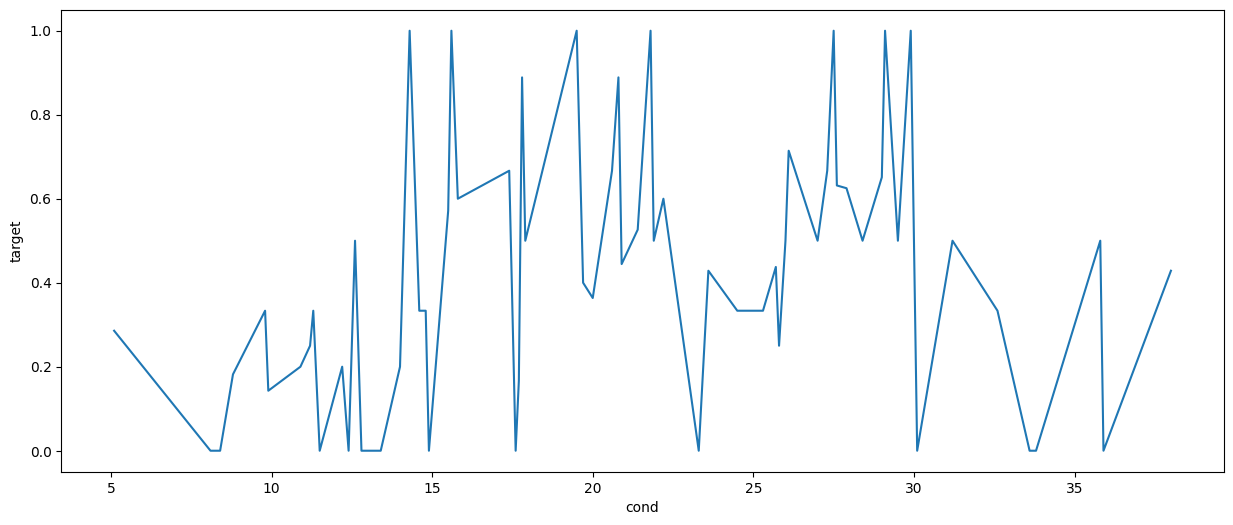

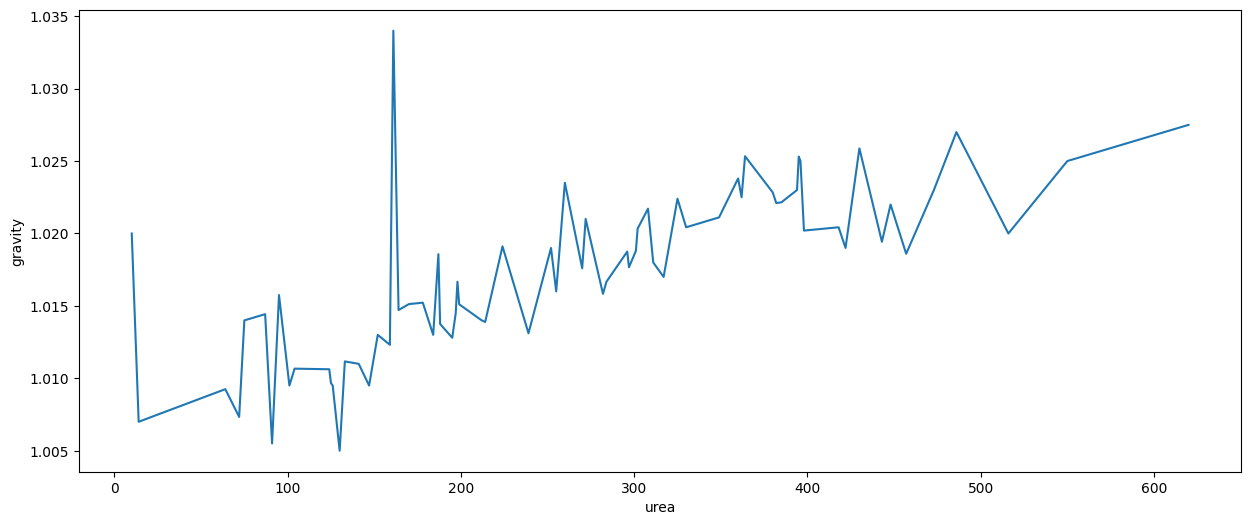

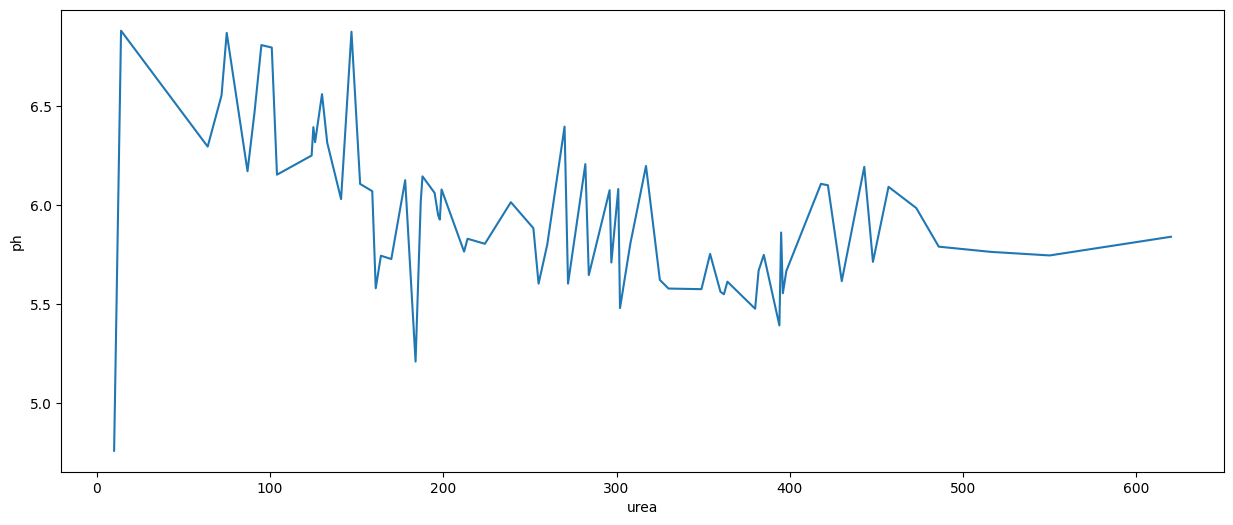

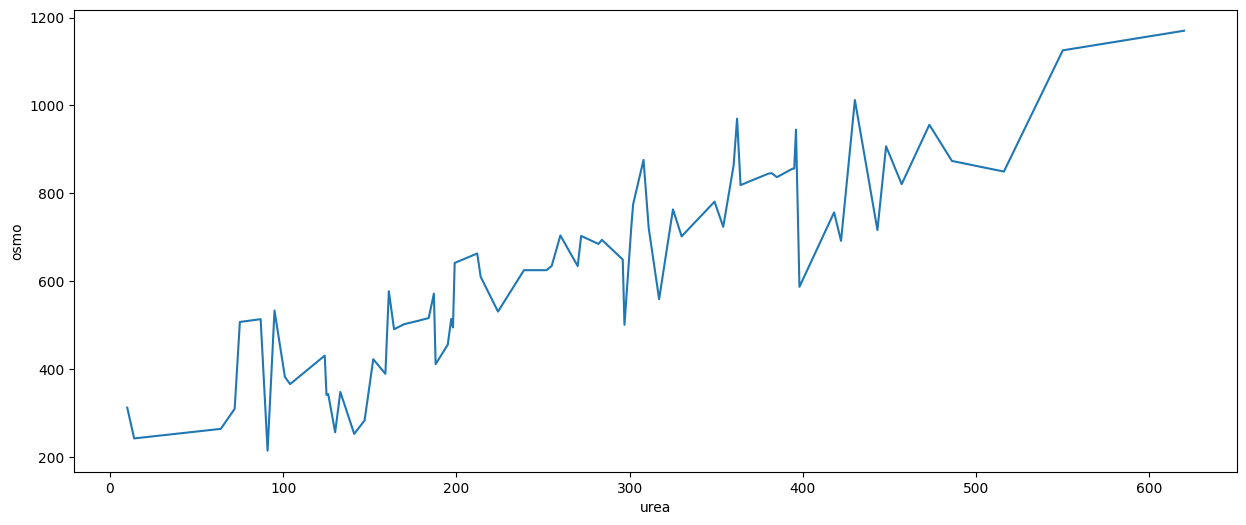

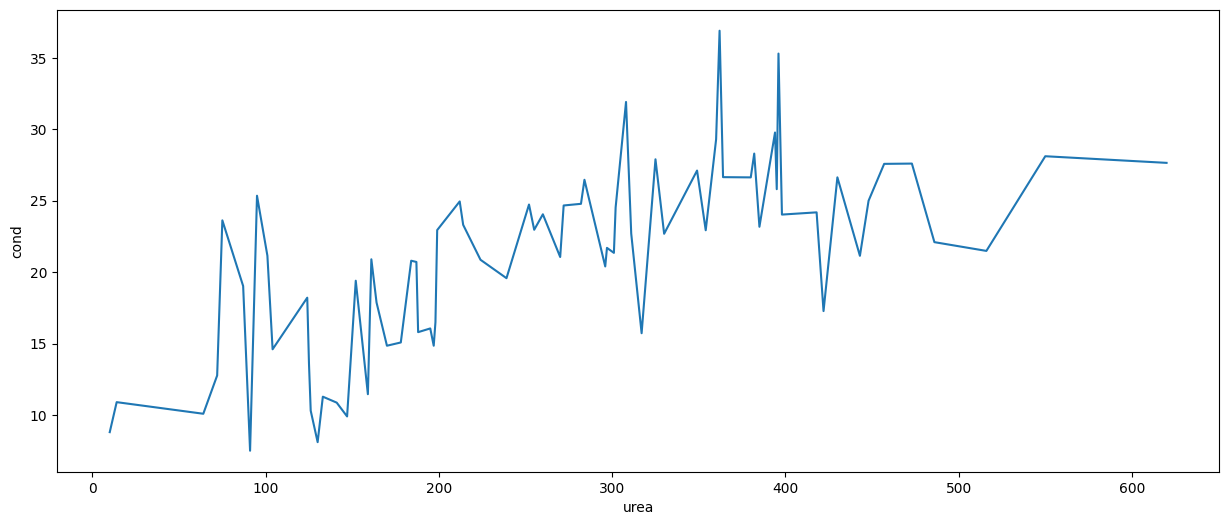

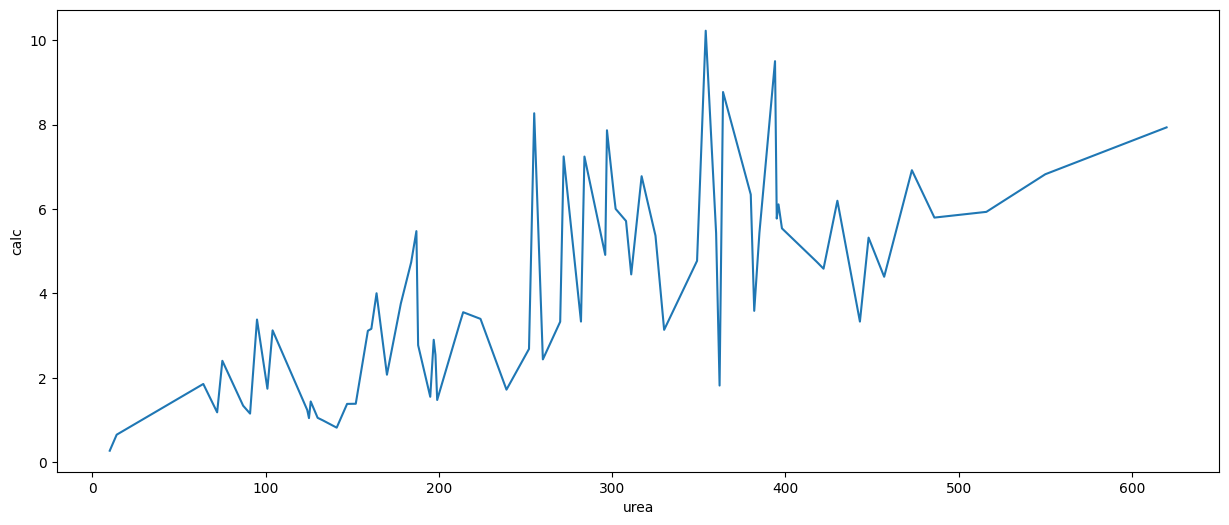

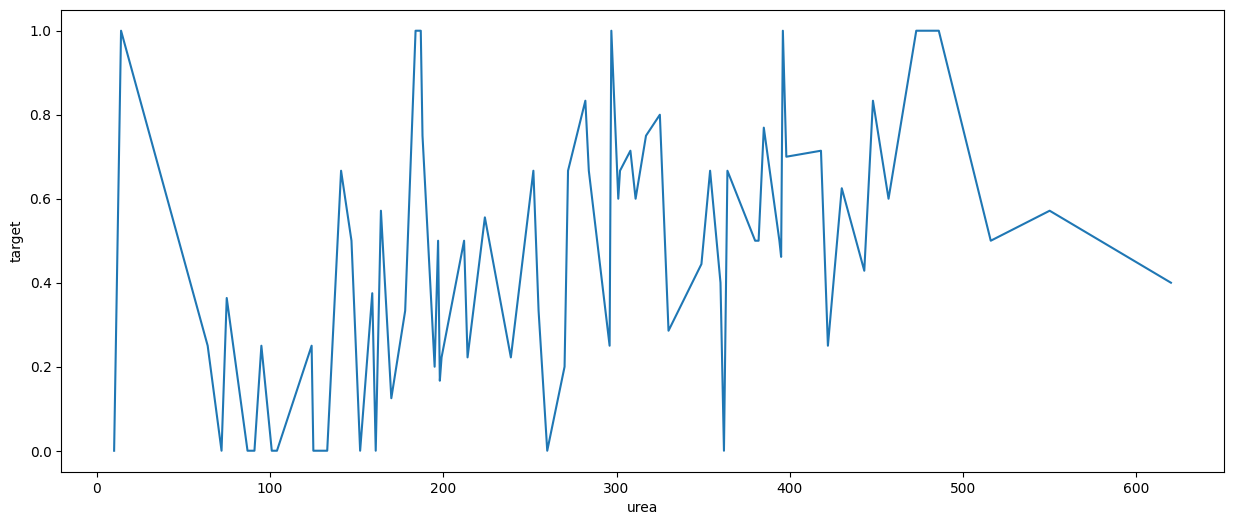

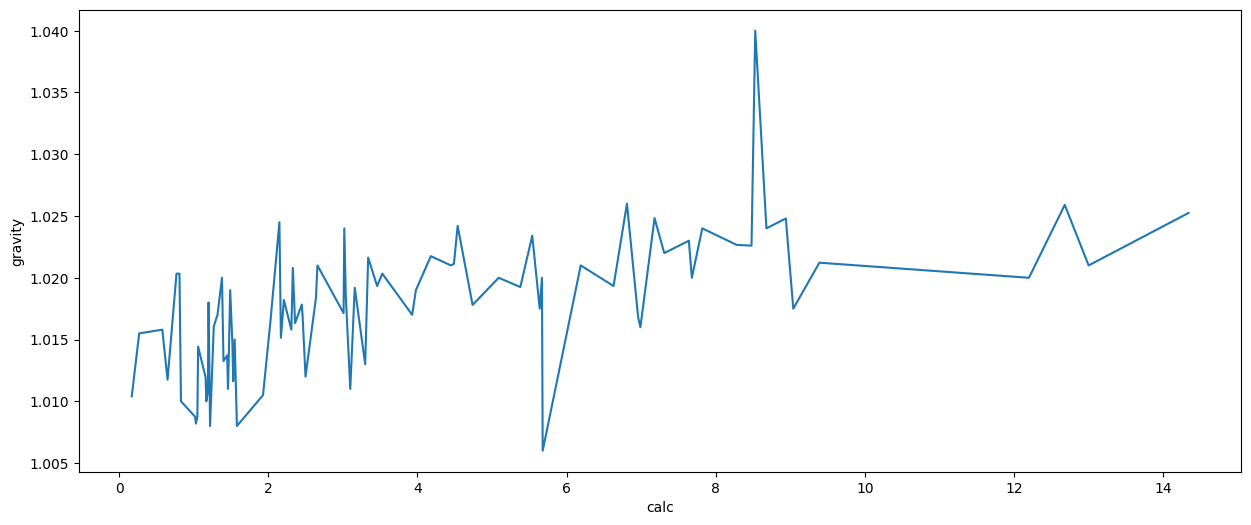

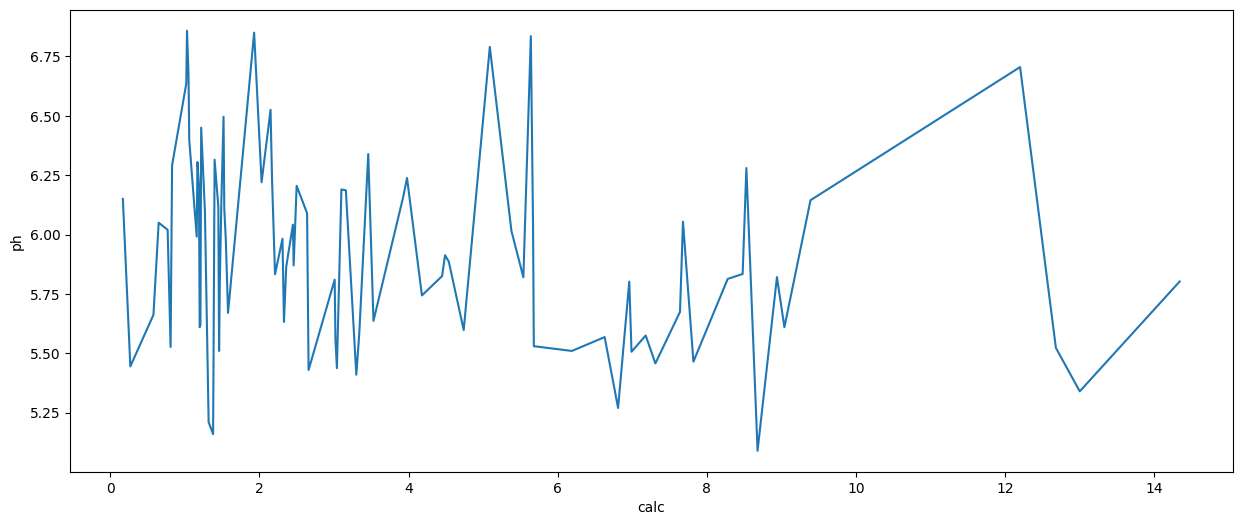

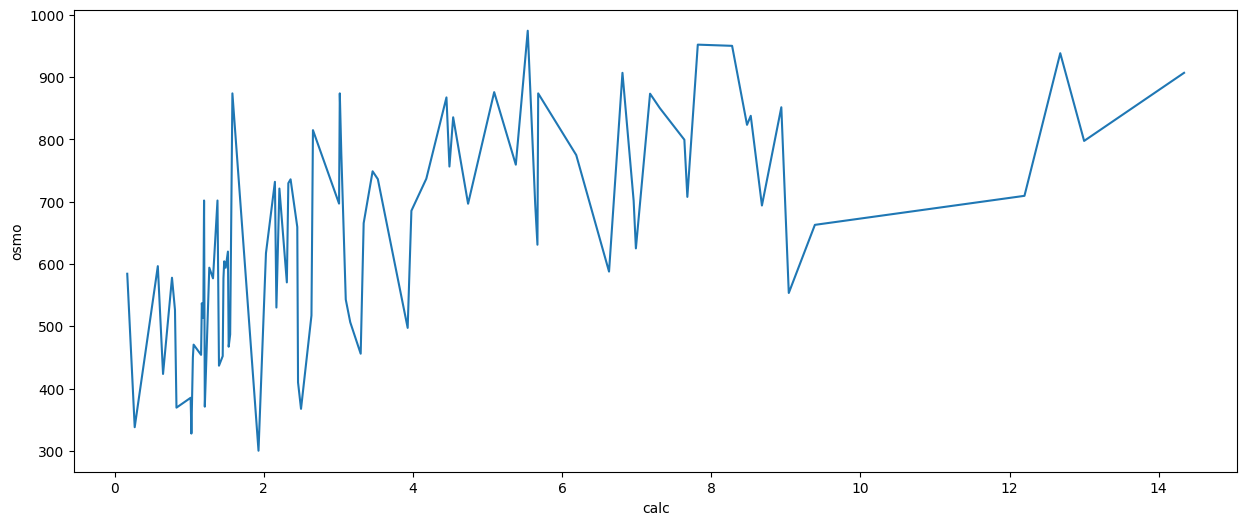

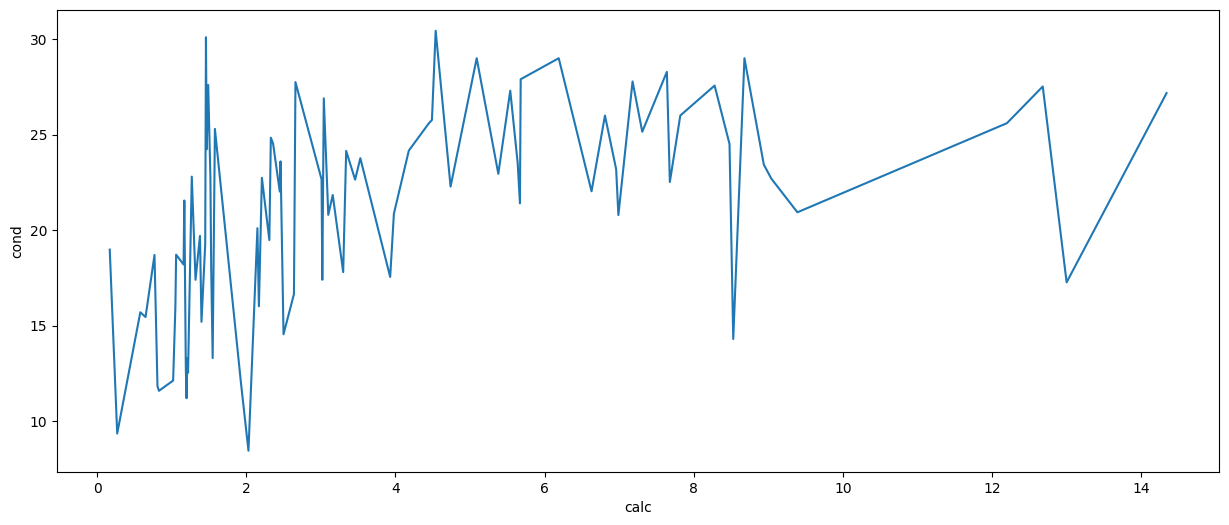

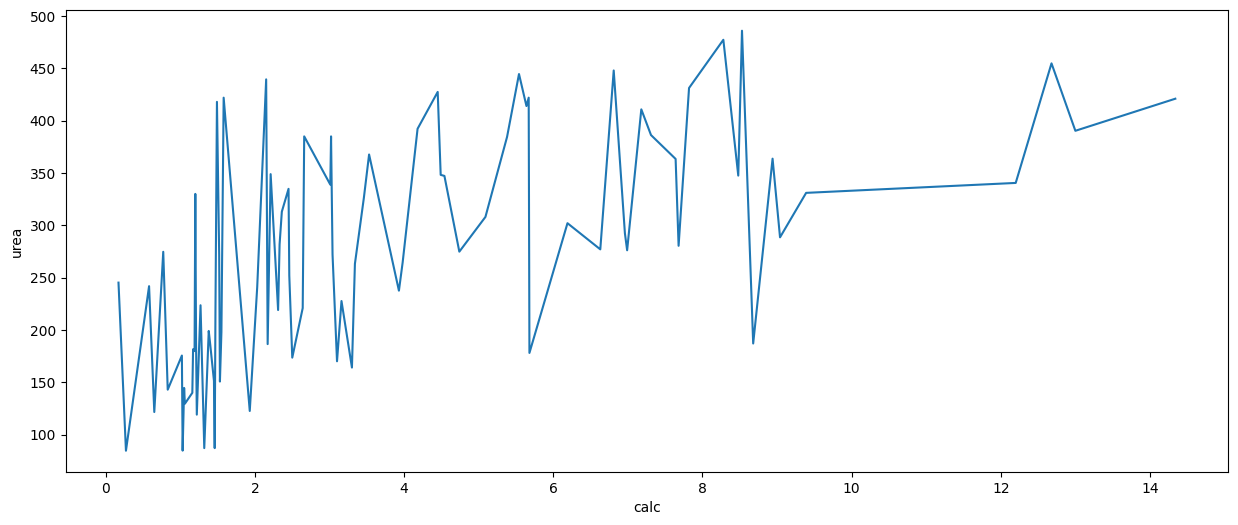

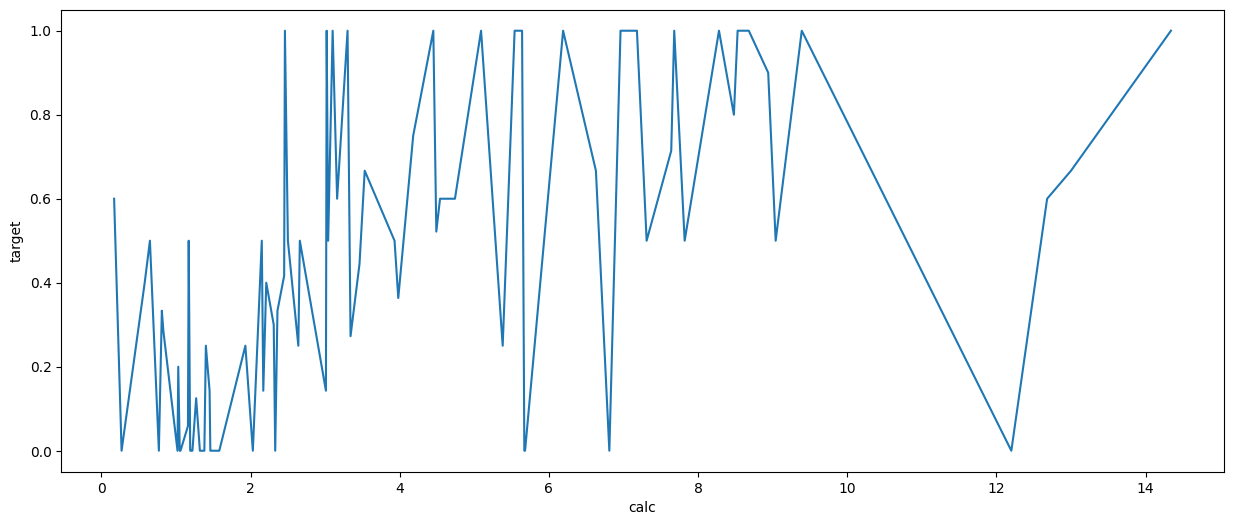

In [ ]:
for i in df.columns:
  for j in df.columns:
    if i!=j:
      if i!='target':
        plt.figure(figsize=(15,6))
        sns.lineplot(x=df[i], y=df[j], data=df,ci=None ,palette='hls')
        plt.show()


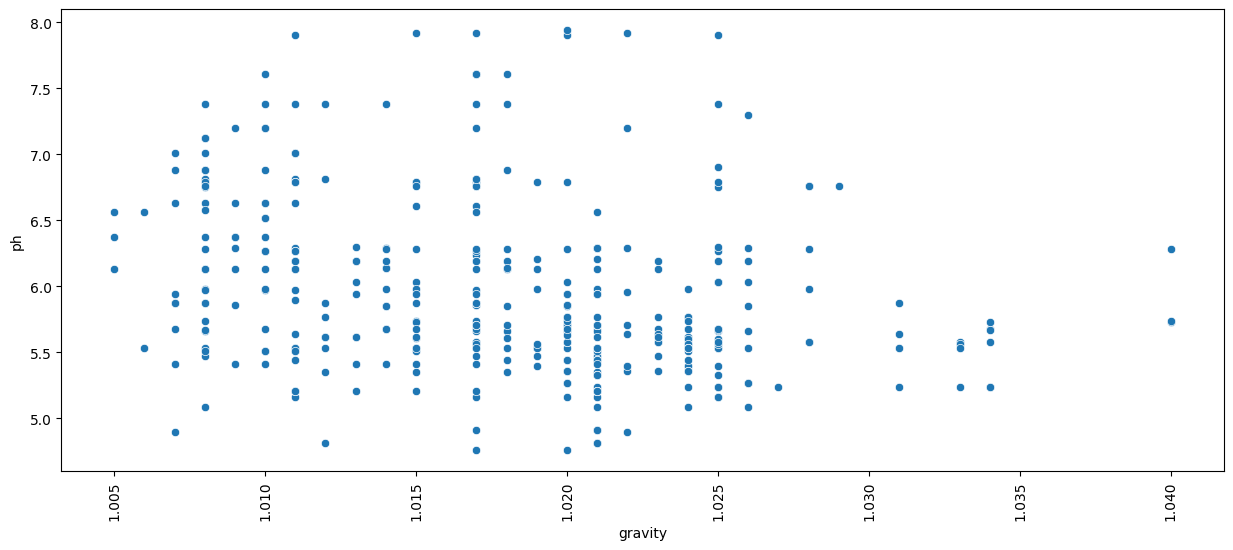

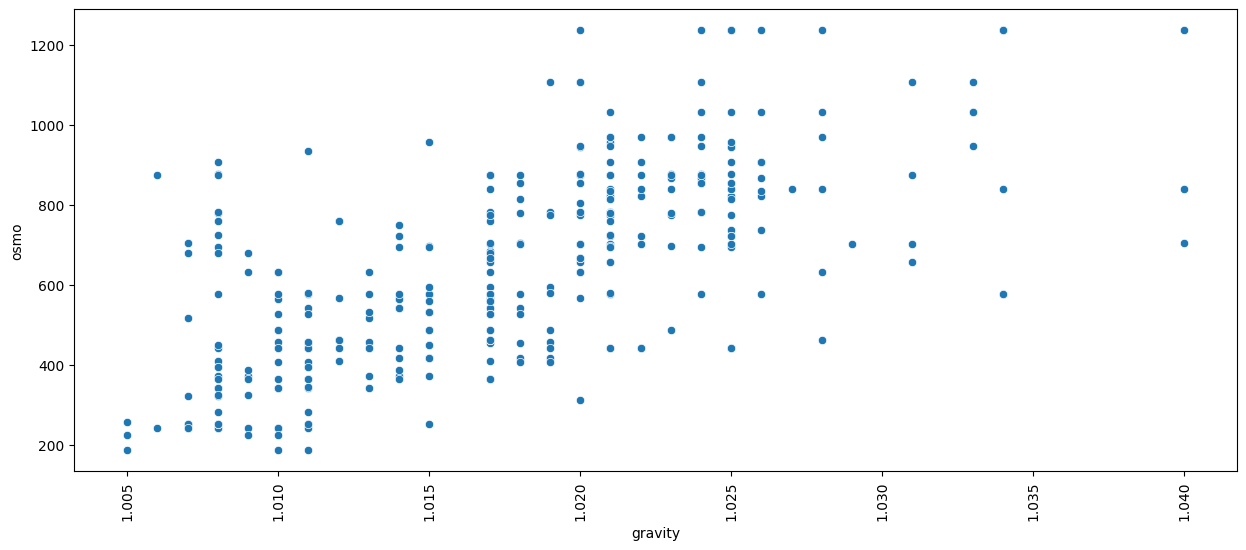

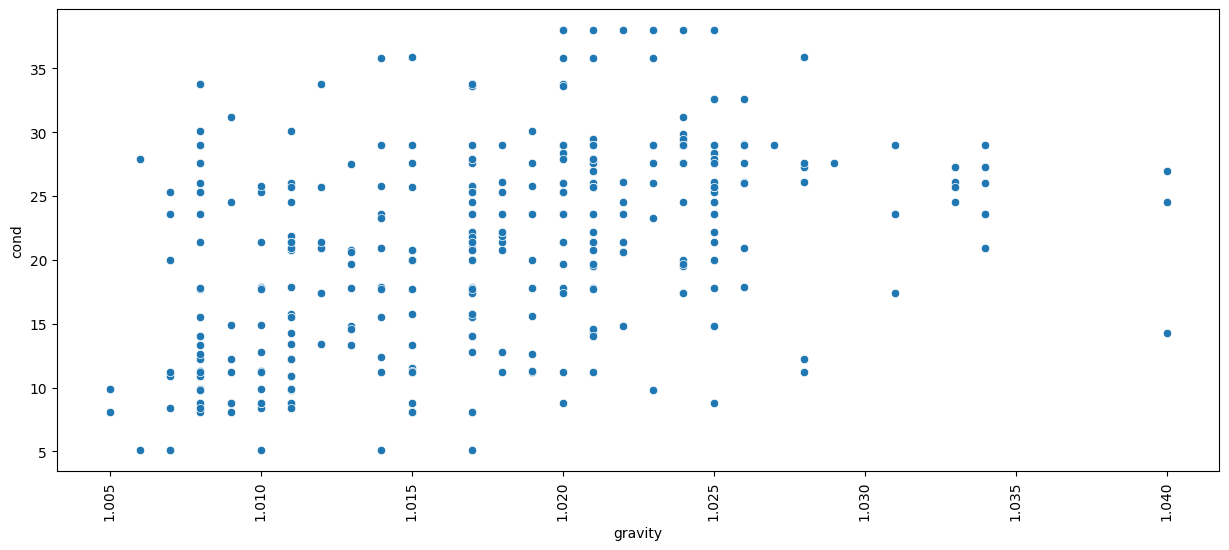

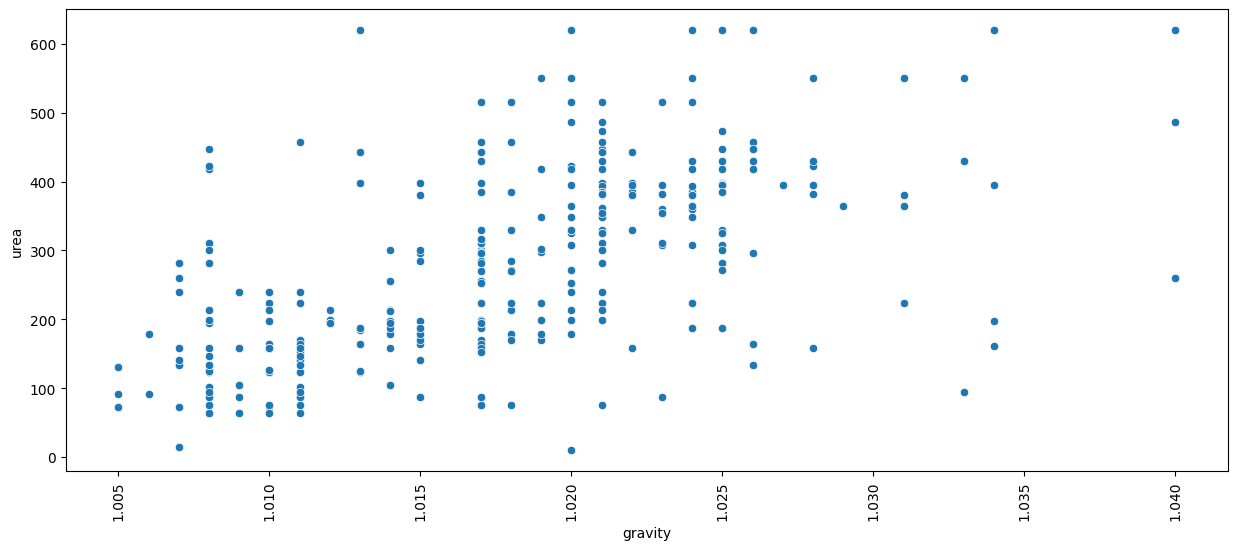

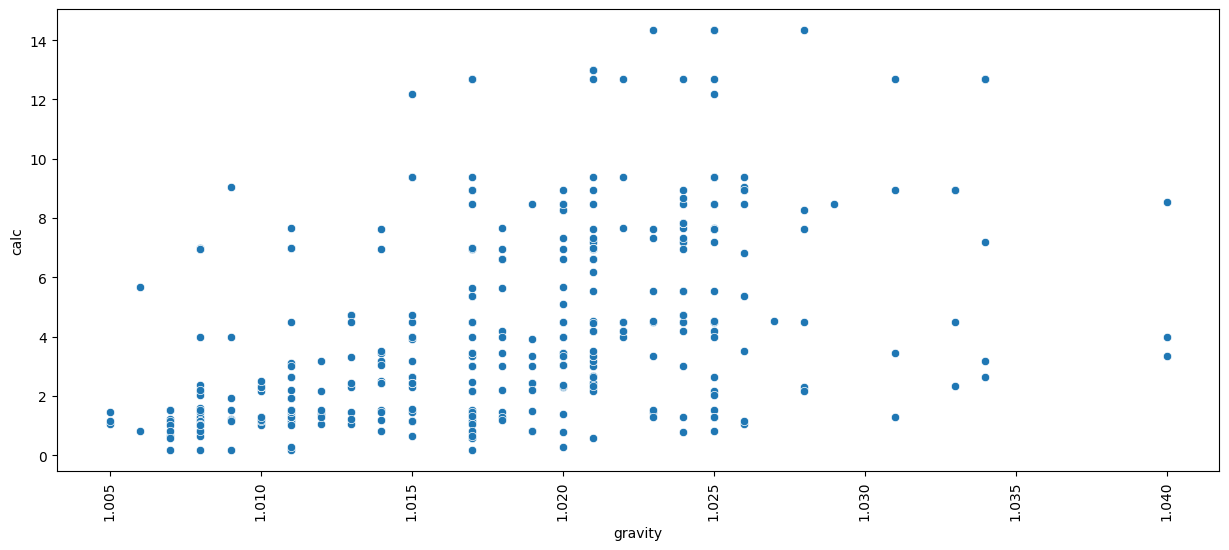

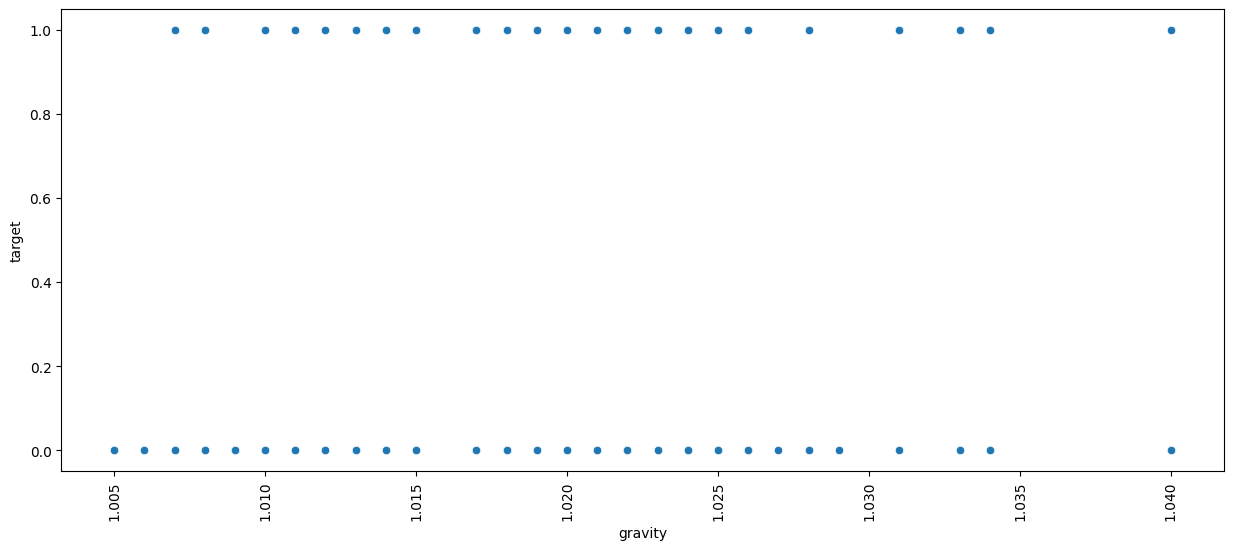

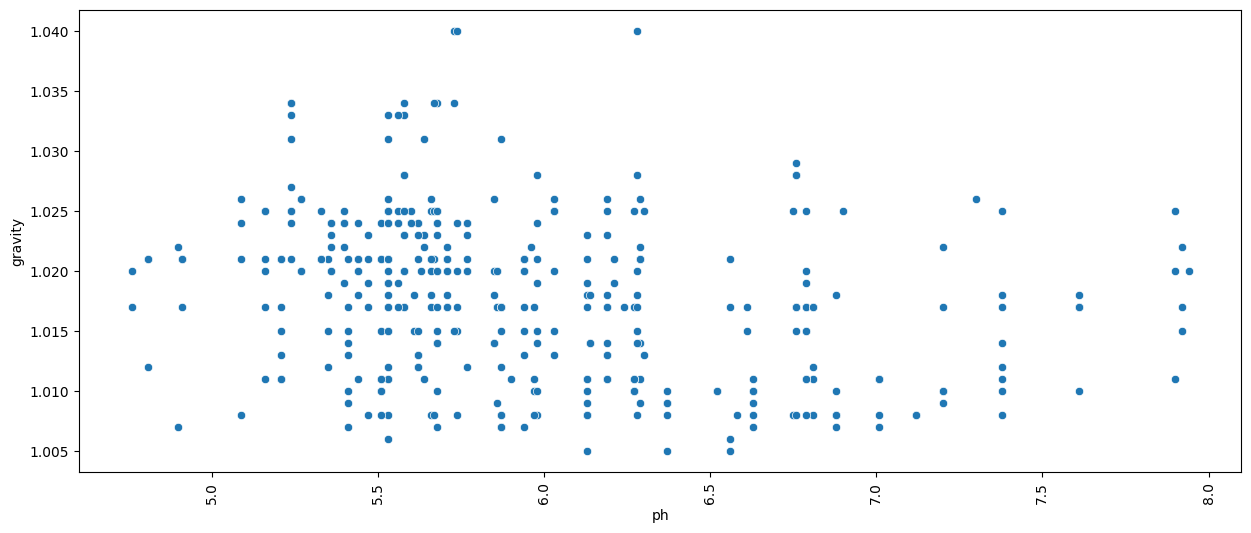

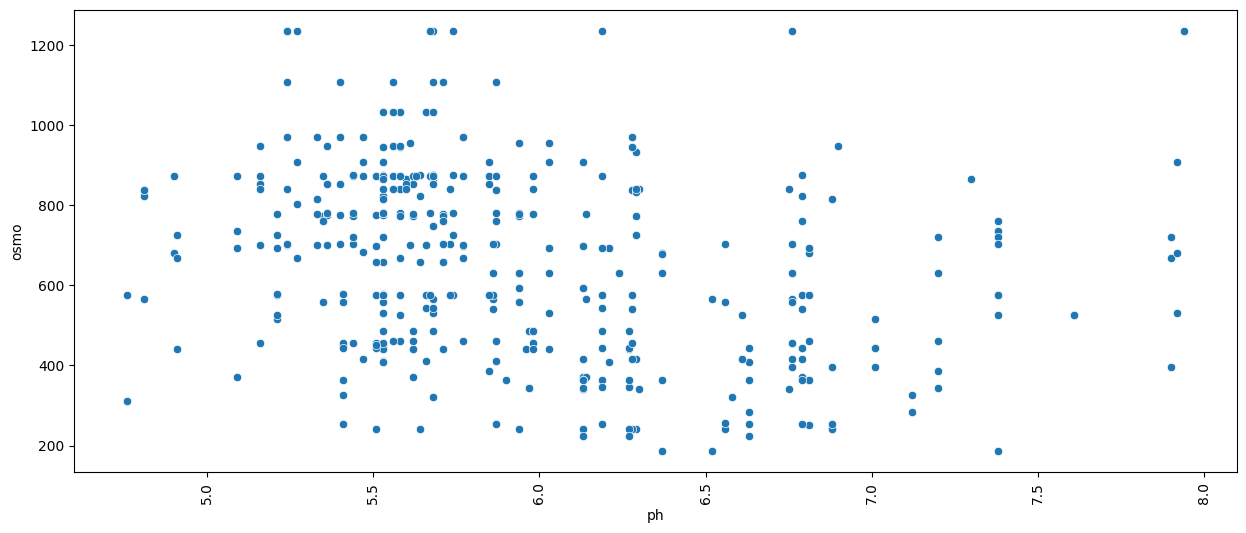

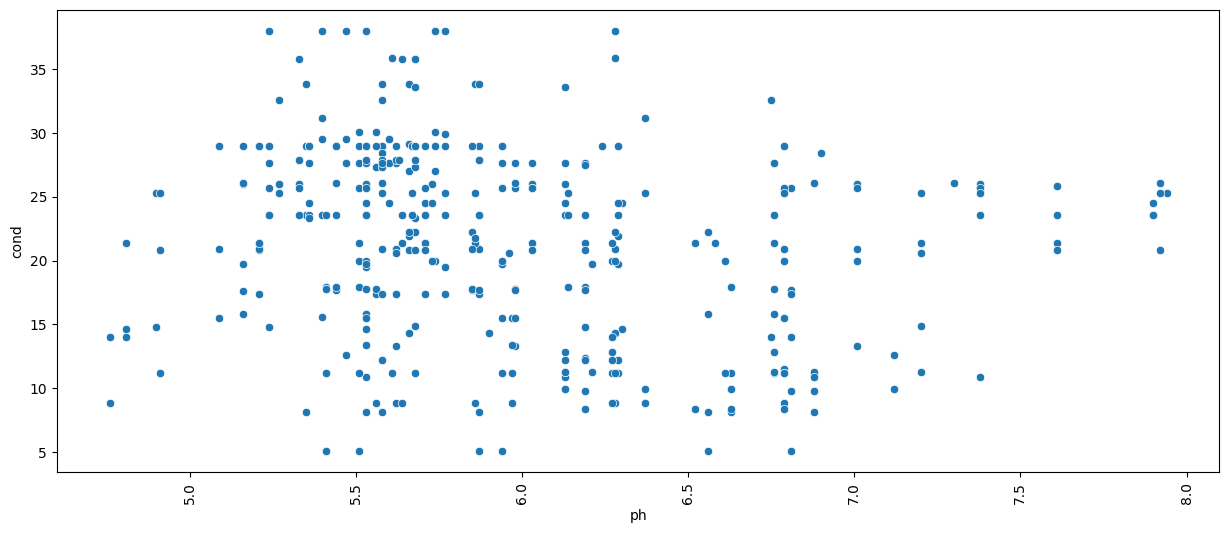

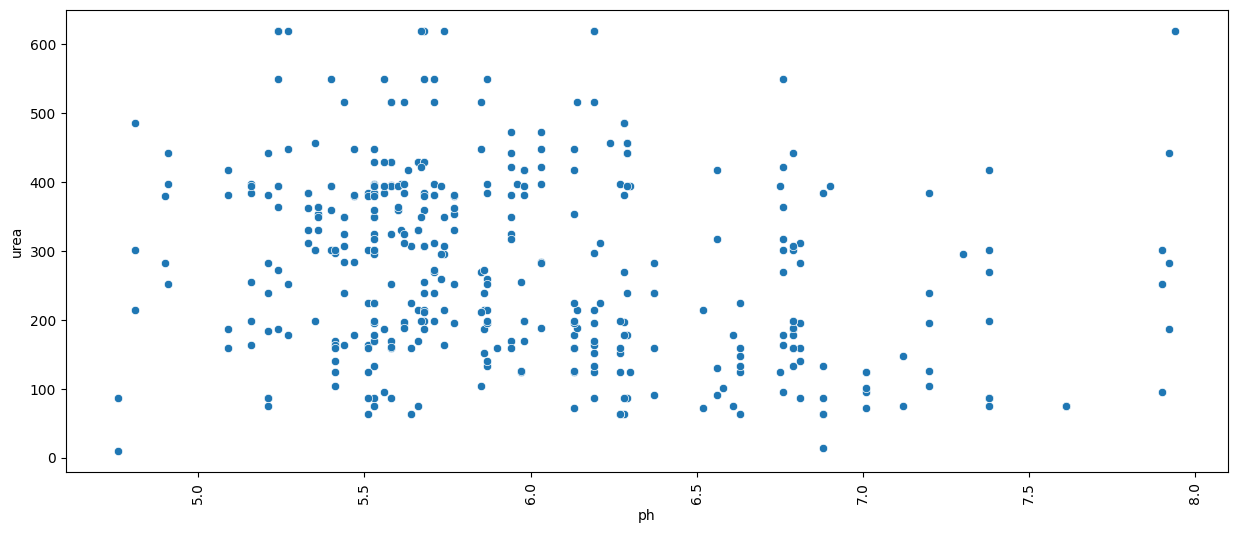

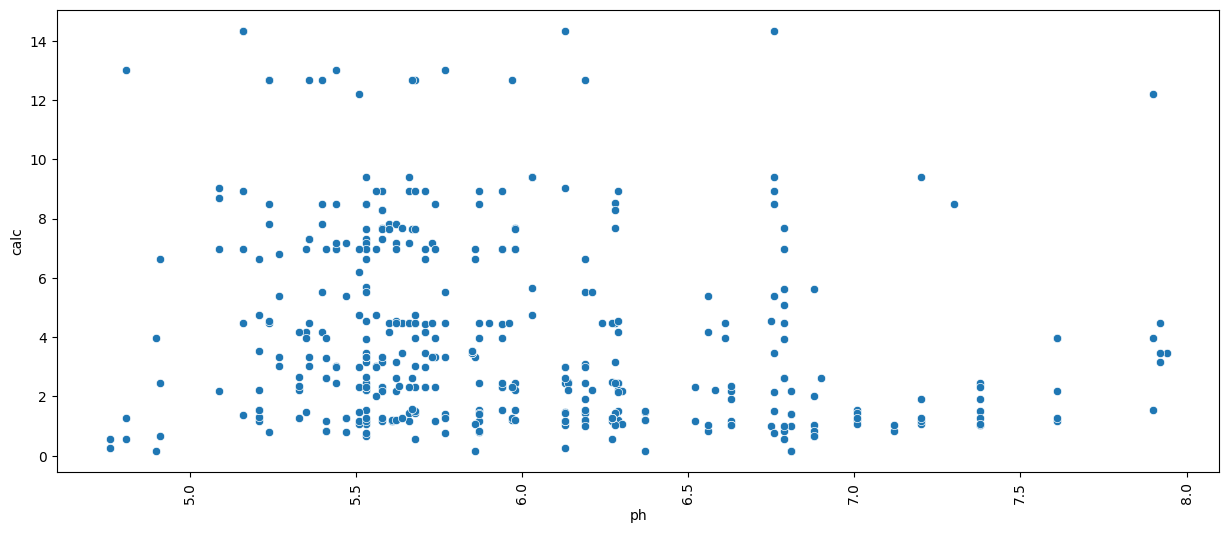

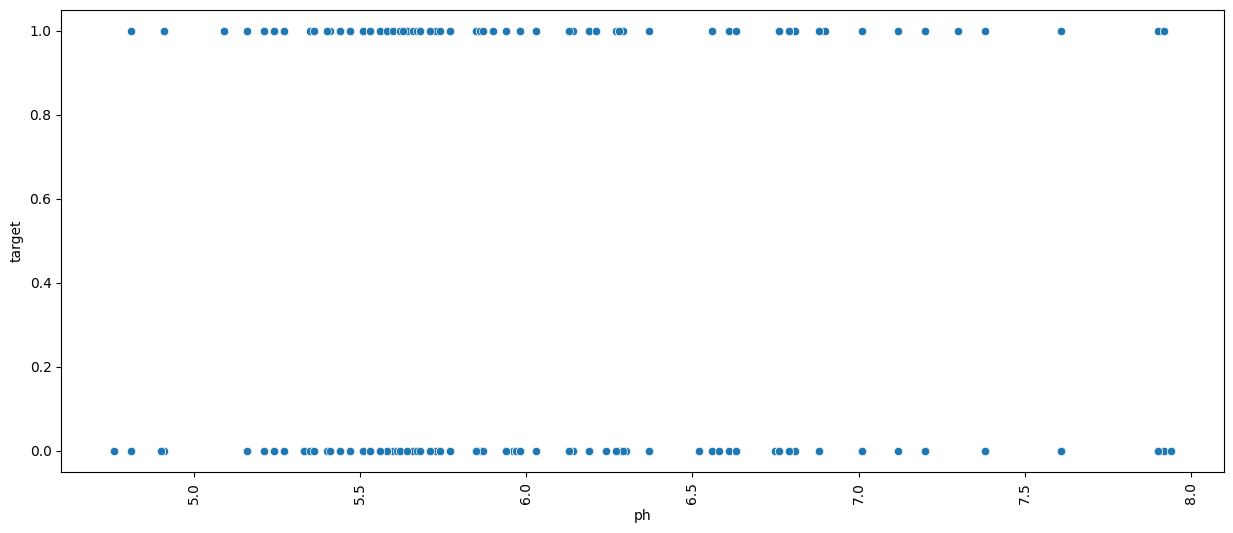

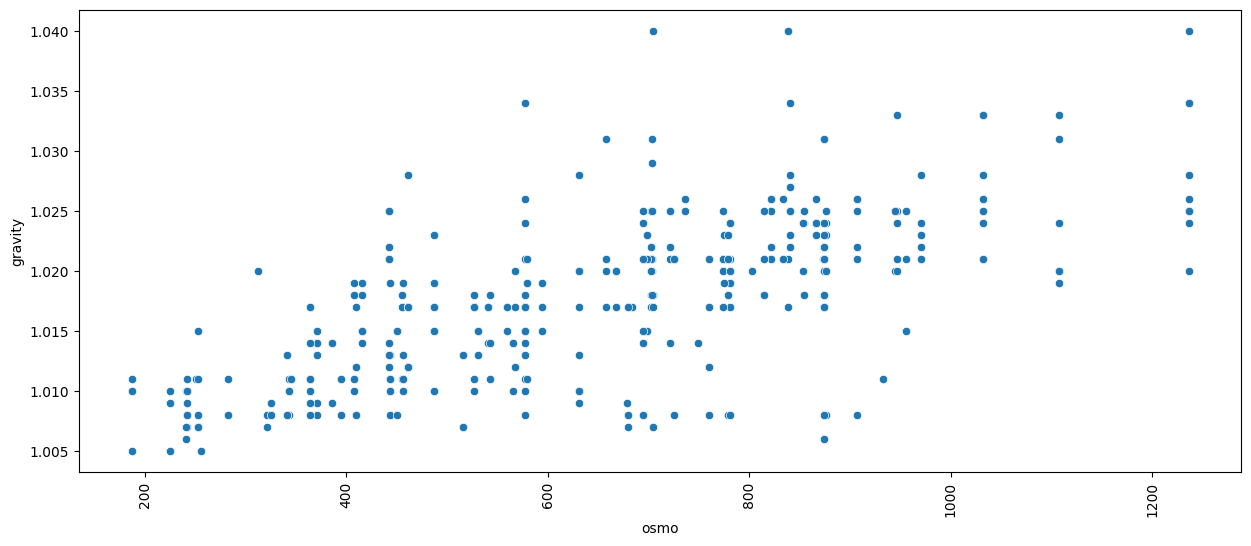

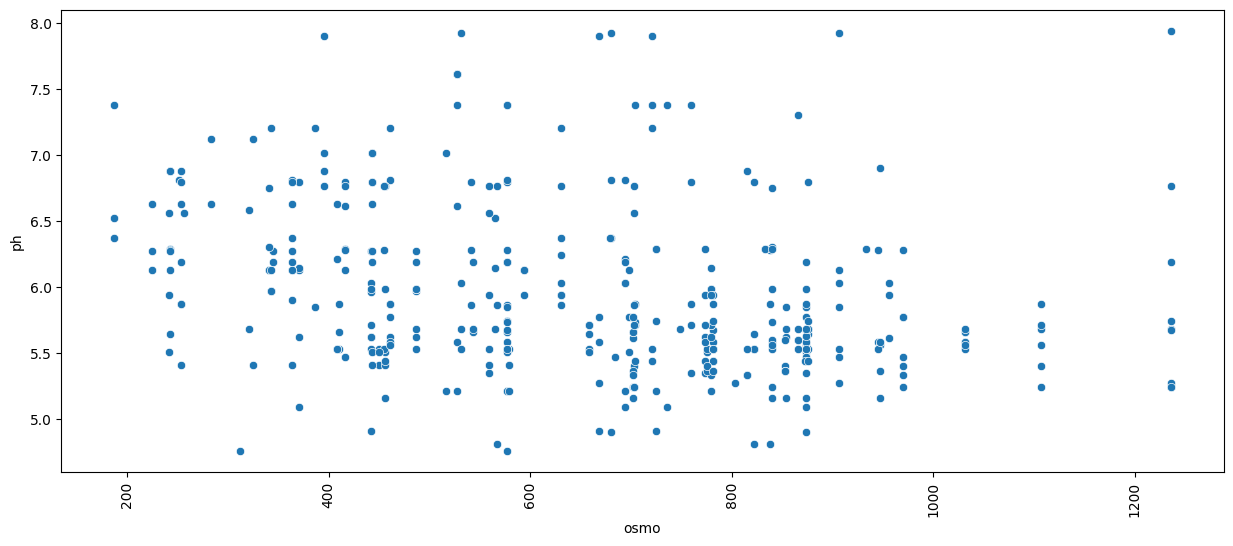

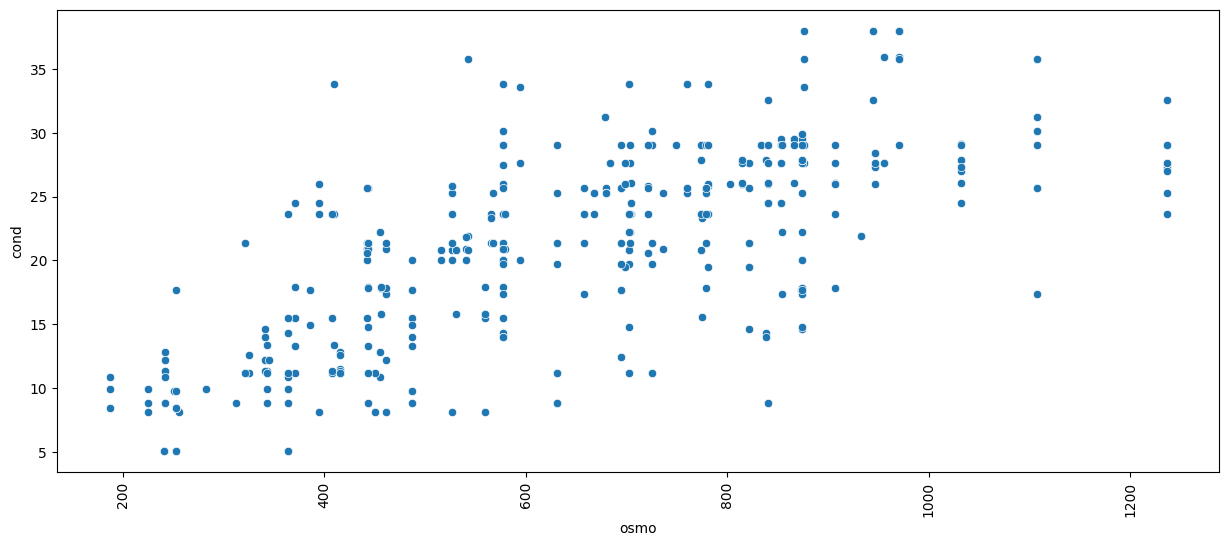

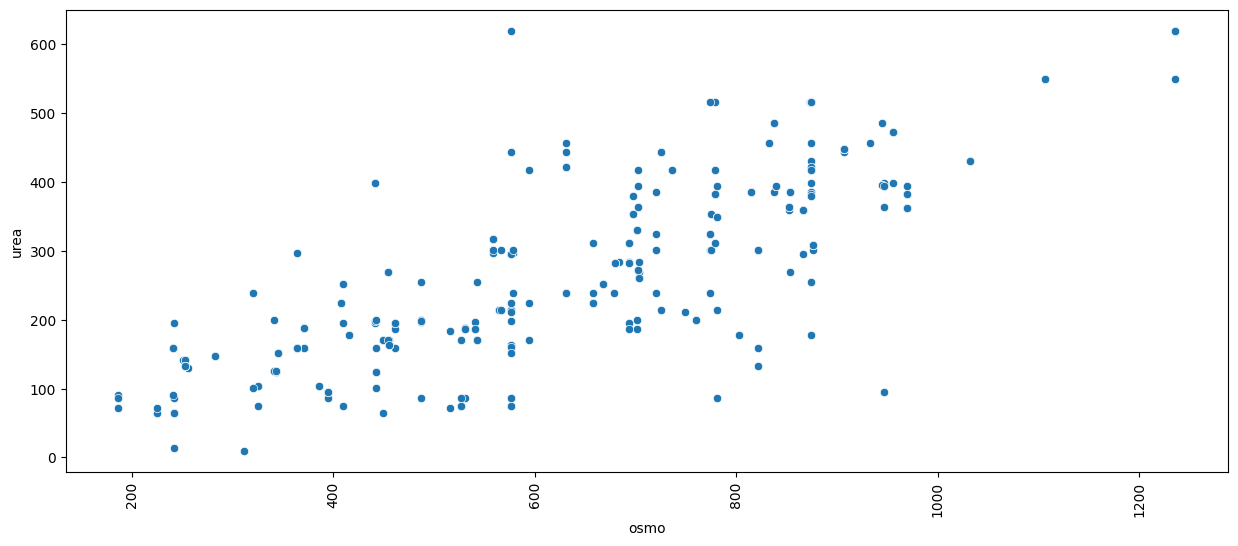

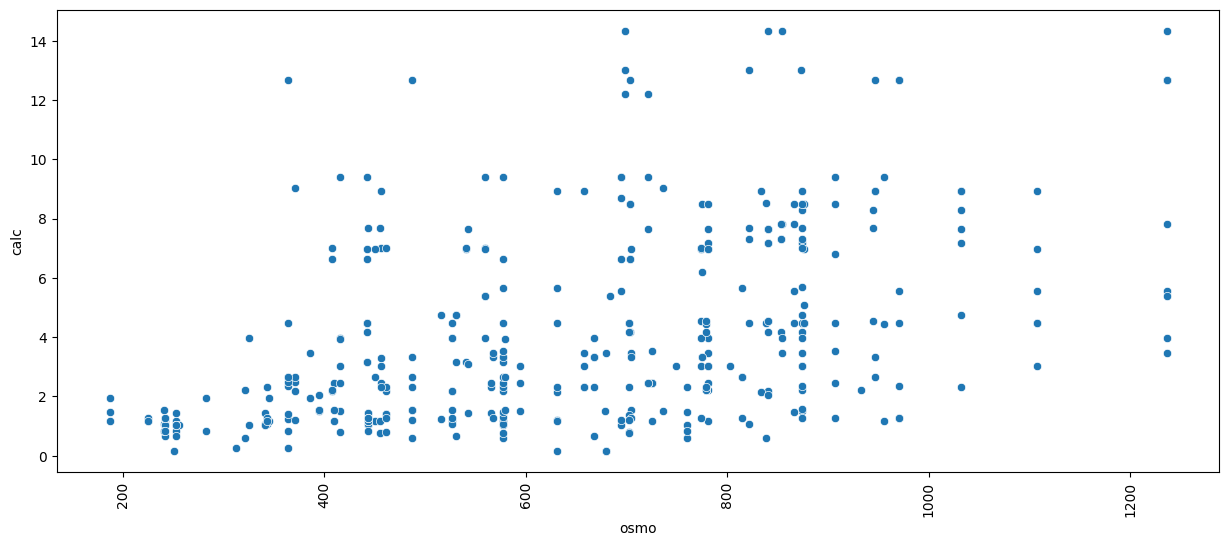

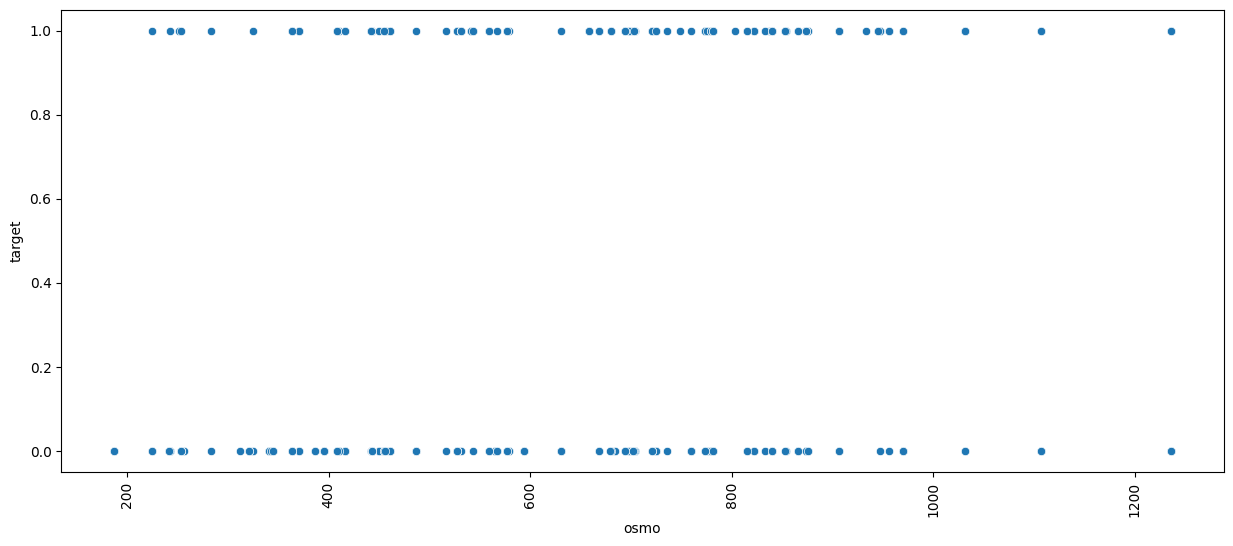

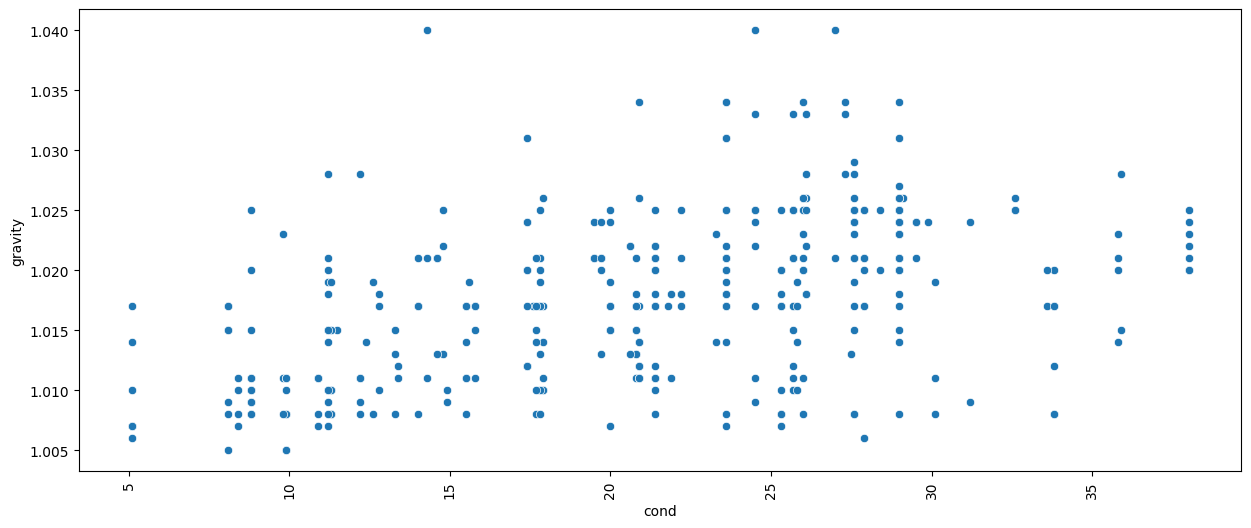

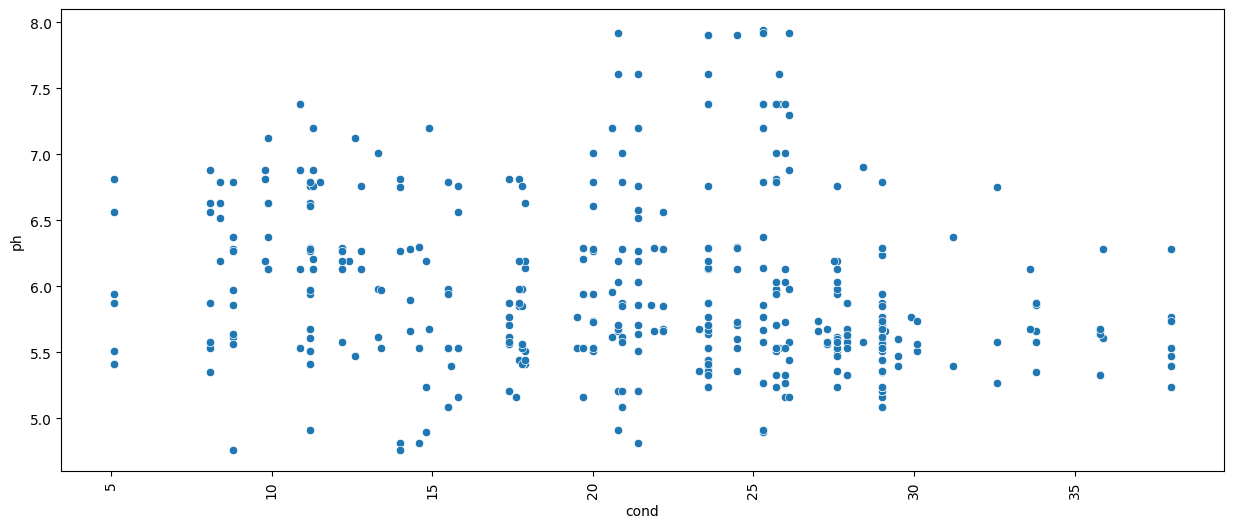

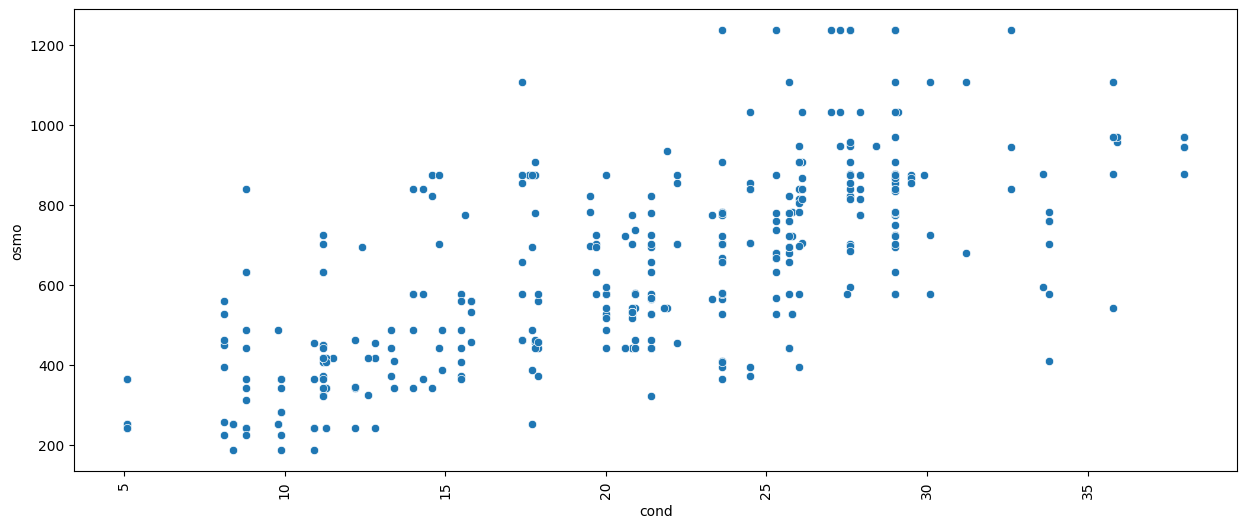

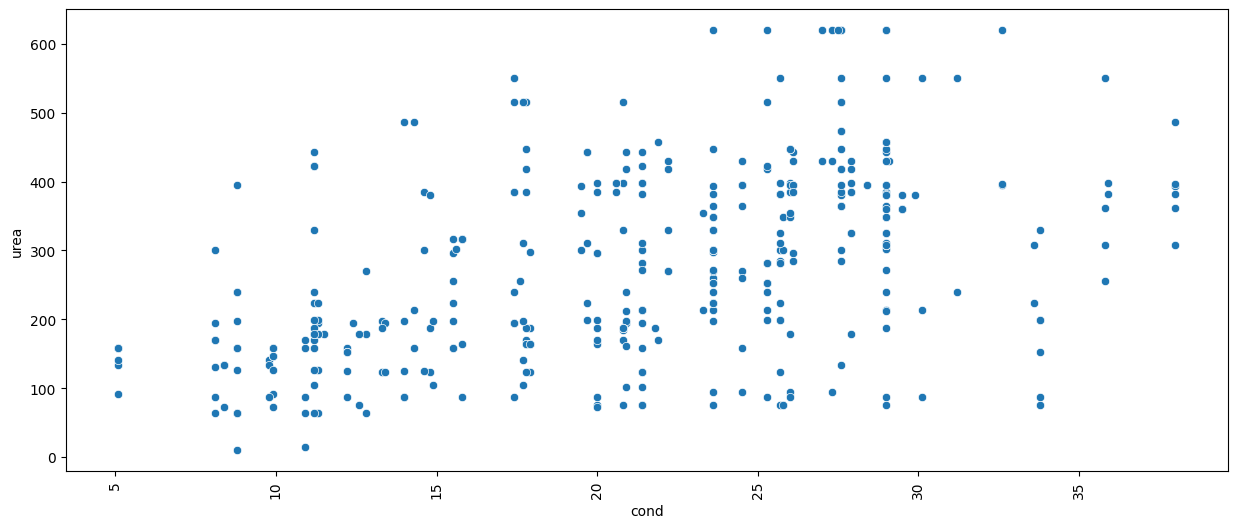

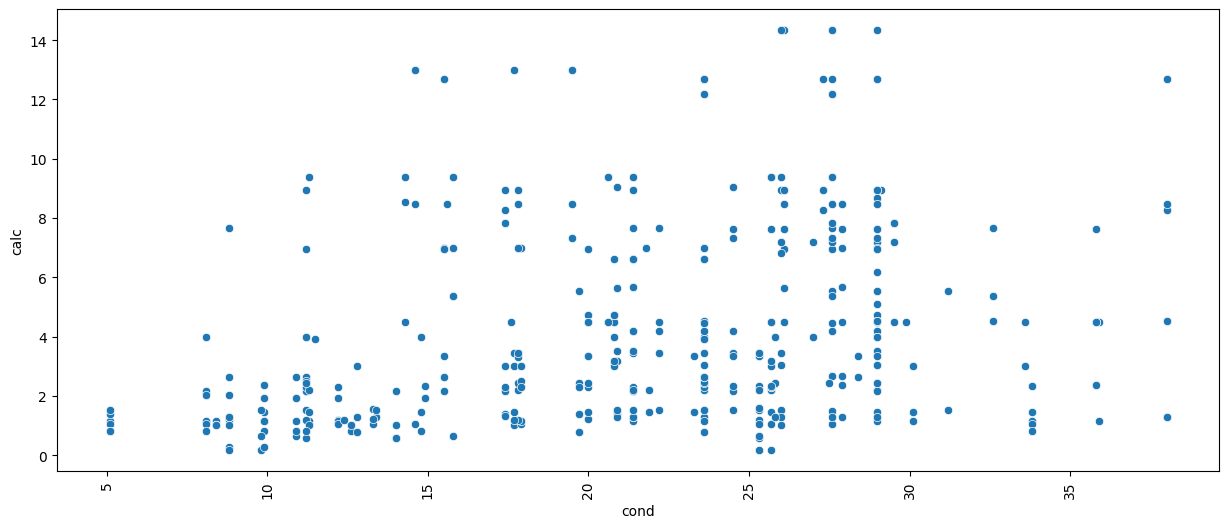

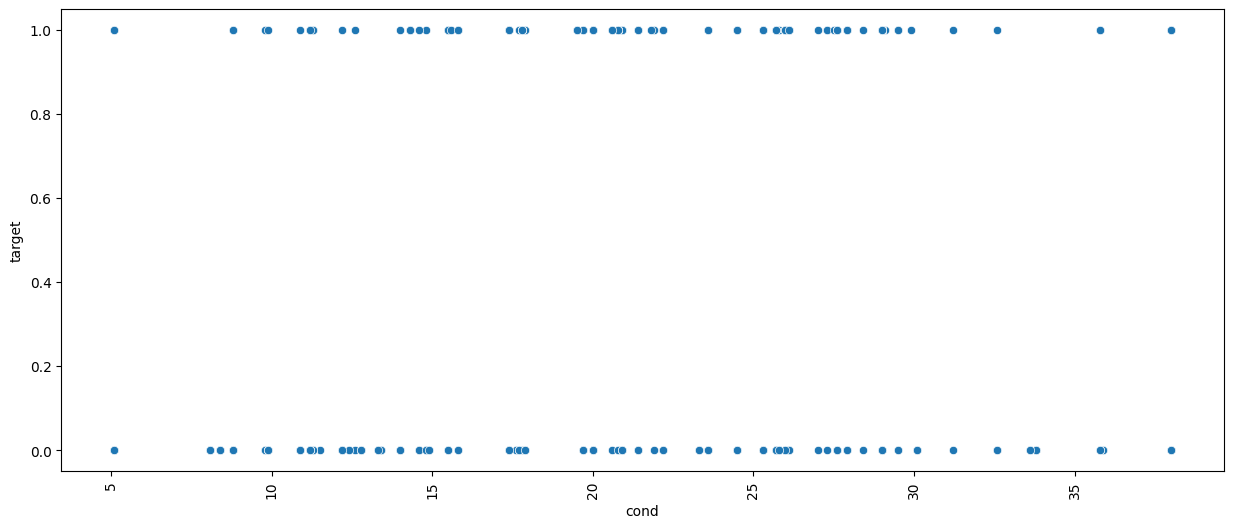

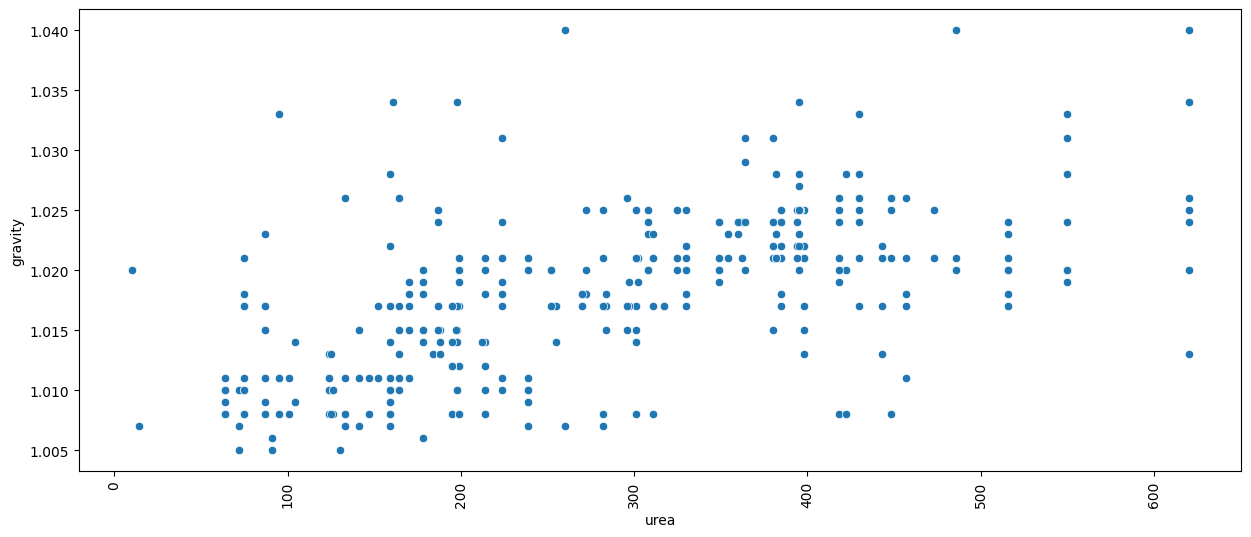

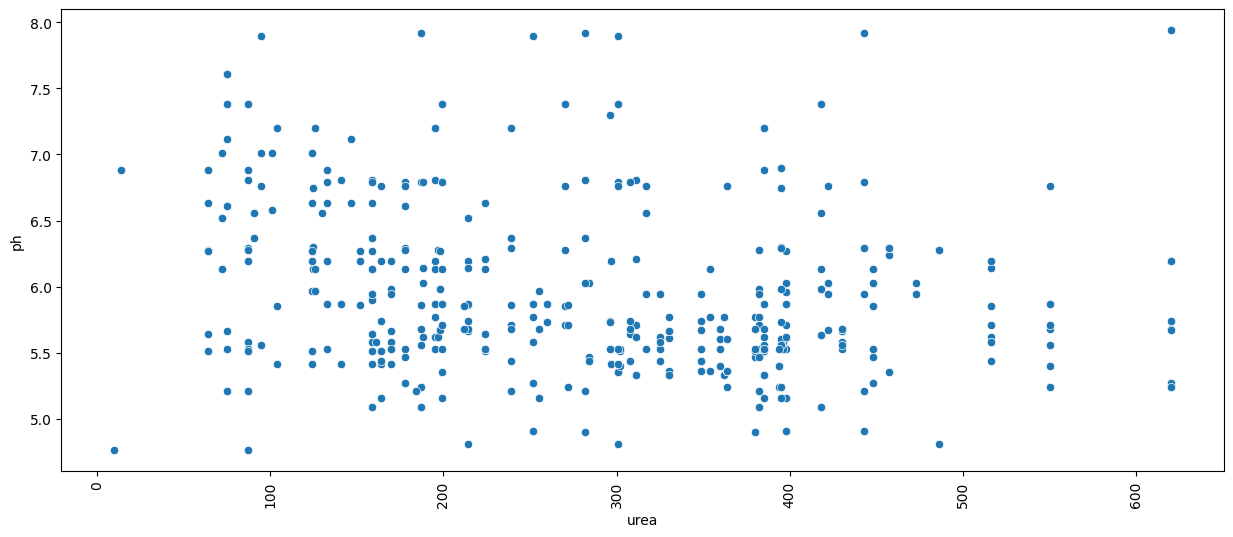

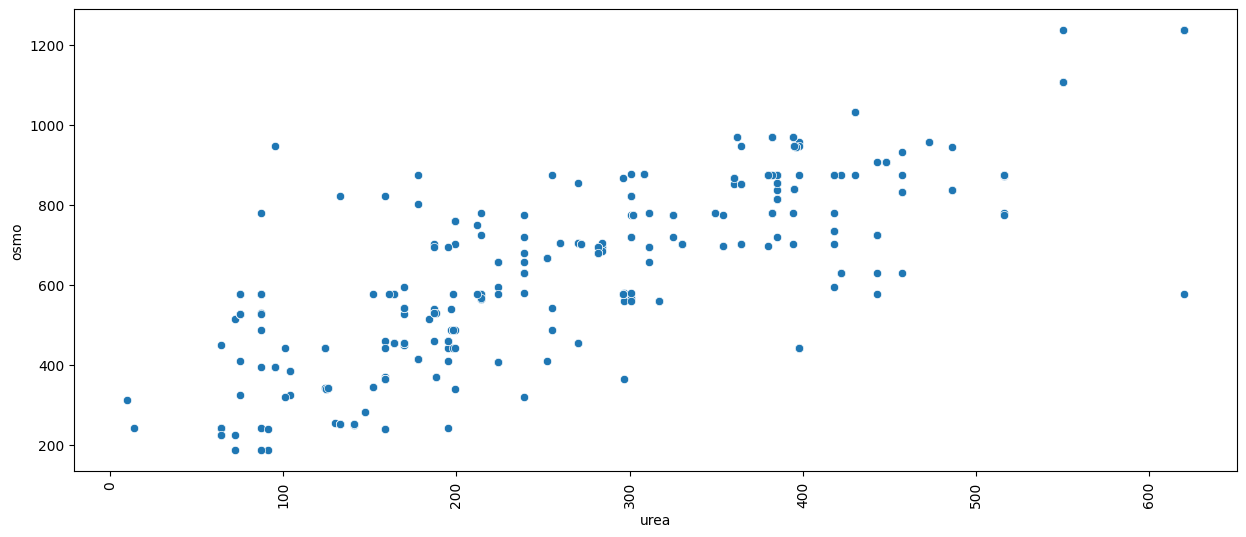

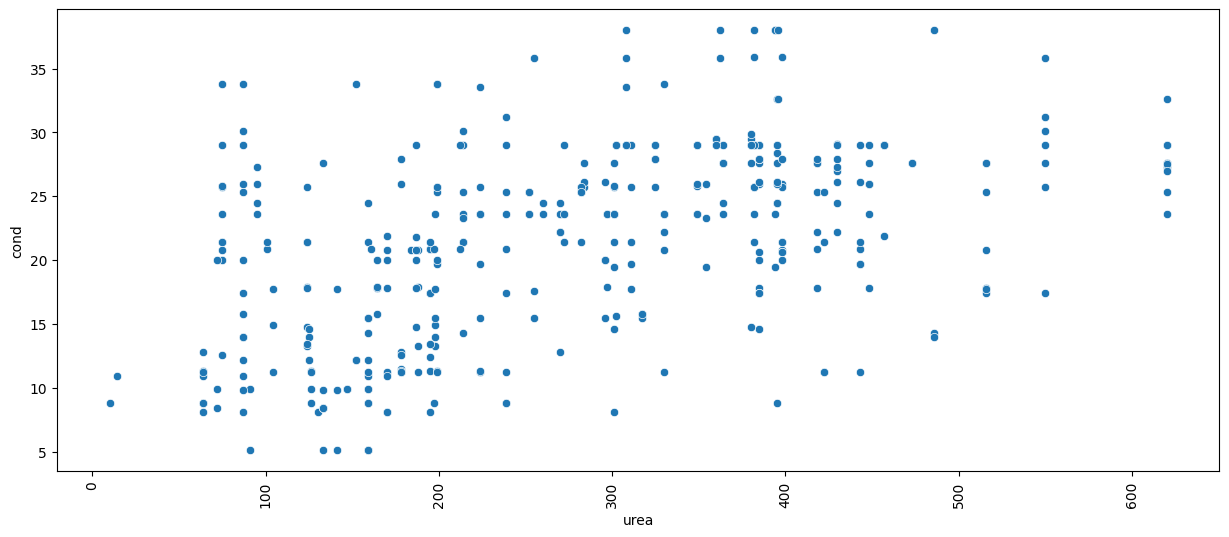

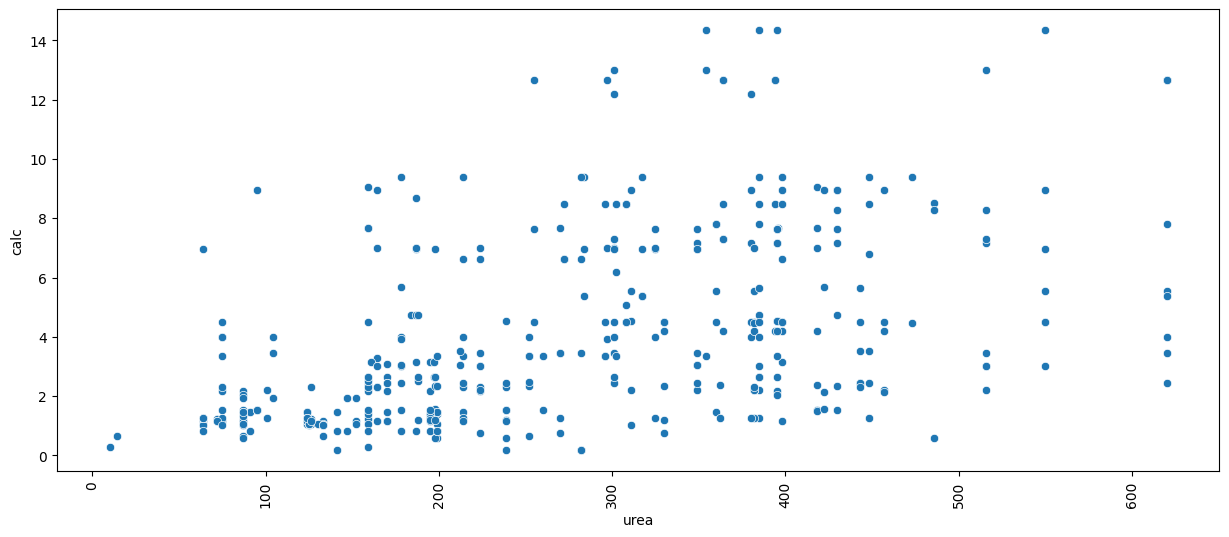

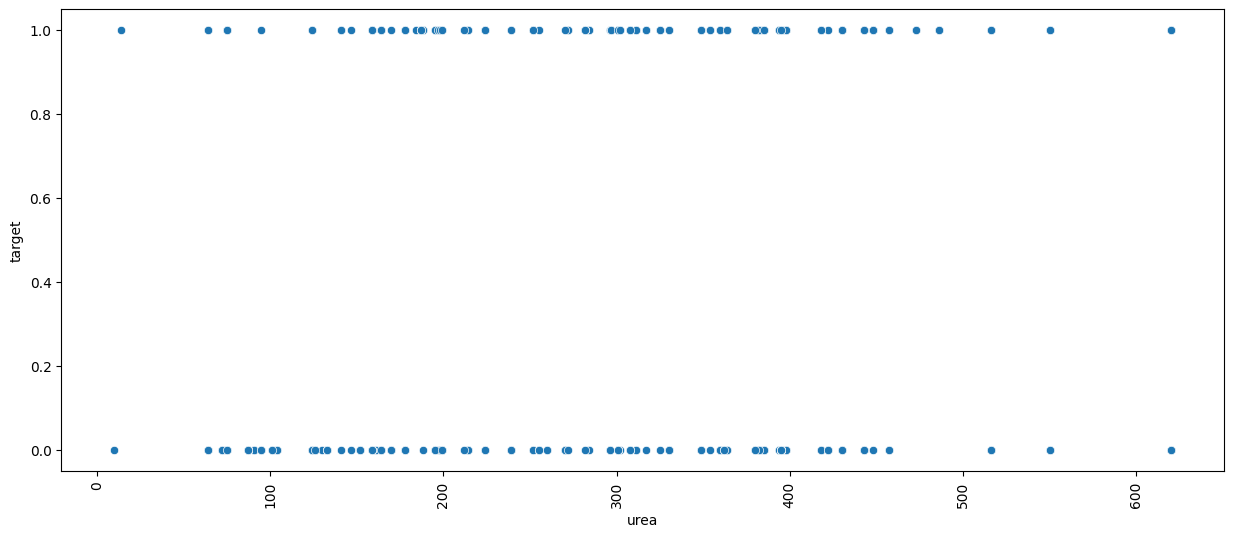

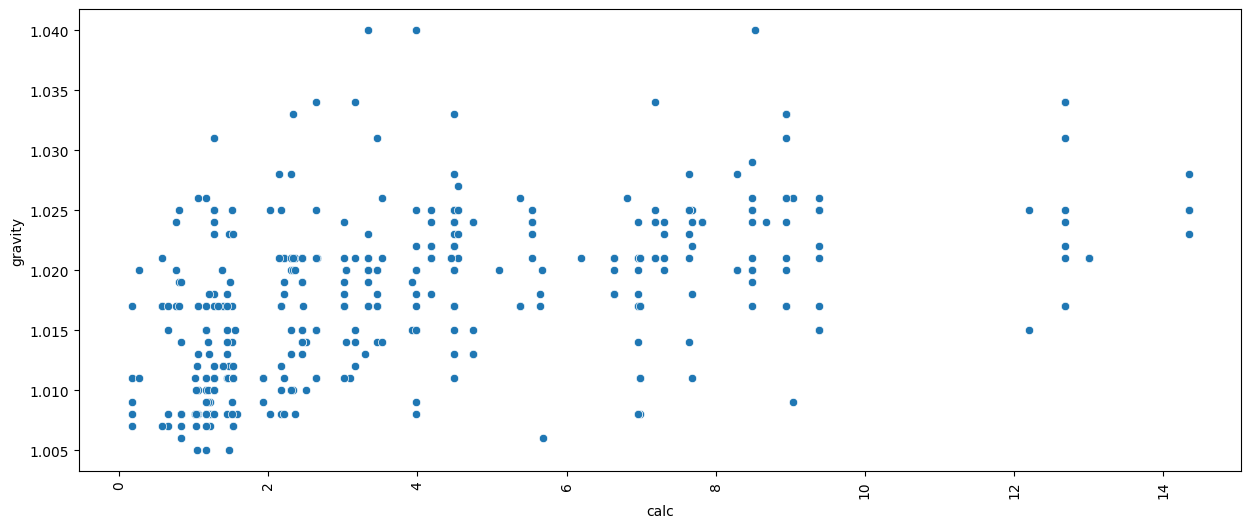

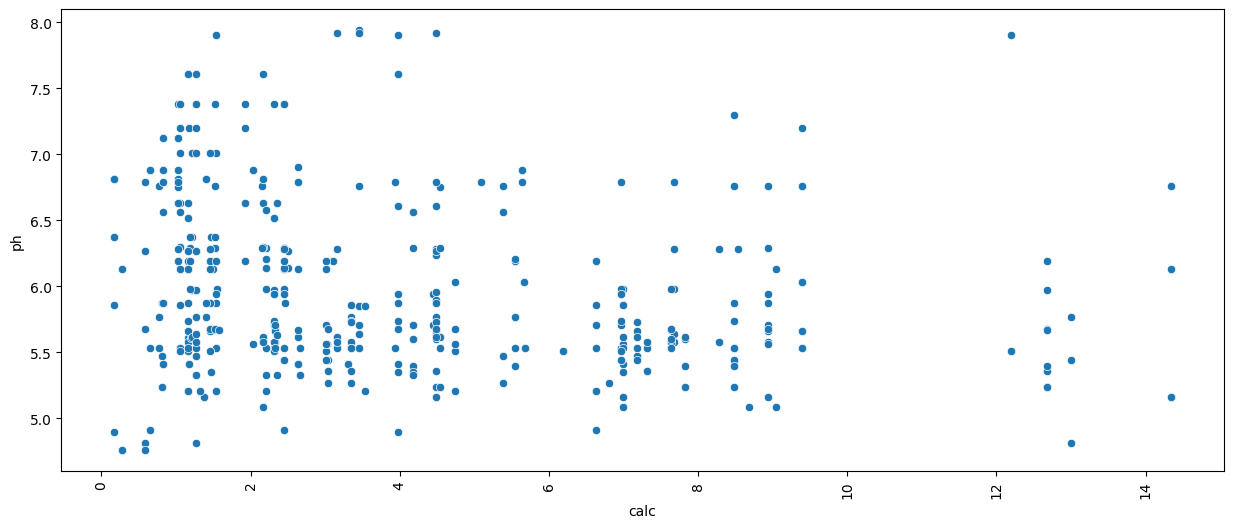

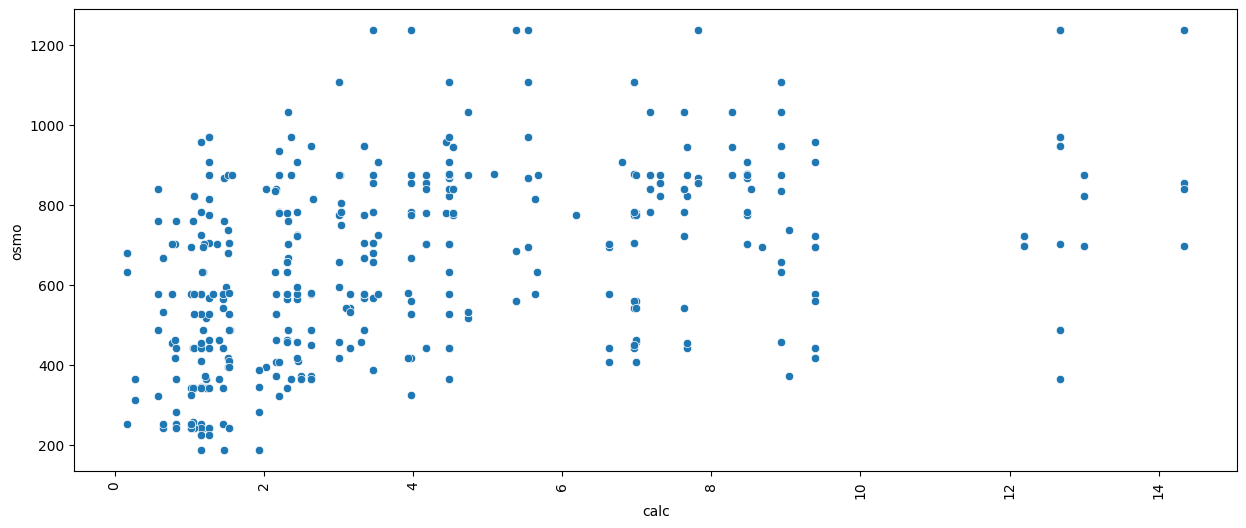

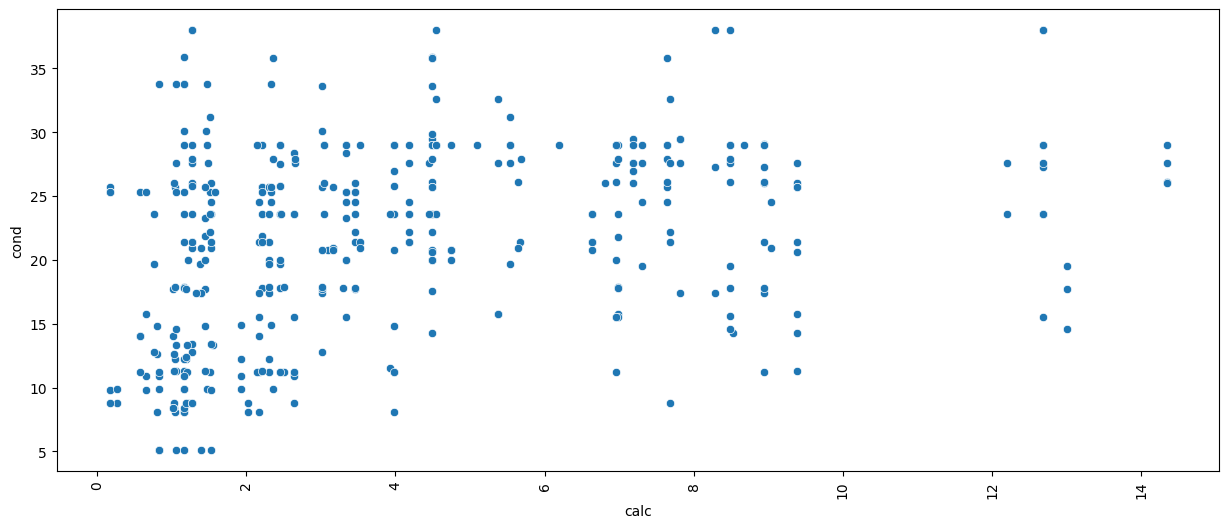

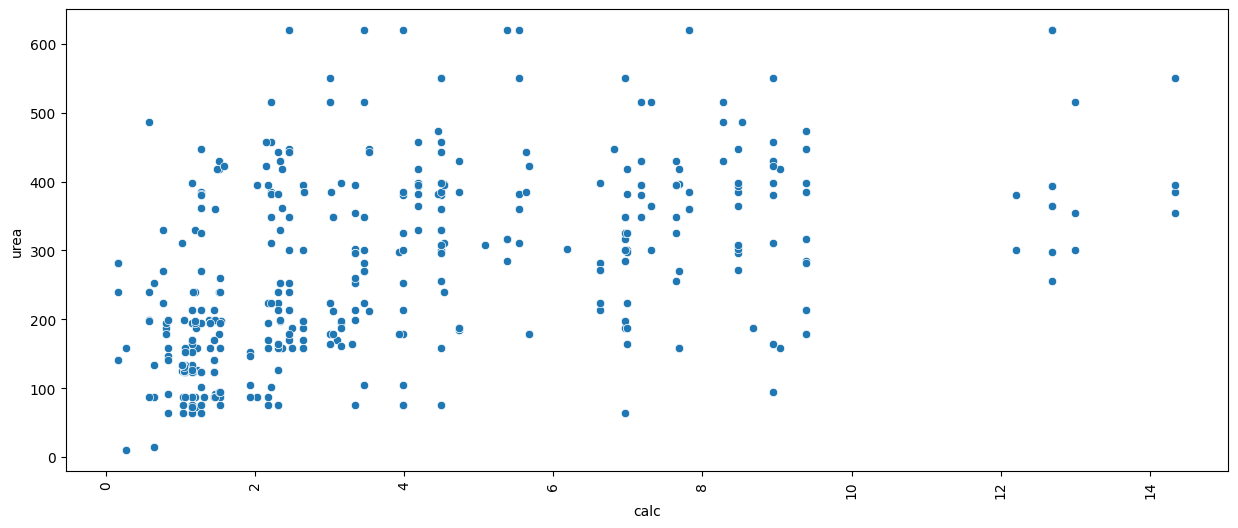

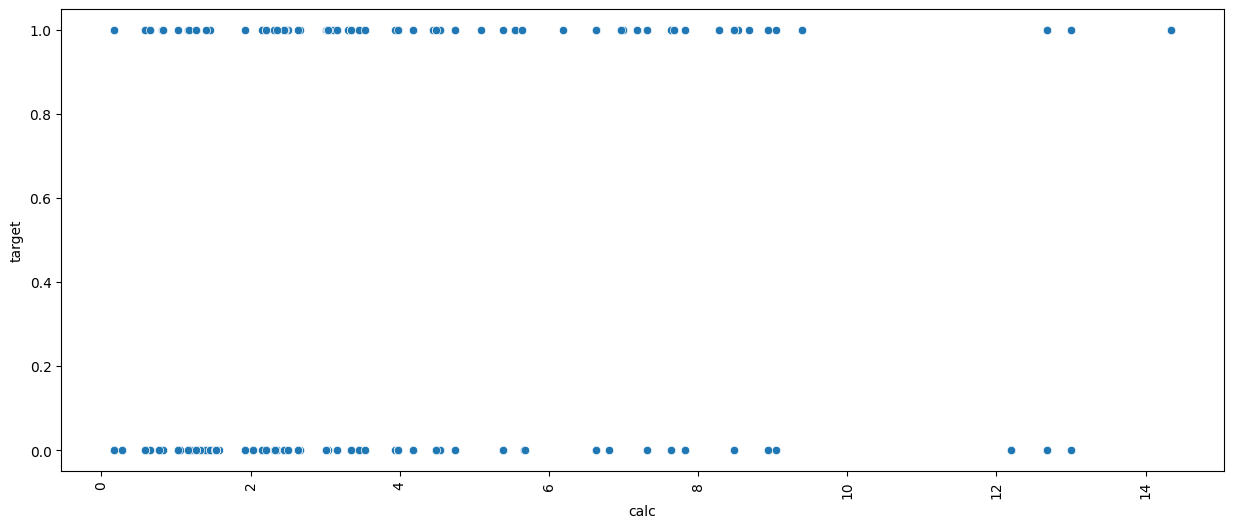

In [ ]:
for i in df.columns:
    for j in df.columns:
        if i != j:
            if i != 'target':
                plt.figure(figsize=(15,6))
                sns.scatterplot(x = df[i], y = df[j], data = df, palette = 'hls')
                plt.xticks(rotation = 90)
                plt.show()

In [ ]:
for i in df.columns:
    for j in df.columns:
        if i != j:
            if i != 'target':
                fig = px.line(df, x=i, y=j, color='target', template='plotly_dark')
                fig.update_layout(
                    title=f'{j} vs {i}',
                    xaxis_title=i,
                    yaxis_title=j
                )
                fig.show()

In [ ]:
for i in df.columns:
    for j in df.columns:
        if i != j:
            if i != 'target':
                fig = px.scatter(df, x=i, y=j, color='target', color_discrete_sequence=['#636EFA', '#EF553B'])
                fig.update_layout(title=f'Scatter Plot of {i} vs {j}', xaxis_title=i, yaxis_title=j)
                fig.show()

In [ ]:
import plotly.graph_objs as go

In [ ]:
fig= go.Figure(data=[go.Scatter3d(
    x=df['gravity'],
    y=df['ph'],
    z=df['osmo'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['target'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='3D ScatterPlot',
    scene=dict(xaxis_title='Gravity',
    yaxis_title='pH',
    zaxis_title='Osmo'
    )
)

fig.show()

<Figure size 1500x600 with 0 Axes>

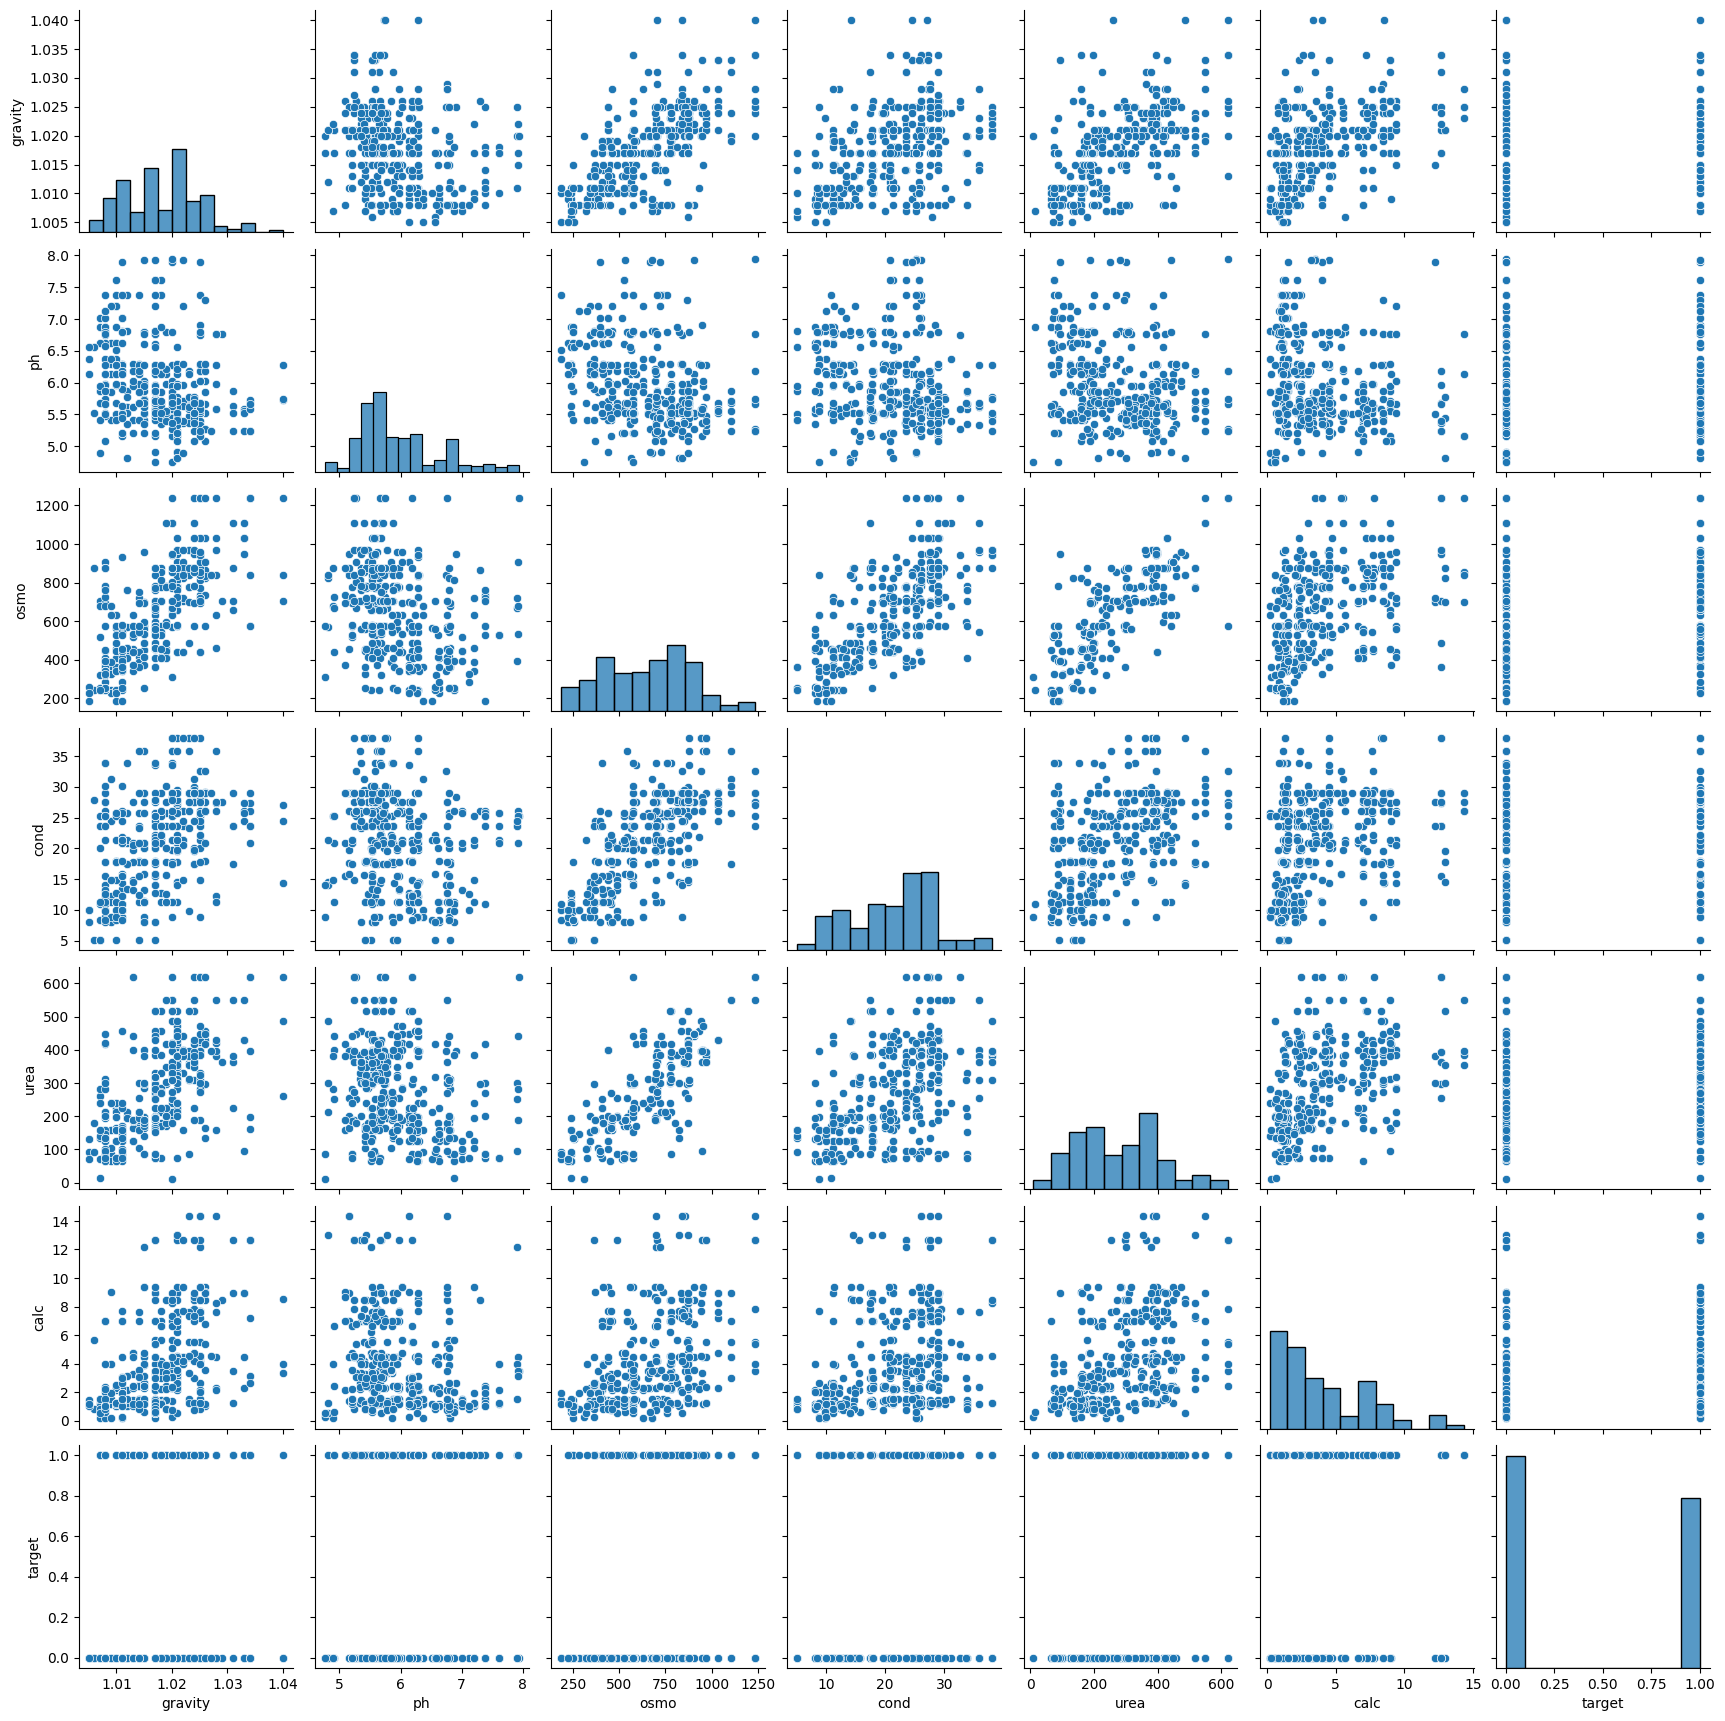

In [ ]:
plt.figure(figsize=(15,6))
sns.pairplot(data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

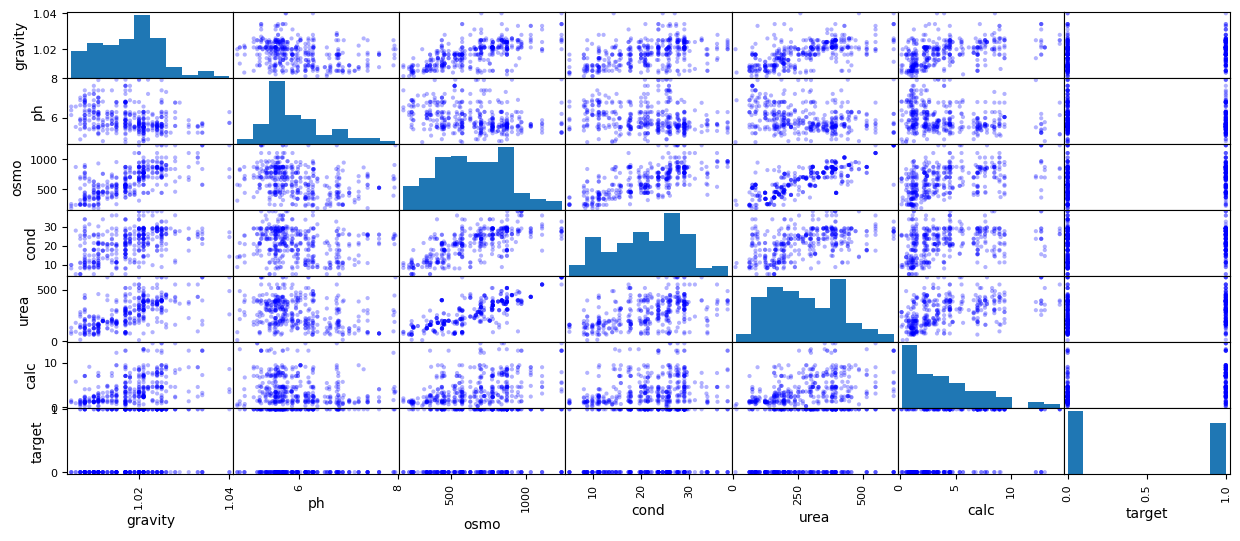

In [ ]:
scatter_matrix(df, diagonal='hist', color='b', alpha=0.3, figsize=(15,6))
fig= go.Figure(data=px.scatter_matrix(df, color='target',dimensions=['gravity','ph','osmo','cond','urea','calc']))
fig.update_layout(title='Pairplot of Features', width=800, height=800)
fig.show()

In [ ]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
print(IQR)

gravity      0.01
ph           0.75
osmo       384.75
cond        12.10
urea       215.00
calc         5.18
target       1.00
dtype: float64


In [ ]:
df_new= df[~((df < (Q1-1.5*IQR))| (df > (Q3+1.5*IQR))).any(axis=1)]

In [ ]:
df_new.shape

(399, 7)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
group1=df[df['target']==0]['urea']
group2=df[df['target']==1]['urea']


In [ ]:
mean1, std1= group1.mean(), group1.std()
mean2, std2= group2.mean(), group2.std()


In [ ]:
print('Group1:', mean1, std1 )
print('Group2:', mean2, std2 )

Group1: 246.3304347826087 137.92661308849506
Group2: 319.0652173913044 123.5048110253223


In [ ]:
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

In [ ]:
print('Group 1 mean: {:.2f}, std: {:.2f}'.format(mean1, std1))
print('Group 2 mean: {:.2f}, std: {:.2f}'.format(mean2, std2))
print('t-statistic: {:.2f}, p-value: {:.2f}'.format(t_stat, p_value))

Group 1 mean: 246.33, std: 137.93
Group 2 mean: 319.07, std: 123.50
t-statistic: -5.65, p-value: 0.00


In [ ]:
df_corr= df.corr()
df_corr

gravity        ph      osmo      cond      urea      calc    target
gravity  1.000000 -0.290349  0.692317  0.470433  0.631710  0.494304  0.282577
ph      -0.290349  1.000000 -0.309495 -0.190185 -0.279749 -0.214402 -0.094983
osmo     0.692317 -0.309495  1.000000  0.708480  0.809880  0.472114  0.244770
cond     0.470433 -0.190185  0.708480  1.000000  0.499109  0.330609  0.172224
urea     0.631710 -0.279749  0.809880  0.499109  1.000000  0.489879  0.265211
calc     0.494304 -0.214402  0.472114  0.330609  0.489879  1.000000  0.467439
target   0.282577 -0.094983  0.244770  0.172224  0.265211  0.467439  1.000000

**Correlation Heatmap Of Dataset**

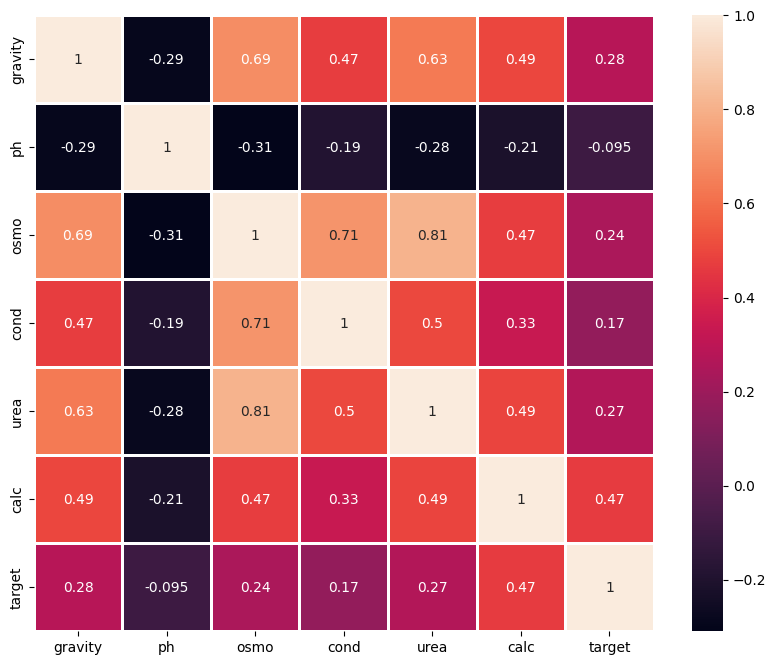

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, linewidth=.8, cmap="rocket");
plt.show()

In [ ]:
fig = px.imshow(df.corr(), color_continuous_scale='RdBu')

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
)

fig.show()

In [ ]:
df1= df.copy()

## **Feature Engineering**

In [ ]:
df1['osmo_cond_ratio'] = df['osmo'] / df['cond']

# Create a new feature by subtracting calc from urea
df1['urea_calc_diff'] = df['urea'] - df['calc']

# Standardize the values of gravity, ph, osmo, cond, urea, and calc
df1[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']] = (df1[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']] - df1[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']].mean()) / df1[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']].std()

# Create a new feature by multiplying osmo by urea
df1['osmo_urea_interaction'] = df['osmo'] * df['urea']

# Categorize the values of gravity, ph, osmo, cond, urea, and calc into 5 bins each
df1['gravity_bin'] = pd.qcut(df['gravity'], 5, labels=False)
df1['ph_bin'] = pd.qcut(df['ph'], 5, labels=False)
df1['osmo_bin'] = pd.qcut(df['osmo'], 5, labels=False)
df1['cond_bin'] = pd.qcut(df['cond'], 5, labels=False)
df1['urea_bin'] = pd.qcut(df['urea'], 5, labels=False)
df1['calc_bin'] = pd.qcut(df['calc'], 5, labels=False)



In [ ]:
df1.head(2)

gravity        ph      osmo      cond      urea      calc  target  \
0 -0.733145  0.365181 -0.888652 -0.883319 -1.133498 -0.828134       0   
1  1.064616 -0.864851  0.219255  0.287711  0.845361  0.020314       0   

   osmo_cond_ratio  urea_calc_diff  osmo_urea_interaction  gravity_bin  \
0        29.932432          122.55                  54932            1   
1        29.788136          389.82                 276982            4   

   ph_bin  osmo_bin  cond_bin  urea_bin  calc_bin  
0       3         1         1         0         1  
1       0         2         2         3         3

In [ ]:
X = df1[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'osmo_cond_ratio', 'urea_calc_diff', 'osmo_urea_interaction', 'gravity_bin', 'ph_bin', 'osmo_bin', 'cond_bin', 'urea_bin', 'calc_bin']]
y = df1['target']

**LogisticRegression, DecisionTree, RandomForest,SupportVectorClassifier, GradientBoostingClassifier**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Time to Evaluate the performance of the model.
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))


ValueError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

#perform grid search cross-validation to find the best hyperparameters

lr= LogisticRegression(random_state=42)
grid_search= GridSearchCV(lr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Mean Cross-Validation Score:', grid_search.best_score_)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Mean Cross-Validation Score: 0.7579828132066939


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred= dtc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Accuracy: 0.6867469879518072
Precision: 0.7
Recall: 0.5526315789473685
F1 Score: 0.6176470588235295
Confusion matrix: [[36  9]
 [17 21]]
Classification report:               precision    recall  f1-score   support

           0       0.68      0.80      0.73        45
           1       0.70      0.55      0.62        38

    accuracy                           0.69        83
   macro avg       0.69      0.68      0.68        83
weighted avg       0.69      0.69      0.68        83



In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [6, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Hyperparameters:', grid_search.best_params_)
print('Best Mean Cross-Validation Score:', grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best Mean Cross-Validation Score: 0.7007236544549977


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

y_pred= rfc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Accuracy: 0.6987951807228916
Precision: 0.7096774193548387
Recall: 0.5789473684210527
F1 Score: 0.6376811594202899
Confusion matrix: [[36  9]
 [16 22]]
Classification report:               precision    recall  f1-score   support

           0       0.69      0.80      0.74        45
           1       0.71      0.58      0.64        38

    accuracy                           0.70        83
   macro avg       0.70      0.69      0.69        83
weighted avg       0.70      0.70      0.69        83



In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7398914518317504
Accuracy: 0.6987951807228916
Precision: 0.696969696969697
Recall: 0.6052631578947368
F1 Score: 0.6478873239436619
Confusion matrix: [[35 10]
 [15 23]]
Classification report:               precision    recall  f1-score   support

           0       0.70      0.78      0.74        45
           1       0.70      0.61      0.65        38

    accuracy                           0.70        83
   macro avg       0.70      0.69      0.69        83
weighted avg       0.70      0.70      0.70        83



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Accuracy: 0.7108433734939759
Precision: 0.71875
Recall: 0.6052631578947368
F1 Score: 0.6571428571428571
Confusion matrix: [[36  9]
 [15 23]]
Classification report:               precision    recall  f1-score   support

           0       0.71      0.80      0.75        45
           1       0.72      0.61      0.66        38

    accuracy                           0.71        83
   macro avg       0.71      0.70      0.70        83
weighted avg       0.71      0.71      0.71        83



In [ ]:
params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

xgb = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print('Best Hyperparameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy: 0.7159203980099502
Accuracy: 0.7349397590361446
Precision: 0.7105263157894737
Recall: 0.7105263157894737
F1 Score: 0.7105263157894737
Confusion matrix: [[34 11]
 [11 27]]
Classification report:               precision    recall  f1-score   support

           0       0.76      0.76      0.76        45
           1       0.71      0.71      0.71        38

    accuracy                           0.73        83
   macro avg       0.73      0.73      0.73        83
weighted avg       0.73      0.73      0.73        83



In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=42)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Accuracy: 0.6746987951807228
Precision: 0.6170212765957447
Recall: 0.7631578947368421
F1 Score: 0.6823529411764706
Confusion matrix: [[27 18]
 [ 9 29]]
Classification report:               precision    recall  f1-score   support

           0       0.75      0.60      0.67        45
           1       0.62      0.76      0.68        38

    accuracy                           0.67        83
   macro avg       0.68      0.68      0.67        83
weighted avg       0.69      0.67      0.67        83



In [ ]:
X_train.shape

(331, 15)

In [ ]:
df1.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target',
       'osmo_cond_ratio', 'urea_calc_diff', 'osmo_urea_interaction',
       'gravity_bin', 'ph_bin', 'osmo_bin', 'cond_bin', 'urea_bin',
       'calc_bin'],
      dtype='object')



* **Convolution Neural Network (CNN)**
* **Bi-Long Short Time Memory (Bi-LSTM)**
* **Evaluation Of Models**
* **Saving Model**







In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, Bidirectional, LSTM
from keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Bidirectional, LSTM

In [ ]:
# Define X and y
X = df1[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'osmo_cond_ratio', 'urea_calc_diff', 'osmo_urea_interaction', 'gravity_bin', 'ph_bin', 'osmo_bin', 'cond_bin', 'urea_bin', 'calc_bin']]
y = df1['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to be 3D arrays
X_train = np.reshape(X_train.to_numpy(), (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.to_numpy(), (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# BiLSTM layers
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=75, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/75
5/5 [==============================] - 11s 370ms/step - loss: 0.6882 - accuracy: 0.5568 - val_loss: 0.7007 - val_accuracy: 0.5522
Epoch 2/75
5/5 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.5417 - val_loss: 0.6876 - val_accuracy: 0.5522
Epoch 3/75
5/5 [==============================] - 0s 18ms/step - loss: 0.6878 - accuracy: 0.5568 - val_loss: 0.6941 - val_accuracy: 0.5522
Epoch 4/75
5/5 [==============================] - 0s 20ms/step - loss: 0.6909 - accuracy: 0.5644 - val_loss: 0.6861 - val_accuracy: 0.5522
Epoch 5/75
5/5 [==============================] - 0s 18ms/step - loss: 0.6863 - accuracy: 0.5644 - val_loss: 0.6940 - val_accuracy: 0.5522
Epoch 6/75
5/5 [==============================] - 0s 18ms/step - loss: 0.6957 - accuracy: 0.5606 - val_loss: 0.6987 - val_accuracy: 0.5522
Epoch 7/75
5/5 [==============================] - 0s 31ms/step - loss: 0.6855 - accuracy: 0.5644 - val_loss: 0.6832 - val_accuracy: 0.5522
Epoch 8/75
5/5 [=========

In [ ]:
#model.save('ksp_model.h5')